# Intalling the libraries

In [9]:
%pip install -U unstructured unstructured-inference onnx pytesseract python-poppler chromadb

  Obtaining dependency information for unstructured from https://files.pythonhosted.org/packages/5d/10/f36ec76d07acee92ea7432c00e41d15ebf47df1db994778a1710da77e4a2/unstructured-0.10.24-py3-none-any.whl.metadata
  Obtaining dependency information for unstructured-inference from https://files.pythonhosted.org/packages/75/3e/a9e5e39a7a80d18baad20699dcd871d43861821cf421600b46e82b05fbdb/unstructured_inference-0.7.7-py3-none-any.whl.metadata


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: unstructured
    Found existing installation: unstructured 0.10.23
    Uninstalling unstructured-0.10.23:
      Successfully uninstalled unstructured-0.10.23
  Attempting uninstall: unstructured-inference
    Found existing installation: unstructured-inference 0.7.5
    Uninstalling unstructured-inference-0.7.5:
      Successfully uninstalled unstructured-inference-0.7.5
Note: you may need to restart the kernel to use updated packages.


# Multi-vector Retriever

In [10]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

file_path = '~/Projects/Teaching/Introduction_Langchain/data/mixed_data/element_of_SL.pdf'

loader = PyPDFLoader(file_path=file_path)

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=10000,
    chunk_overlap=0
)

sl_data = loader.load_and_split(text_splitter=text_splitter)
sl_data

[Document(page_content='Springer Series in Statistics\nTrevor Hastie\nRobert TibshiraniJerome FriedmanSpringer Series in Statistics\nThe Elements of\nStatistical Learning\nData Mining, Inference, and Prediction\nThe Elements of Statistical LearningDuring the past decade there has been an explosion in computation and information tech-\nnology. With it have come vast amounts of data in a variety of fields such as medicine, biolo-gy, finance, and marketing. The challenge of understanding these data has led to the devel-opment of new tools in the field of statistics, and spawned new areas such as data mining,machine learning, and bioinformatics. Many of these tools have common underpinnings butare often expressed with different terminology. This book describes the important ideas inthese areas in a common conceptual framework. While the approach is statistical, theemphasis is on concepts rather than mathematics. Many examples are given, with a liberaluse of color graphics. It should be a v

In [13]:
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

vectorstore = Chroma(
    collection_name="statistical_learning",
    embedding_function=OpenAIEmbeddings()
)

store = InMemoryStore()
id_key = "doc_id"

retriever = MultiVectorRetriever(
    vectorstore=vectorstore, 
    docstore=store, 
    id_key=id_key,
)

retriever

MultiVectorRetriever(vectorstore=<langchain.vectorstores.chroma.Chroma object at 0x11ffff290>, docstore=<langchain.storage.in_memory.InMemoryStore object at 0x120db4210>)

In [14]:
import uuid

doc_ids = [str(uuid.uuid4()) for _ in sl_data]
doc_ids

['c42a0079-c02e-4da7-b539-51a6b92f1ed2',
 '57d38ee2-c5f3-4238-afda-339d868e8069',
 '1d595d84-0542-47a7-bb03-48fb4fd97192',
 '8ea2194a-6d91-4eb0-8601-80b86b4fd6eb',
 'f17fbc44-ebcb-4b1f-801c-ce3c4d36cd12',
 'db026373-6c19-4acf-b854-fba4f4de735c',
 '30cfbe9a-b838-4b39-beb9-c9400ac7f62b',
 'a69a3386-d89f-4ae9-9889-43186306d70a',
 '255732fe-9179-4730-b04e-5c1e7da7f5ae',
 'fe5813f5-67c8-4717-8513-cb1325317f67',
 'c8e92bf2-136c-4483-a95d-b27623673587',
 '6583e0ea-ee72-4b3f-a3c2-0c013336d6ae',
 '1b5a08b3-afc2-4696-869d-fa195a869d01',
 '96f9f37f-2c33-480d-b558-5878aad1d269',
 'a8d9cde4-c6aa-4ff1-a0d3-95a912e44cd3',
 '9d5340a3-52ef-4e42-8823-4c021ea9a7a8',
 '7cb4daed-efdc-454e-9925-fbc210bb404a',
 'b315ccaf-b263-49b2-9392-e6a6d372993b',
 'c4bc56d0-db45-4853-a4fc-b40270e4dda7',
 '46ea18a8-6dfa-4872-9d9c-607eeb5a1ad3',
 'ed8df227-b353-4c8d-a759-613a52ffb1e2',
 '7bd30e74-2a39-4255-966b-ea4bc070425b',
 '7be7f3d3-9806-4aff-817a-d7b291c12694',
 '6a0e37ef-af68-4dbd-a142-195ac235f4bb',
 '59c48b02-c19c-

In [15]:
child_text_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

all_sub_docs = []
for i, doc in enumerate(sl_data):
    doc_id = doc_ids[i]
    sub_docs = child_text_splitter.split_documents([doc])
    for sub_doc in sub_docs:
        sub_doc.metadata[id_key] = doc_id
    all_sub_docs.extend(sub_docs)
    
all_sub_docs

[Document(page_content='Springer Series in Statistics\nTrevor Hastie\nRobert TibshiraniJerome FriedmanSpringer Series in Statistics\nThe Elements of\nStatistical Learning\nData Mining, Inference, and Prediction\nThe Elements of Statistical LearningDuring the past decade there has been an explosion in computation and information tech-', metadata={'source': '/Users/damienbenveniste/Projects/Teaching/Introduction_Langchain/data/mixed_data/element_of_SL.pdf', 'page': 0, 'doc_id': 'c42a0079-c02e-4da7-b539-51a6b92f1ed2'}),
 Document(page_content='nology. With it have come vast amounts of data in a variety of fields such as medicine, biolo-gy, finance, and marketing. The challenge of understanding these data has led to the devel-opment of new tools in the field of statistics, and spawned new areas such as data mining,machine learning, and bioinformatics. Many of these tools have common underpinnings butare often expressed with different', metadata={'source': '/Users/damienbenveniste/Projects/

In [16]:
retriever.vectorstore.add_documents(all_sub_docs)
retriever.docstore.mset(list(zip(doc_ids, sl_data)))

In [17]:
retriever.vectorstore.similarity_search("Linear regression")

[Document(page_content='100 3. Linear Methods for Regression', metadata={'doc_id': 'b57909ed-e5ba-4900-9759-5ea79fe1a683', 'page': 118, 'source': '/Users/damienbenveniste/Projects/Teaching/Introduction_Langchain/data/mixed_data/element_of_SL.pdf'}),
 Document(page_content='2.3 Least Squares and Nearest Neighbors 13\nLinear Regression of 0/1 Response', metadata={'doc_id': '587de9c4-2963-4133-951a-673539a8eed4', 'page': 31, 'source': '/Users/damienbenveniste/Projects/Teaching/Introduction_Langchain/data/mixed_data/element_of_SL.pdf'}),
 Document(page_content='54 3. Linear Methods for Regression\nx1x2y\nˆ yz z z z z\nFIGURE 3.4. Least squares regression by orthogonalization of the inputs . The\nvectorx2is regressed on the vector x1, leaving the residual vector z. The regres-\nsion ofyonzgives the multiple regression coeﬃcient of x2. Adding together the\nprojections of yon each of x1andzgives the least squares ﬁt ˆy.', metadata={'doc_id': 'a2754cc0-5886-4839-b7ff-64a398b5630a', 'page': 72,

In [18]:
retriever.get_relevant_documents("Linear regression")

[Document(page_content='100 3. Linear Methods for Regression', metadata={'source': '/Users/damienbenveniste/Projects/Teaching/Introduction_Langchain/data/mixed_data/element_of_SL.pdf', 'page': 118}),
 Document(page_content='2.3 Least Squares and Nearest Neighbors 13\nLinear Regression of 0/1 Response\n.. . . . . .. . . . . . . . . . . .. . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [19]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(temperature=0)

chain = RetrievalQA.from_chain_type(
    llm=llm, 
    retriever=retriever,
    verbose=True
)

chain.run("What is linear regression?")



> Entering new RetrievalQA chain...

> Finished chain.


'Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes that the relationship between the variables can be approximated by a linear equation. The goal of linear regression is to find the best-fitting line that minimizes the difference between the predicted values and the actual values of the dependent variable. This line can then be used to make predictions or understand the relationship between the variables.'

# Hypothetical questions for RAG

In [20]:
from langchain.chains import LLMChain
from langchain.output_parsers import NumberedListOutputParser

prompt = """
Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

{doc}
"""

llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo-16k')

chain = LLMChain.from_string(
    llm=llm,
    template=prompt,
)

chain.verbose = True
chain.output_parser = NumberedListOutputParser()

chain.run(sl_data[20].page_content)



> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

2 1. Introduction
TABLE 1.1. Average percentage of words or characters in an email messag e
equal to the indicated word or character. We have chosen the w ords and characters
showing the largest diﬀerence between spamandemail.
george you your hp free hpl ! our re edu remove
spam 0.00 2.26 1.38 0.02 0.52 0.01 0.51 0.51 0.13 0.01 0.28
email 1.27 1.27 0.44 0.90 0.07 0.43 0.11 0.18 0.42 0.29 0.01
measurements for a set of objects (such as people). Using thi s data we build
a prediction model, or learner, which will enable us to predict the outcome
for new unseen objects. A good learner is one that accurately predicts such
an outcome.
The examples above describe what is called the supervised learning prob-
lem. It is called “supervised” because of the presence of the outcome vari-
able to guide the learning process. In the unsupe

['What are the average percentages of words or characters in an email message that are equal to specific words or characters?',
 'How can we use the data in Table 1.1 to build a prediction model for classifying emails as spam or not spam?',
 'What are some examples of real learning problems discussed in the book, and how do they relate to supervised and unsupervised learning?']

In [21]:
vectorstore = Chroma(
    collection_name="hypo-questions",
    embedding_function=OpenAIEmbeddings()
)

store = InMemoryStore()
id_key = "doc_id"

retriever = MultiVectorRetriever(
    vectorstore=vectorstore, 
    docstore=store, 
    id_key=id_key,
)
doc_ids = [str(uuid.uuid4()) for _ in sl_data]

In [23]:
from langchain.schema.document import Document

question_docs = []
for i, doc in enumerate(sl_data):
    result = chain.run(doc.page_content)
    question_docs.extend([
        Document(
            page_content=s,
            metadata={id_key: doc_ids[i]}
        ) for s in result
    ])



> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Springer Series in Statistics
Trevor Hastie
Robert TibshiraniJerome FriedmanSpringer Series in Statistics
The Elements of
Statistical Learning
Data Mining, Inference, and Prediction
The Elements of Statistical LearningDuring the past decade there has been an explosion in computation and information tech-
nology. With it have come vast amounts of data in a variety of fields such as medicine, biolo-gy, finance, and marketing. The challenge of understanding these data has led to the devel-opment of new tools in the field of statistics, and spawned new areas such as data mining,machine learning, and bioinformatics. Many of these tools have common underpinnings butare often expressed with different terminology. This book describes the important ideas inthese areas in a common conceptual framework. While the approach is statistica


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

This is page xi
Printer: Opaque this
Preface to the First Edition
We are drowning in information and starving for knowledge.
–Rutherford D. Roger
The ﬁeld of Statistics is constantly challenged by the probl ems that science
andindustrybringstoitsdoor.Intheearlydays,theseprob lemsoftencame
from agricultural and industrial experiments and were rela tively small in
scope. With the advent of computers and the information age, statistical
problems have exploded both in size and complexity. Challen ges in the
areas of data storage, organization and searching have led t o the new ﬁeld
of “data mining”; statistical and computational problems i n biology and
medicine have created “bioinformatics.” Vast amounts of da ta are being
generated in many ﬁelds, and the statistician’s job is to mak e sense of it
all: to ext


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Contents xv
4 Linear Methods for Classiﬁcation 101
4.1 Introduction . . . . . . . . . . . . . . . . . . . . . . . . . 101
4.2 Linear Regression of an Indicator Matrix . . . . . . . . . 103
4.3 Linear Discriminant Analysis . . . . . . . . . . . . . . . . 106
4.3.1 Regularized Discriminant Analysis . . . . . . . . 112
4.3.2 Computations for LDA . . . . . . . . . . . . . . 113
4.3.3 Reduced-Rank Linear Discriminant Analysis . . 113
4.4 Logistic Regression . . . . . . . . . . . . . . . . . . . . . . 119
4.4.1 Fitting Logistic Regression Models . . . . . . . . 120
4.4.2 Example: South African Heart Disease . . . . . 122
4.4.3 Quadratic Approximations and Inference . . . . 124
4.4.4L1Regularized Logistic Regression . . . . . . . . 125
4.4.5 Logistic Regression or LDA? . . . . . . . . . . . 127
4.5 Separating Hyp


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

xviii Contents
10.2 Boosting Fits an Additive Model . . . . . . . . . . . . . . 341
10.3 Forward Stagewise Additive Modeling . . . . . . . . . . . 342
10.4 Exponential Loss and AdaBoost . . . . . . . . . . . . . . 343
10.5 Why Exponential Loss? . . . . . . . . . . . . . . . . . . . 345
10.6 Loss Functions and Robustness . . . . . . . . . . . . . . . 346
10.7 “Oﬀ-the-Shelf” Procedures for Data Mining . . . . . . . . 35 0
10.8 Example: Spam Data . . . . . . . . . . . . . . . . . . . . 352
10.9 Boosting Trees . . . . . . . . . . . . . . . . . . . . . . . . 353
10.10 Numerical Optimization via Gradient Boosting . . . . . . 358
10.10.1 Steepest Descent . . . . . . . . . . . . . . . . . . 358
10.10.2 Gradient Boosting . . . . . . . . . . . . . . . . . 359
10.10.3 Implementations of Gradient Boosting . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Contents xxi
15 Random Forests 587
15.1 Introduction . . . . . . . . . . . . . . . . . . . . . . . . . 587
15.2 Deﬁnition of Random Forests . . . . . . . . . . . . . . . . 587
15.3 Details of Random Forests . . . . . . . . . . . . . . . . . 592
15.3.1 Out of Bag Samples . . . . . . . . . . . . . . . . 592
15.3.2 Variable Importance . . . . . . . . . . . . . . . . 593
15.3.3 Proximity Plots . . . . . . . . . . . . . . . . . . 595
15.3.4 Random Forests and Overﬁtting . . . . . . . . . 596
15.4 Analysis of Random Forests . . . . . . . . . . . . . . . . . 597
15.4.1 Variance and the De-Correlation Eﬀect . . . . . 597
15.4.2 Bias . . . . . . . . . . . . . . . . . . . . . . . . . 600
15.4.3 Adaptive Nearest Neighbors . . . . . . . . . . . 601
Bibliographic Notes . . . . . . . . . . . . . . . . . . . . . . . . . 

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600).



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

2 1. Introduction
TABLE 1.1. Average percentage of words or characters in an email messag e
equal to the indicated word or character. We have chosen the w ords and characters
showing the largest diﬀerence between spamandemail.
george you your hp free hpl ! our re edu remove
spam 0.00 2.26 1.38 0.02 0.52 0.01 0.51 0.51 0.13 0.01 0.28
email 1.27 1.27 0.44 0.90 0.07 0.43 0.11 0.18 0.42 0.29 0.01
measurements for a set of objects (such as people). Using thi s data we build
a prediction model, or learner, which will enable us to predict the outcome
for new unseen objects. A good learner is one that accurately predicts such
an outcome.
The examples above describe what is called the supervised learning prob-
lem. It is called “supervised” because of the presence of the outcome vari-
able to guide the learning pro


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

ooo
ooo
oo
o
oo
oo
oo
oooo
ooo
o
oo
o
o oo
o o o o o o oo oo
o ooo
o o o oo
oo
o oo
oo
o o o o o ooo oo
oo
o
ooooo
o
o oo
oo
o
oo
oooo
ooo
o
ooo
o
ooo
ooo
ooo
oo
o
oo
oo
oo
oooo
ooo
o
oo
o
−1 0 1 2o oo
o o o o oo o o oo
o ooo
o o ooo
oo
o oo
oo
o o o oo ooo oo
oo
o
ooooo
o
o oo
oo
o
oo
oooo
ooo
o
ooo
o
ooo
ooo
ooo
oo
o
oo
oo
oo
oooo
ooo
o
oo
o
o oo
o o o o o o o o oo
o ooo
o o o oo
oo
o oo
oo
o o o o o ooo oo
oo
o
ooooo
o
o oo
oo
o
oo
oooo
ooo
o
ooo
o
ooo
ooo
ooo
oo
o
oo
oo
oo
oooo
ooo
o
oo
o
−1 0 1 2 3o oo
o o o o o o o o oo
o ooo
o o o oo
oo
o oo
oo
o o o o o ooo oo
oo
o
ooooo
o
o oo
oo
o
oo
oooo
ooo
o
ooo
o
ooo
ooo
ooo
oo
o
oo
oo
oo
oooo
ooo
o
oo
o
o oo
o o o o o o o o oo
o ooo
o o o oo
oo
o oo
oo
o o o o o ooo oo
oo
o
ooooo
o
o oo
oo
o
oo
oooo
ooo
o
ooo
o
ooo
ooo
ooo
oo
o
oo
oo
oo
oooo
ooo
o
oo
o
0 20 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

1. Introduction 7
Who Should Read this Book
This book is designed for researchers and students in a broad variety of
ﬁelds: statistics, artiﬁcial intelligence, engineering, ﬁnance and others. We
expect that the reader will have had at least one elementary c ourse in
statistics, covering basic topics including linear regres sion.
We have not attempted to write a comprehensive catalog of lea rning
methods, but rather to describe some of the most important te chniques.
Equally notable, we describe the underlying concepts and co nsiderations
by which a researcher can judge a learning method. We have tri ed to write
this book in an intuitive fashion, emphasizing concepts rat her than math-
ematical details.
Asstatisticians,ourexpositionwillnaturallyreﬂectour backgroundsand
areas of expertise. However in the pas


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

2.3 Least Squares and Nearest Neighbors 11
ith observation from the N-vectorxjconsisting of all the observations on
variableXj. Since all vectors are assumed to be column vectors, the ith
row ofXisxT
i, the vector transpose of xi.
For the moment we can loosely state the learning task as follo ws: given
the value of an input vector X, make a good prediction of the output Y,
denoted by ˆY(pronounced “y-hat”). If Ytakes values in IR then so should
ˆY; likewise for categorical outputs, ˆGshould take values in the same set G
associated with G.
For a two-class G, one approach is to denote the binary coded target
asY, and then treat it as a quantitative output. The predictions ˆYwill
typically lie in [0 ,1], and we can assign to ˆGthe class label according to
whether ˆy >0.5. This approach generalizes to K-level 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14 2. Overview of Supervised Learning
the component Gaussians to use, and then generates an observ ation from
the chosen density. In the case of one Gaussian per class, we w ill see in
Chapter 4 that a linear decision boundary is the best one can d o, and that
our estimate is almost optimal. The region of overlap is inev itable, and
future data to be predicted will be plagued by this overlap as well.
In the case of mixtures of tightly clustered Gaussians the st ory is dif-
ferent. A linear decision boundary is unlikely to be optimal , and in fact is
not. The optimal decision boundary is nonlinear and disjoin t, and as such
will be much more diﬃcult to obtain.
We now look at another classiﬁcation and regression procedu re that is
in some sense at the opposite end of the spectrum to the linear model, and
far


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

... .. .. .. .. . .. . .. . .. . . . .. . . . . .. . . . . . .. . . . . . . .. . . . . . . . .. . . . . . . . .. . . . . . . . .. . . . . . . . . .. . . . . . . . . . . .. . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

2.3 Least Squares and Nearest Neighbors 17
Degrees of Freedom − N/kTest Error
0.10 0.15 0.20 0.25 0.30
  2   3   5   8  12  18  29  67 200151 101  69  45  31  21  11   7   5   3   1
Train
Test
Bayesk −  Number of Nearest Neighbors
Linear
FIGURE 2.4. Misclassiﬁcation curves for the simulation example used in Fig -
ures 2.1, 2.2 and 2.3. A single training sample of size 200was used, and a test
sample of size 10,000. The orange curves are test and the blue are training er-
ror fork-nearest-neighbor classiﬁcation. The results for linear regr ession are the
bigger orange and blue squares at three degrees of freedom. Th e purple line is the
optimal Bayes error rate.
then generated a N(mk,I/5), thus leading to a mixture of Gaussian clus-
ters for each class. Figure 2.4 shows the results of classify ing 10,000 new


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

2.4 Statistical Decision Theory 21
Bayes Optimal Classifier
... .. . . .. . . . .. . . . . .. . . . . . .. . . . . . . . .. . . . . . . . . .. . . . . . . . . . .. . . . . . . . . . . . . .. . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

22 2. Overview of Supervised Learning
Again we see that the k-nearest neighbor classiﬁer directly approximates
this solution—a majority vote in a nearest neighborhood amou nts to ex-
actly this, except that conditional probability at a point i s relaxed to con-
ditional probability within a neighborhood of a point, and p robabilities are
estimated by training-sample proportions.
Suppose for a two-class problem we had taken the dummy-varia ble ap-
proach and coded Gvia a binary Y, followed by squared error loss estima-
tion. Then ˆf(X) = E(Y|X) = Pr(G=G1|X) ifG1corresponded to Y= 1.
Likewise for a K-class problem, E( Yk|X) = Pr(G=Gk|X). This shows
that our dummy-variable regression procedure, followed by classiﬁcation to
the largest ﬁtted value, is another way of representing the B ayes classiﬁer.
Although 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

26 2. Overview of Supervised Learning
Xf(X)
-1.0 -0.5 0.0 0.5 1.00 1 2 3 4•1-NN in One Dimension
DimensionMSE
2 4 6 8 100.0 0.05 0.10 0.15 0.20 0.25••••••••••
••••••••••
• •• • ••••••MSE  vs. Dimension
•MSE
•Variance
•Sq. Bias
FIGURE 2.8. A simulation example with the same setup as in Figure 2.7. Here
the function is constant in all but one dimension: f(X) =1
2(X1+ 1)3. The
variance dominates.
unbiased, we ﬁnd that
EPE(x0) = E y0|x0ET(y0−ˆy0)2
= Var(y0|x0)+ET[ˆy0−ETˆy0]2+[ETˆy0−xT
0β]2
= Var(y0|x0)+Var T(ˆy0)+Bias2(ˆy0)
=σ2+ETxT
0(XTX)−1x0σ2+02. (2.27)
Here we have incurred an additional variance σ2in the prediction error,
since our target is not deterministic. There is no bias, and t he variance
depends on x0. IfNis large andTwere selected at random, and assuming
E(X) = 0, then XTX→NCov(X) and
Ex0EPE(x0)∼


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

30 2. Overview of Supervised Learning
such asyi=f(xi)+εi. For convenience in this chapter we will assume the
domain is IRp, ap-dimensional Euclidean space, although in general the
inputs can be of mixed type. The goal is to obtain a useful appr oximation
tof(x) for allxin some region of IRp, given the representations in T.
Although somewhat less glamorous than the learning paradig m, treating
supervised learning as a problem in function approximation encourages the
geometrical concepts of Euclidean spaces and mathematical concepts of
probabilistic inference to be applied to the problem. This i s the approach
taken in this book.
Many of the approximations we will encounter have associate d a set of
parameters θthat can be modiﬁed to suit the data at hand. For example,
the linear model f(x) =xTβhasθ=β. Anoth


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

34 2. Overview of Supervised Learning
are given in later chapters. Each of the classes has associat ed with it one
or more parameters, sometimes appropriately called smoothing parameters,
that control the eﬀective size of the local neighborhood. He re we describe
three broad classes.
2.8.1 Roughness Penalty and Bayesian Methods
Here the class of functions is controlled by explicitly pena lizing RSS( f)
with a roughness penalty
PRSS(f;λ) = RSS(f)+λJ(f). (2.38)
The user-selected functional J(f) will be large for functions fthat vary too
rapidly over small regions of input space. For example, the p opularcubic
smoothing spline for one-dimensional inputs is the solution to the penalized
least-squares criterion
PRSS(f;λ) =N∑
i=1(yi−f(xi))2+λ∫
[f′′(x)]2dx. (2.39)
The roughness penalty here controls large values 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

38 2. Overview of Supervised Learning
High Bias
Low VarianceLow Bias
High VariancePrediction Error
Model ComplexityTraining SampleTest Sample
Low High
FIGURE 2.11. Test and training error as a function of model complexity.
be close to f(x0). Askgrows, the neighbors are further away, and then
anything can happen.
The variance term is simply the variance of an average here, a nd de-
creases as the inverse of k. So askvaries, there is a bias–variance tradeoﬀ.
More generally, as the model complexity of our procedureis increased, the
variance tends to increase and the squared bias tends to decr ease. The op-
posite behavior occurs as the model complexity is decreased . Fork-nearest
neighbors, the model complexity is controlled by k.
Typically we would like to choose our model complexity to tra de bias
oﬀ with v


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

44 3. Linear Methods for Regression
3.2 Linear Regression Models and Least Squares
AsintroducedinChapter2,wehaveaninputvector XT= (X1,X2,...,X p),
and want to predict a real-valued output Y. The linear regression model
has the form
f(X) =β0+p∑
j=1Xjβj. (3.1)
The linear model either assumes that the regression functio n E(Y|X) is
linear, or that the linear model is a reasonable approximati on. Here the
βj’s are unknown parameters or coeﬃcients, and the variables Xjcan come
from diﬀerent sources:
•quantitative inputs;
•transformations of quantitative inputs, such as log, squar e-root or
square;
•basisexpansions,suchas X2=X2
1,X3=X3
1,leadingtoapolynomial
representation;
•numeric or “dummy” coding of the levels of qualitative input s. For
example, if Gis a ﬁve-level factor input, we might create Xj, j=
1,...,


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

3.2 Linear Regression Models and Least Squares 49
zero. TheFstatistic measures the change in residual sum-of-squares p er
additional parameter in the bigger model, and it is normaliz ed by an esti-
mate ofσ2. Under the Gaussian assumptions, and the null hypothesis th at
the smaller model is correct, the Fstatistic will have a Fp1−p0,N−p1−1dis-
tribution. It can be shown (Exercise 3.1) that the zjin (3.12) are equivalent
to theFstatistic for dropping the single coeﬃcient βjfrom the model. For
largeN, the quantiles of Fp1−p0,N−p1−1approach those of χ2
p1−p0/(p1−p0).
Similarly, we can isolate βjin (3.10) to obtain a 1 −2αconﬁdence interval
forβj:
(ˆβj−z(1−α)v1
2
jˆσ,ˆβj+z(1−α)v1
2
jˆσ). (3.14)
Herez(1−α)is the 1−αpercentile of the normal distribution:
z(1−0.025)= 1.96,
z(1−.05)= 1.645,etc.
Hence the standard 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

3.2 Linear Regression Models and Least Squares 53
theinner product between xandy1. Then we can write
ˆβ=⟨x,y⟩
⟨x,x⟩,
r=y−xˆβ.(3.26)
As we will see, this simple univariate regression provides t he building block
for multiple linear regression. Suppose next that the input sx1,x2,...,xp
(the columns of the data matrix X) are orthogonal; that is ⟨xj,xk⟩= 0
for allj̸=k. Then it is easy to check that the multiple least squares esti -
matesˆβjare equal to⟨xj,y⟩/⟨xj,xj⟩—the univariate estimates. In other
words, when the inputs are orthogonal, they have no eﬀect on e ach other’s
parameter estimates in the model.
Orthogonal inputs occur most often with balanced, designed experiments
(where orthogonality is enforced), but almost never with ob servational
data. Hence we will have to orthogonalize them in order to car 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

58 3. Linear Methods for Regression
Subset Size kResidual Sum−of−Squares
0 20 40 60 80 100
0 1 2 3 4 5 6 7 8•
••••••••
••••••••••••••••••••••••••
•••••••••••••••••••••••••••••••••••••••••••••••••
••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••
•••••••••••••••••••••••••••••••••••••••••••••
••••••••••••••••••••••••••
••••••••
••
•
•••••• •
FIGURE 3.5. All possible subset models for the prostate cancer example. At
each subset size is shown the residual sum-of-squares for ea ch model of that size.
cross-validation to estimate prediction error and select k; the AIC criterion
is a popular alternative. We defer more detailed discussion of these and
other approaches to Chapter 7.
3.3.2 Forward- and Backward-Stepwise Selection
Rather than search through all possible subsets (which beco mes infeas


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

62 3. Linear Methods for Regression
Subset SizeCV Error
0 2 4 6 80.6 0.8 1.0 1.2 1.4 1.6 1.8•
•
•••••••All Subsets
Degrees of FreedomCV Error
0 2 4 6 80.6 0.8 1.0 1.2 1.4 1.6 1.8•
•
•
••••••Ridge Regression
Shrinkage Factor sCV Error
0.0 0.2 0.4 0.6 0.8 1.00.6 0.8 1.0 1.2 1.4 1.6 1.8•
•
•
••••••Lasso
Number of DirectionsCV Error
0 2 4 6 80.6 0.8 1.0 1.2 1.4 1.6 1.8•
••••••••Principal Components Regression
Number of  DirectionsCV Error
0 2 4 6 80.6 0.8 1.0 1.2 1.4 1.6 1.8•
••••••• •Partial Least Squares
FIGURE 3.7. Estimated prediction error curves and their standard error s for
the various selection and shrinkage methods. Each curve is plo tted as a function
of the corresponding complexity parameter for that method. T he horizontal axis
has been chosen so that the model complexity increases as we mo ve fro


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

3.4 Shrinkage Methods 67
-4 -2 0 2 4-4 -2 0 2 4ooo
ooooooo
o
o
ooo
oo
oo
oo
ooo
o
o
oooo
oo
o
ooo
ooo
ooooo
oo
ooo
ooo
oo
oooo
oo
o
oo
oo
ooo
ooo
ooo
ooo
o
oo
ooooo
o
oooo
ooo
o
oo
o
oo
oo
o
oo
oooooo
ooo
oo
ooo
oo
o
ooo
oooo
o
ooo
ooo
o
ooo
ooo
oo
o
oooo
o
oooo
oo
oo
oo
ooo
o
ooo
oo
oo
o
oo
oo
oooo
o
ooo
ooo
oo
oo
oo
oo
o
oooLargest Principal
Component
Smallest Principal
Component
X1X2
FIGURE 3.9. Principal components of some input data points. The largest p rin-
cipal component is the direction that maximizes the varianc e of the projected data,
and the smallest principal component minimizes that varianc e. Ridge regression
projects yonto these components, and then shrinks the coeﬃcients of th e low–
variance components more than the high-variance component s.
component. Subsequent principal components z


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

72 3. Linear Methods for Regression
region for ridge regression is the disk β2
1+β2
2≤t, while that for lasso is
the diamond|β1|+|β2|≤t. Both methods ﬁnd the ﬁrst point where the
elliptical contours hit the constraint region. Unlike the d isk, the diamond
has corners; if the solution occurs at a corner, then it has on e parameter
βjequal to zero. When p>2, the diamond becomes a rhomboid, and has
many corners, ﬂat edges and faces; there are many more opport unities for
the estimated parameters to be zero.
We can generalize ridge regression and the lasso, and view th em as Bayes
estimates. Consider the criterion
˜β= argmin
β{N∑
i=1(
yi−β0−p∑
j=1xijβj)2+λp∑
j=1|βj|q}
(3.53)
forq≥0. The contours of constant value of∑
j|βj|qare shown in Fig-
ure 3.12, for the case of two inputs.
Thinking of|βj|qas the log-prior


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

76 3. Linear Methods for Regression
steps and recheck the correlations in step 3; using knowledg e of the covari-
ance of the predictors and the piecewise linearity of the alg orithm, we can
workouttheexactsteplengthatthebeginningofeachstep(E xercise3.25).
The right panel of Figure 3.15 shows the lasso coeﬃcient proﬁ les on the
same data. They are almost identical to those in the left pane l, and diﬀer
for the ﬁrst time when the blue coeﬃcient passes back through zero. For the
prostate data, the LAR coeﬃcient proﬁle turns out to be ident ical to the
lasso proﬁle in Figure 3.10, which never crosses zero. These observations
lead to a simple modiﬁcation of the LAR algorithm that gives t he entire
lasso path, which is also piecewise-linear.
Algorithm 3.2a Least Angle Regression: Lasso Modiﬁcation .
4a. If a no


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

80 3. Linear Methods for Regression
IndexShrinkage Factor
2 4 6 80.0 0.2 0.4 0.6 0.8 1.0•
••
••••
•• • • • • • •
• •ridge
pcr
FIGURE 3.17. Ridge regression shrinks the regression coeﬃcients of the p rin-
cipal components, using shrinkage factors d2
j/(d2
j+λ)as in (3.47). Principal
component regression truncates them. Shown are the shrinka ge and truncation
patterns corresponding to Figure 3.7, as a function of the pr incipal component
index.
In Figure 3.7 we see that cross-validation suggests seven te rms; the re-
sulting model has the lowest test error in Table 3.3.
3.5.2 Partial Least Squares
This technique also constructs a set of linear combinations of the inputs
for regression, but unlike principal components regressio n it uses y(in ad-
dition to X) for this construction. Like principal component re


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

3.7 Multiple Outcome Shrinkage and Selection 85
restricted multivariate regression problem:
ˆBrr(m) = argmin
rank(B)=mN∑
i=1(yi−BTxi)TΣ−1(yi−BTxi).(3.68)
WithΣreplaced by the estimate YTY/N, one can show (Exercise 3.21)
that the solution is given by a CCA of YandX:
ˆBrr(m) =ˆBUmU−
m, (3.69)
whereUmis theK×msub-matrix of Uconsisting of the ﬁrst mcolumns,
andUis theK×Mmatrix of leftcanonical vectors u1,u2,...,u M.U−
m
is its generalized inverse. Writing the solution as
ˆBrr(M) = (XTX)−1XT(YUm)U−
m, (3.70)
we see that reduced-rank regression performs a linear regre ssion on the
pooled response matrix YUm, and then maps the coeﬃcients (and hence
the ﬁts as well) back to the original response space. The redu ced-rank ﬁts
are given by
ˆYrr(m) =X(XTX)−1XTYUmU−
m
=HYPm,(3.71)
whereHis the usual linear regression p


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

3.8 More on the Lasso and Related Path Algorithms 89
3.8.2 Piecewise-Linear Path Algorithms
The least angle regression procedure exploits the piecewis e linear nature of
the lasso solution paths. It has led to similar “path algorit hms” for other
regularized problems. Suppose we solve
ˆβ(λ) = argminβ[R(β)+λJ(β)], (3.76)
with
R(β) =N∑
i=1L(yi,β0+p∑
j=1xijβj), (3.77)
where both the loss function Land the penalty function Jare convex.
Then the following are suﬃcient conditions for the solution pathˆβ(λ) to
be piecewise linear (Rosset and Zhu, 2007):
1.Ris quadratic or piecewise-quadratic as a function of β, and
2.Jis piecewise linear in β.
This also implies (in principle) that the solution path can b e eﬃciently
computed. Examples include squared- and absolute-error lo ss, “Huberized”
losses, and the L1,L∞pen


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

3.9 Computational Considerations 93
λ. We can rearrange (3.52) to isolate βj,
R(˜β(λ),βj) =1
2N∑
i=1(
yi−∑
k̸=jxik˜βk(λ)−xijβj)2
+λ∑
k̸=j|˜βk(λ)|+λ|βj|,
(3.83)
where we have suppressed the intercept and introduced a fact or1
2for con-
venience. This can be viewed as a univariate lasso problem wi th response
variable the partial residual yi−˜y(j)
i=yi−∑
k̸=jxik˜βk(λ). This has an
explicit solution, resulting in the update
˜βj(λ)←S(N∑
i=1xij(yi−˜y(j)
i),λ)
. (3.84)
HereS(t,λ) = sign(t)(|t|−λ)+isthesoft-thresholdingoperatorinTable3.4
on page 71. The ﬁrst argument to S(·) is the simple least-squares coeﬃcient
of the partial residual on the standardized variable xij. Repeated iteration
of (3.84)—cycling through each variable in turn until conver gence—yields
the lasso estimate ˆβ(λ).
We can also use this simple


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Exercises 97
YtoY∗=YΣ−1
2, and solved in terms of the canonical vectors u∗
m. Show
thatUm=Σ−1
2U∗
m, and a generalized inverse is U−
m=U∗
mTΣ1
2.
Ex. 3.22 Show that the solution in Exercise 3.21 does not change if Σis
estimated by the more natural quantity ( Y−XˆB)T(Y−XˆB)/(N−pK).
Ex. 3.23 Consider a regression problem with all variables and respon se hav-
ing mean zero and standard deviation one. Suppose also that e ach variable
has identical absolute correlation with the response:
1
N|⟨xj,y⟩|=λ, j= 1,...,p.
Letˆβbe the least-squares coeﬃcient of yonX, and let u(α) =αXˆβfor
α∈[0,1] be the vector that moves a fraction αtoward the least squares ﬁt
u. LetRSSbe the residual sum-of-squares from the full least squares ﬁ t.
(a) Show that
1
N|⟨xj,y−u(α)⟩|= (1−α)λ, j= 1,...,p,
and hence the correlations of each xj


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

4.2 Linear Regression of an Indicator Matrix 103
1
11
11
111
1
111
1
11
11
1111 1
111
1
11
111
1111
11
1
11
111
11
1111
1 1
111
11
1
1
1 1
11
1111
11111
1
11
111
111
1111
1
111
11
11
11
1
11
11
111
11
1
1
11
111
111
11
11
11
11 1
11
11 111
1 11
1
11
1
11
1
11
1
11 1
1
11
11
1111
1111
1
111
11
111
1
111
111
1111
11
1 11
111
11
1
11
11
11
111
12
22
22
222
2
2
22
2 2
2
22
22
22
2222
2
22
222
2
22
2 2
22
222
2
222
22222
22
2
222
22
2
22
22
22
22
22
2222
22
22
222
222
22222
22
222
22
22
22
2
22
2222
22
2
22
2
222
2
222
22
222
222
22
2
22
22
2222 2
222
22
2
22
22
222
222
2
22
22
22222
22
222
22
2
222
22
22
222
222
22
2
22
22
22222
22
3
33
33
33
3
3333
33
3
33
3
333
33
33
333
333
3
3
33
333
333
333
333
3333
333
3333
3
33333
33
3
33
3
33
3333
333
3
333
333
33
333
3
3333
33
333
33
3
3333
333
33333
3
3
3
333
33
3
33


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

106 4. Linear Methods for Classiﬁcation
111
111
1
1
1111
11
11
1
11
11111
1
11111
11
1
11
11
11
11111
111
111
1
1111
111
111
111
111111
11
1
11
111
1111
11
111
111
111
111
111
1
11
11
111
111
11
11
1111
11
1
111
1
11
1
11
1
11
11
111
1
1111
111
111
12222 2222222 2 2 222 2 2 22 2222 222222 2 2 2222 22 22222 2222222222222 22 22222 222 2222222 2 22 222 2 22222 22 22 222 222222 22222 222 22 2 222222222 22222222 222 222 2 22222222222222 22
3
3
33
3
3333
33
33
33
333
333
3
3
33333
3
33
333
33
333333
333333
3
3333
3
33
3
33
3
33
333
33
33
33333
33
3
3333
33
333
33
3333
33333
3333
33333
33
3
33
33
33
33
33
333
3
333
333
333
3333
3
3333
333
3
33333
0.00.51.0
0.0 0.2 0.4 0.6 0.8 1.0111
111
1
1
1111
11
11
1
11
11111
1
11
111
11
1
11
11
11
11111
11
1
111
1
1111
111
111
111
111111
111
11111
111111
111
111
111
111
111
1


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

110 4. Linear Methods for Classiﬁcation
and class 1 otherwise. Suppose we code the targets in the two c lasses as +1
and−1, respectively. It is easy to show that the coeﬃcient vector from least
squares is proportional to the LDA direction given in (4.11) (Exercise 4.2).
[In fact, this correspondence occurs for any (distinct) cod ing of the targets;
see Exercise 4.2]. However unless N1=N2the intercepts are diﬀerent and
hence the resulting decision rules are diﬀerent.
SincethisderivationoftheLDAdirectionvialeastsquares doesnotusea
Gaussian assumption for the features, its applicability ex tends beyond the
realm of Gaussian data. However the derivation of the partic ular intercept
or cut-point given in (4.11) doesrequire Gaussian data. Thus it makes
sense to instead choose the cut-point that empirically mini 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

4.3 Linear Discriminant Analysis 113
Inthesesituationsthefeaturesarehigh-dimensionalandc orrelated,andthe
LDA coeﬃcients can be regularized to be smooth or sparse in th e original
domain of the signal. This leads to better generalization an d allows for
easier interpretation of the coeﬃcients. In Chapter 18 we al so deal with
very high-dimensional problems, where for example the feat ures are gene-
expression measurements in microarray studies. There the m ethods focus
on the case γ= 0 in (4.14), and other severely regularized versions of LDA .
4.3.2 Computations for LDA
As a lead-in to the next topic, we brieﬂy digress on the comput ations
required for LDA and especially QDA. Their computations are simpliﬁed
by diagonalizing ˆΣorˆΣk. For the latter, suppose we compute the eigen-
decomposition for each ˆΣk


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

116 4. Linear Methods for Classiﬁcation
++
++
FIGURE 4.9. Although the line joining the centroids deﬁnes the direction o f
greatest centroid spread, the projected data overlap becaus e of the covariance
(left panel). The discriminant direction minimizes this over lap for Gaussian data
(right panel).
Fisher’s problem therefore amounts to maximizing the Rayleigh quotient ,
max
aaTBa
aTWa, (4.15)
or equivalently
max
aaTBasubject toaTWa= 1. (4.16)
This is a generalized eigenvalue problem, with agiven by the largest
eigenvalue of W−1B. It is not hard to show (Exercise 4.1) that the optimal
a1is identical to v1deﬁned above. Similarly one can ﬁnd the next direction
a2, orthogonal in Wtoa1, such that aT
2Ba2/aT
2Wa2is maximized; the
solution is a2=v2, and so on. The aℓare referred to as discriminant
coordinates , 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

4.4 Logistic Regression 121
It is convenient to write the score and Hessian in matrix nota tion. Let
ydenote the vector of yivalues,XtheN×(p+ 1) matrix of xivalues,
pthe vector of ﬁtted probabilities with ith element p(xi;βold) andWa
N×Ndiagonal matrix of weights with ith diagonal element p(xi;βold)(1−
p(xi;βold)). Then we have
∂ℓ(β)
∂β=XT(y−p) (4.24)
∂2ℓ(β)
∂β∂βT=−XTWX (4.25)
The Newton step is thus
βnew=βold+(XTWX)−1XT(y−p)
= (XTWX)−1XTW(
Xβold+W−1(y−p))
= (XTWX)−1XTWz. (4.26)
In the second and third line we have re-expressed the Newton s tep as a
weighted least squares step, with the response
z=Xβold+W−1(y−p), (4.27)
sometimes known as the adjusted response . These equations get solved re-
peatedly, since at each iteration pchanges, and hence so does Wandz.
This algorithm is referred to as iteratively r


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

oo
oo
oooooooo
oo
ooooooo
oooo
oooooooooooo
o oo
ooo
oo
ooo
o
ooo
o
ooo
o
ooo
ooo
oo
oooo
oo
oooooo
ooooo oo
oooooo
ooo
ooo
oo
o
oooooooo
oo
oooooo
o
ooooo
oo
oo
oo
oooo oooooo
oooo
oooo
oooooo
oo
oooo
ooooooo
o
oooo
oo
o
2 6 10 14oooo
oo
oooo
oo
ooooo
ooo
ooo
ooo
o
ooo
ooooo
oo
o
ooo
o
oo o ooo
ooo
oo
ooo
oooo
oooo
o oooo
oooooo
oooooo
oo
oooooo
oooooo
o ooo
oo
oooo
oooo
ooo
oo
oo
ooo
oo oo
ooo
ooo
oo
o oo
oo
ooo ooooo o
oooooo
o oooo oo
ooo
o ooo ooo
ooo
oo
o oo
ooo
oooo
oo
ooooo
oo
oo
ooooo
o
ooooooooo
oo
o
o
ooo
oooo
oooo
ooo
ooo
oo
ooooooo
o oooo
o
oooooo
o
oo
ooo
ooo
oo ooo
ooooo
oooo
oooo
oooooooooooo
oo
oo
oooooooo
oo
ooo
oooo
oooo
ooo ooooooooo
ooo
ooo
ooooo
o
oo
oo
ooo
o
ooo
o oo
oo
oooo
oo
oooooooooo
oo o
oooooo
ooo
ooo
oo
o
oooooooo
oo
oooooo
o
ooooo
oo
oo
oo
oooooooooo
oooo
oooo
oooooo
oo
oooo


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

oo
ooo
oooo
oooooo
oo
o oo oo ooo
oo oooo
ooo
oooo
o ooooo
o o ooo ooooooo
ooo
oo ooo
oooo
oo
ooo
oo oo o oo
oooo
oo
ooo
o
oo
ooo
oo
o oo o oooooooooo
ooo
o
oo
o oo
oo o ooooo
ooo
oo
oo ooo
oo
ooo o oo
o
oo
oo
oo
ooo
o oo
oo ooo
oooo
oo oo
o
ooooo o ooo
o oooooooo
oooo
oo
o ooo
o
o ooooo o oooooo oo
oo
o oooo
o
oo
ooo
ooooo
oo
oooo
oooooo
oooooo
oo
ooo
ooooooooooooooo
ooo
ooooo oooo
ooo
oooo
ooooooo
ooo
ooooooo
ooooooo
oooooo
ooooooooooo
ooooooooo
o
oooooooo
oo
oo
oooooo
oooo
ooo
ooo
ooo
oooooo
ooooo
oo oooo
o
oo
oo
oo
ooooooooo oooooooooooooo
oooooo oooooooooo
o
ooo
ooo
oo
ooooooooooo ooooo
oo
ooo
oooo
oooooo
oo
oooooooo
oooooo
ooo
oooo
oooooo
oooooooooooo
ooo
ooooo
oooo
oo
ooo
ooooooo
ooo
o
oo
ooo
o
oo
ooo
oo
oooooooooooooo
ooo
o
oo
ooo
oooooooo
ooo
oo
ooooo
oo
oooooo
o
oo
oo
oo
ooo
ooo
ooooo
oooo
oooo
o


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

126 4. Linear Methods for Classiﬁcation
concave, and a solution can be found using nonlinear program ming meth-
ods (Koh et al., 2007, for example). Alternatively, using th e same quadratic
approximations that were used in the Newton algorithm in Sec tion 4.4.1,
we can solve (4.31) by repeated application of a weighted las so algorithm.
Interestingly, the score equations [see (4.24)] for the var iables with non-zero
coeﬃcients have the form
xT
j(y−p) =λ·sign(βj), (4.32)
which generalizes (3.58) in Section 3.4.4; the active varia bles are tied in
theirgeneralized correlation with the residuals.
Path algorithms such as LAR for lasso are more diﬃcult, becau se the
coeﬃcient proﬁles are piecewise smooth rather than linear. Nevertheless,
progress can be made using quadratic approximations.
*********************


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

4.5 Separating Hyperplanes 129
FIGURE 4.14. A toy example with two classes separable by a hyperplane. The
orange line is the least squares solution, which misclassiﬁes on e of the training
points. Also shown are two blue separating hyperplanes found by theperceptron
learning algorithm with diﬀerent random starts.
4.5 Separating Hyperplanes
We have seen that linear discriminant analysis and logistic regression both
estimate linear decision boundaries in similar but slightl y diﬀerent ways.
For the rest of this chapter we describe separating hyperpla ne classiﬁers.
These procedures construct linear decision boundaries tha t explicitly try
to separate the data into diﬀerent classes as well as possibl e. They provide
the basis for support vector classiﬁers, discussed in Chapt er 12. The math-
ematical level of

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600).



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

4.5 Separating Hyperplanes 133
criterion with linear inequality constraints). The Lagran ge (primal) func-
tion, to be minimized w.r.t. βandβ0, is
LP=1
2||β||2−N∑
i=1αi[yi(xT
iβ+β0)−1]. (4.49)
Setting the derivatives to zero, we obtain:
β=N∑
i=1αiyixi, (4.50)
0 =N∑
i=1αiyi, (4.51)
and substituting these in (4.49) we obtain the so-called Wol fe dual
LD=N∑
i=1αi−1
2N∑
i=1N∑
k=1αiαkyiykxT
ixk
subject toαi≥0 andN∑
i=1αiyi= 0. (4.52)
The solution is obtained by maximizing LDin the positive orthant, a sim-
pler convex optimization problem, for which standard softw are can be used.
In addition the solution must satisfy the Karush–Kuhn–Tuck er conditions,
which include (4.50), (4.51), (4.52) and
αi[yi(xT
iβ+β0)−1] = 0∀i. (4.53)
From these we can see that
•ifαi>0, thenyi(xT
iβ+β0) = 1, or in other words, xiis on th


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

138 4. Linear Methods for Classiﬁcation


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

This is page 139
Printer: Opaque this
5
Basis Expansions and Regularization
5.1 Introduction
We have already made use of models linear in the input feature s, both for
regression and classiﬁcation. Linear regression, linear d iscriminant analysis,
logistic regression and separating hyperplanes all rely on a linear model.
It is extremely unlikely that the true function f(X) is actually linear in
X. In regression problems, f(X) = E(Y|X) will typically be nonlinear and
nonadditive in X, and representing f(X) by a linear model is usually a con-
venient, and sometimes a necessary, approximat


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

5.2 Piecewise Polynomials and Splines 143
OO
OOO
OOO
O
OOO
OO
OO
OO
O
OOO
O
O
OOO
O
OOO
OOO
O
OOO
O
OOOOO
O
OO
OOODiscontinuous
OO
OOO
OOO
O
OOO
OO
OO
OO
O
OOO
O
O
OOO
O
OOO
OOO
O
OOO
O
OOOOO
O
OO
OOOContinuous
OO
OOO
OOO
O
OOO
OO
OO
OO
O
OOO
O
O
OOO
O
OOO
OOO
O
OOO
O
OOOOO
O
OO
OOOContinuous First Derivative
OO
OOO
OOO
O
OOO
OO
OO
OO
O
OOO
O
O
OOO
O
OOO
OOO
O
OOO
O
OOOOO
O
OO
OOOContinuous Second DerivativePiecewise Cubic Polynomials
ξ1 ξ1ξ1 ξ1
ξ2 ξ2ξ2 ξ2
FIGURE 5.2. A series of piecewise-cubic polynomials, with increasing ord ers of
continuity.
increasing orders of continuity at the knots. The function i n the lower
right panel is continuous, and has continuous ﬁrst and secon d derivatives
at the knots. It is known as a cubic spline . Enforcing one more order of
continuity would lead to a global cubic po


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

5.2 Piecewise Polynomials and Splines 147
100 120 140 160 180 200 220-2 0 2 4
0 5 10 15 20 25 300 2 4 6 8
2 4 6 8 10 12 14-4 -2 0 2 4
-4 -2 0 2 4
Absent Present
15 20 25 30 35 40 45-2 0 2 4 6
20 30 40 50 60-6 -4 -2 0 2ˆf(sbp)
sbp
ˆf(tobacco)
tobaccoˆf(ldl)
ldlˆf(obesity)
obesity
ˆf(age)
ageˆf(famhist)
famhist
FIGURE 5.4. Fitted natural-spline functions for each of the terms in the ﬁn al
model selected by the stepwise procedure. Included are pointw ise standard-error
bands. The rug plot at the base of each ﬁgure indicates the location of each of the
sample values for that variable (jittered to break ties).


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

148 5. Basis Expansi


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

152 5. Basis Expansions and Regularization
AgeRelative Change in Spinal BMD
10 15 20 25-0.05 0.0 0.05 0.10 0.15 0.20••
••
••
••
•
••
••
••
••
•
•
•
••••
••
•
••
•
•
••
•••
••
•••
•••
•
•
•
••
•
••••
•••••
••
•••••
•
•
••
•••
••
•
••
•••
•
••
••••
•
•••
••
•••••
•
••
••
•
•
••••
• ••• ••••
••
••
•••
•
••
•••••
•
•••••
••
•••
•
• •••
•••
••••
••
••••
• •
••••
••• •
••••
•
•••
•
••••••
••
•
••
•
•
••
••
•
••
•
• •••
•
•
••••••
•
••
••
••••
•
••
••
•
••••
••
•
•••
••
•
•••
•
• •••
• ••
•••••
•
••
•••
•
••••
••
•
••
•••
•
•••
•
••
•••••
••
•
••••••
•
•
•••
• ••
•••••••
•
•••
••
•
•••
•
•••
••
••
••
••
•• ••
•
••••
•
•
•••
••
• •
•••
•
•••
• •
••
•
•••
••••
•
••••
••
•
••
••••
••••
•
••
•
•
••••
•
••
•
••••
• ••
•
••••
•
••
•••
•
••
•••
•
•
••
••
•
•
••
••
••
•••
•••
•
••
•
•••
•
•
•••
••
••
••
•
•••
•••
• ••••



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

5.5 Automatic Selection of the Smoothing Parameters 157
11510075502512Smoother Matrix
••••• • •••••• •••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••
•Row 115••••• ••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••
•Row 100••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••Row 75•••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••• • •Row 50•••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••• • •Row 25•••••• ••••••••••••••••••••••••••••••••••••••••••


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

162 5. Basis Expansions and Regularization
values ofx. This means that we can represent f(x) =∑N
j=1Nj(x)θj. We
compute the ﬁrst and second derivatives
∂ℓ(θ)
∂θ=NT(y−p)−λΩθ, (5.31)
∂2ℓ(θ)
∂θ∂θT=−NTWN−λΩ, (5.32)
wherepis theN-vector with elements p(xi), andWis a diagonal matrix
of weightsp(xi)(1−p(xi)). The ﬁrst derivative (5.31) is nonlinear in θ, so
we need to use an iterative algorithm as in Section 4.4.1. Usi ng Newton–
Raphson as in (4.23) and (4.26) for linear logistic regressi on, the update
equation can be written
θnew= (NTWN+λΩ)−1NTW(
Nθold+W−1(y−p))
= (NTWN+λΩ)−1NTWz. (5.33)
We can also express this update in terms of the ﬁtted values
fnew=N(NTWN+λΩ)−1NTW(
fold+W−1(y−p))
=Sλ,wz. (5.34)
Referring back to (5.12) and (5.14), we see that the update ﬁt s a weighted
smoothing spline to the working respo


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

5.7 Multidimensional Splines 165
One-dimensionalsmoothingsplines(viaregularization)g eneralizetohigh-
er dimensions as well. Suppose we have pairs yi,xiwithxi∈IRd, and we
seek ad-dimensional regression function f(x). The idea is to set up the
problem
min
fN∑
i=1{yi−f(xi)}2+λJ[f], (5.37)
whereJis an appropriate penalty functional for stabilizing a func tionfin
IRd.Forexample,anaturalgeneralizationoftheone-dimensio nalroughness
penalty (5.9) for functions on IR2is
J[f] =∫ ∫
IR2[(∂2f(x)
∂x2
1)2
+2(∂2f(x)
∂x1∂x2)2
+(∂2f(x)
∂x2
2)2]
dx1dx2.(5.38)
Optimizing (5.37) with this penalty leads to a smooth two-di mensional
surface, known as a thin-plate spline. It shares many proper ties with the
one-dimensional cubic smoothing spline:
•asλ→0, the solution approaches an interpolating function [the o ne
with smallest p


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

5.8 Regularization and Reproducing Kernel Hilbert Spaces 16 9
with the constraint that
||f||2
HKdef=∞∑
i=1c2
i/γi<∞, (5.47)
where||f||HKis the norm induced by K. The penalty functional in (5.42)
for the spaceHKis deﬁned to be the squared norm J(f) =||f||2
HK. The
quantityJ(f) can be interpreted as a generalized ridge penalty, where
functions with large eigenvalues in the expansion (5.45) ge t penalized less,
and vice versa.
Rewriting (5.42) we have
min
f∈HK[N∑
i=1L(yi,f(xi))+λ||f||2
HK]
(5.48)
or equivalently
min
{cj}∞
1
N∑
i=1L(yi,∞∑
j=1cjφj(xi))+λ∞∑
j=1c2
j/γj
. (5.49)
It can be shown (Wahba, 1990, see also Exercise 5.15) that the solution
to (5.48) is ﬁnite-dimensional, and has the form
f(x) =N∑
i=1αiK(x,xi). (5.50)
The basis function hi(x) =K(x,xi) (as a function of the ﬁrst argument) is
known as t


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

174 5. Basis Expansions and Regularization
ingfeature space representation of the eigenfunctions
hℓ(x) =√
ˆγℓˆφℓ(x), ℓ= 1,...,N. (5.65)
Notethat⟨h(xi),h(xi′)⟩=K(xi,xi′).Thescalingbytheeigenvaluesquickly
shrinks most of the functions down to zero, leaving an eﬀecti ve dimension
of about 12 in this case. The corresponding optimization pro blem is a stan-
dard ridge regression, as in (5.63). So although in principl e the implicit
feature space is inﬁnite dimensional, the eﬀective dimensi on is dramat-
ically lower because of the relative amounts of shrinkage ap plied to each
basis function. The kernel scale parameter νplays a role here as well; larger
νimplies more local kmfunctions, and increases the eﬀective dimension of
the feature space. See Hastie and Zhu (2006) for more details .
It is also known (Giros


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

5.9 Wavelet Smoothing 179
achieve this more smoothly. Note that the eﬀective support s eems to
be much narrower.
•The symmlet- pwaveletψ(x) haspvanishing moments; that is,
∫
ψ(x)xjdx= 0, j= 0,...,p−1.
Oneimplicationisthatanyorder- ppolynomialoverthe N= 2Jtimes
points is reproduced exactly in V0(Exercise 5.18). In this sense V0
is equivalent to the null space of the smoothing-spline pena lty. The
Haar wavelets have one vanishing moment, and V0can reproduce any
constant function.
The symmlet- pscaling functions are one of many families of wavelet
generators. The operations are similar to those for the Haar basis:
•IfV0is spanned by φ(x−k), thenV1⊃V0is spanned by φ1,k(x) =√
2φ(2x−k)andφ(x) =∑
k∈Zh(k)φ1,k(x), for some ﬁlter coeﬃcients
h(k).
•W0is spanned by ψ(x) =∑
k∈Zg(k)φ1,k(x), with ﬁlter coeﬃcients
g(k) = 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Exercises 183
Ex. 5.2Suppose that Bi,M(x) is an order- M B-spline deﬁned in the Ap-
pendix on page 186 through the sequence (5.77)–(5.78).
(a) Show by induction that Bi,M(x) = 0 forx̸∈[τi,τi+M]. This shows, for
example, that the support of cubic B-splines is at most 5 knots.
(b) Show by induction that Bi,M(x)>0 forx∈(τi,τi+M). TheB-splines
are positive in the interior of their support.
(c) Show by induction that∑K+M
i=1Bi,M(x) = 1∀x∈[ξ0,ξK+1].
(d) Show that Bi,Mis a piecewise polynomial of order M(degreeM−1)
on [ξ0,ξK+1], with breaks only at the knots ξ1,...,ξ K.
(e) Show that an order- M B-spline basis function is the density function
of a convolution of Muniform random variables.
Ex. 5.3Write a program to reproduce Figure 5.3 on page 145.
Ex.5.4Considerthetruncatedpowerseriesrepresentationforcub icspline


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

188 5. Basis Expansions and Regularization
B-splines of Order 1
0.0 0.2 0.4 0.6 0.8 1.00.0 0.4 0.8 1.2
B-splines of Order 2
0.0 0.2 0.4 0.6 0.8 1.00.0 0.4 0.8 1.2
B-splines of Order 3
0.0 0.2 0.4 0.6 0.8 1.00.0 0.4 0.8 1.2
B-splines of Order 4
0.0 0.2 0.4 0.6 0.8 1.00.0 0.4 0.8 1.2
FIGURE 5.20. The sequence of B-splines up to order four with ten knots evenly
spaced from 0to1. TheB-splines have local support ; they are nonzero on an
interval spanned by M+1knots.


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Appendix: Computations for Splines 189
unacceptable for large N. IftheNobservations aresorted, the N×(K+M)
regression matrix consisting of the K+M B-spline basis funct


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

194 6. Kernel Smoothing Methods
-3 -2 -1 0 1 2 30.0 0.4 0.8Epanechnikov
Tri-cube
GaussianKλ(x0,x)
FIGURE 6.2. A comparison of three popular kernels for local smoothing. Each
has been calibrated to integrate to 1. The tri-cube kernel is compact and has two
continuous derivatives at the boundary of its support, while the Epanechnikov ker-
nel has none. The Gaussian kernel is continuously diﬀerentiab le, but has inﬁnite
support.
•This leaves a more general problem to deal with: observation weights
wi. Operationally we simply multiply them by the kernel weight s be-
fore computing the weighted average. With nearest neighbor hoods, it
is now natural to insist on neighborhoods with a total weight content
k(relative to∑wi). In the event of overﬂow (the last observation
needed in a neighborhood has a weight wjwhic


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

198 6. Kernel Smoothing Methods
Variance
0.0 0.2 0.4 0.6 0.8 1.00.0 0.1 0.2 0.3 0.4 0.5Constant
Linear
Quadratic
FIGURE 6.6. The variances functions ||l(x)||2for local constant, linear and
quadratic regression, for a metric bandwidth ( λ= 0.2) tri-cube kernel.
local polynomials. To summarize some collected wisdom on th is issue:
•Local linear ﬁts can help bias dramatically at the boundarie s at a
modest cost in variance. Local quadratic ﬁts do little at the bound-
aries for bias, but increase the variance a lot.
•Local quadratic ﬁts tend to be most helpful in reducing bias d ue to
curvature in the interior of the domain.
•Asymptotic analysis suggest that local polynomials of odd d egree
dominate those of even degree. This is largely due to the fact that
asymptotically the MSE is dominated by boundary eﬀect


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

202 6. Kernel Smoothing Methods
12345TempWind
0 50 150 250TempWind
TempWind
0 50 150 250TempWindTempWind
TempWind
TempWind
12345TempWind12345TempWind
TempWind
TempWind
TempWindTempWind
TempWind0 50 150 250
TempWind
12345TempWind0 50 150 250
Solar Radiation (langleys)Cube Root Ozone (cube root ppb)
FIGURE 6.9. Three-dimensional smoothing example. The response is (cube -root
of) ozone concentration, and the three predictors are tempe rature, wind speed and
radiation. The trellisdisplay shows ozone as a function of radiation, conditioned
on intervals of temperature and wind speed (indicated by dark er green or orange
shaded bars). Each panel contains about 40%of the range of each of the condi-
tioned variables. The curve in each panel is a univariate local linear regression,
ﬁt to the data in the panel.


> F


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

6.5 Local Likelihood and Other Models 207
Systolic Blood PressurePrevalence CHD
100 140 180 2200.0 0.2 0.4 0.6 0.8 1.0
ObesityPrevalence CHD
15 25 35 450.0 0.2 0.4 0.6 0.8 1.0
FIGURE 6.12. Each plot shows the binary response CHD (coronary heart dis-
ease) as a function of a risk factor for the South African hear t disease data.
For each plot we have computed the ﬁtted prevalence of CHD using a local linear
logistic regression model. The unexpected increase in the pre valence of CHD at
the lower ends of the ranges is because these are retrospectiv e data, and some of
the subjects had already undergone treatment to reduce their blood pressure and
weight. The shaded region in the plot indicates an estimated p ointwise standard
error band.
This model can be used for ﬂexible multiclass classiﬁcation in moderate


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

212 6. Kernel Smoothing Methods
6.7 Radial Basis Functions and Kernels
In Chapter 5, functions are represented as expansions in bas is functions:
f(x) =∑M
j=1βjhj(x). The art of ﬂexible modeling using basis expansions
consists of picking an appropriate family of basis function s, and then con-
trolling the complexity of the representation by selection , regularization, or
both. Some of the families of basis functions have elements t hat are deﬁned
locally; for example, B-splines are deﬁned locally in IR. If more ﬂexibility
is desired in a particular region, then that region needs to b e represented
by more basis functions (which in the case of B-splines translates to more
knots). Tensor products of IR-local basis functions delive r basis functions
local in IRp. Not all basis functions are local—for example


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

216 6. Kernel Smoothing Methods
6.9 Computational Considerations
Kernel and local regression and density estimation are memory-based meth-
ods: the model is the entire training data set, and the ﬁtting is done at
evaluation or prediction time. For many real-time applicat ions, this can
make this class of methods infeasible.
The computational cost to ﬁt at a single observation x0isO(N) ﬂops,
except in oversimpliﬁed cases (such as square kernels). By c omparison,
an expansion in Mbasis functions costs O(M) for one evaluation, and
typicallyM∼O(logN). Basis function methods have an initial cost of at
leastO(NM2+M3).
The smoothing parameter(s) λfor kernel methods are typically deter-
mined oﬀ-line, for example using cross-validation, at a cos t ofO(N2) ﬂops.
Popularimplementationsoflocalregression,suchasthe loe


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

7.2 Bias, Variance and Model Complexity 221
error eﬀectively, given only the information in the same tra ining set. Some
discussion of this point is given in Section 7.12.
Training error is the average loss over the training sample
err =1
NN∑
i=1L(yi,ˆf(xi)). (7.4)
We would like to know the expected test error of our estimated model
ˆf. As the model becomes more and more complex, it uses the train ing
data more and is able to adapt to more complicated underlying structures.
Hence there is a decrease in bias but an increase in variance. There is some
intermediate model complexity that gives minimum expected test error.
Unfortunately training error is not a good estimate of the te st error,
as seen in Figure 7.1. Training error consistently decrease s with model
complexity, typically dropping to zero if we i


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

7.3 The Bias–Variance Decomposition 225
RealizationClosest fit in population
Estimation BiasSPACE
VarianceEstimationClosest fit
Truth
Model bias
RESTRICTEDShrunken fit
MODELSPACEMODEL
FIGURE 7.2. Schematic of the behavior of bias and variance. The model spa ce
is the set of all possible predictions from the model, with the “ closest ﬁt” labeled
with a black dot. The model bias from the truth is shown, along wi th the variance,
indicated by the large yellow circle centered at the black dot labe led “closest ﬁt
in population.” A shrunken or regularized ﬁt is also shown, havi ng additional
estimation bias, but smaller prediction error due to its decr eased variance.


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the be


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

230 7. Model Assessment and Selection
the number dof inputs or basis functions we use, but decreases as the
training sample size increases. Versions of (7.24) hold app roximately for
other error models, such as binary data and entropy loss.
An obvious way to estimate prediction error is to estimate th e optimism
and then add it to the training error err. The methods described in the
next section— Cp, AIC, BIC and others—work in this way, for a special
class of estimates that are linear in their parameters.
In contrast, cross-validation and bootstrap methods, desc ribed later in
the chapter, are direct estimates of the extra-sample error Err. These gen-
eral tools can be used with any loss function, and with nonlin ear, adaptive
ﬁtting techniques.
In-sample error is not usually of direct interest since futu


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

234 7. Model Assessment and Selection
Note however that the misclassiﬁcation error measure does n ot arise in the
BIC context, since it does not correspond to the log-likelih ood of the data
under any probability model.
Despite its similarity with AIC, BIC is motivated in quite a d iﬀerent
way. It arises in the Bayesian approach to model selection, w hich we now
describe.
Suppose we have a set of candidate models Mm,m= 1,...,M and
corresponding model parameters θm, and we wish to choose a best model
from among them. Assuming we have a prior distribution Pr( θm|Mm) for
the parameters of each model Mm, the posterior probability of a given
model is
Pr(Mm|Z)∝Pr(Mm)·Pr(Z|Mm) (7.37)
∝Pr(Mm)·∫
Pr(Z|θm,Mm)Pr(θm|Mm)dθm,
whereZrepresents the training data {xi,yi}N
1. To compare two models
MmandMℓ, we form the poster


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

238 7. Model Assessment and Selection
FIGURE 7.6. The ﬁrst three panels show that the class of lines in the plane
can shatter three points. The last panel shows that this class c annot shatter four
points, as no line will put the hollow points on one side and the s olid points on
the other. Hence the VC dimension of the class of straight lines in the plane is
three. Note that a class of nonlinear curves could shatter four p oints, and hence
has VC dimension greater than three.
The Vapnik–Chervonenkis dimension is a way of measuring the com-
plexity of a class of functions by assessing how wiggly its me mbers can
be.
TheVC dimension of the class{f(x,α)}is deﬁned to be the
largest number of points (in some conﬁguration) that can be
shattered by members of{f(x,α)}.
A set of points is said to be shattered by a


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

242 7. Model Assessment and Selection
Validation Train1 2 3 4 5
Train Train Train
For thekth part (third above), we ﬁt the model to the other K−1 parts
of the data, and calculate the prediction error of the ﬁtted m odel when
predicting the kth part of the data. We do this for k= 1,2,...,Kand
combine the Kestimates of prediction error.
Here are more details. Let κ:{1,...,N}↦→{1,...,K}be an indexing
function that indicates the partition to which observation iis allocated by
the randomization. Denote by ˆf−k(x) the ﬁtted function, computed with
thekth part of the data removed. Then the cross-validation estim ate of
prediction error is
CV(ˆf) =1
NN∑
i=1L(yi,ˆf−κ(i)(xi)). (7.48)
Typical choices of Kare 5 or 10 (see below). The case K=Nis known
asleave-one-out cross-validation. In this case κ(i) =i, and for the 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

246 7. Model Assessment and Selection
Correlations of Selected Predictors with OutcomeFrequency
−1.0 −0.5 0.0 0.5 1.00 10 20 30Wrong way
Correlations of Selected Predictors with OutcomeFrequency
−1.0 −0.5 0.0 0.5 1.00 10 20 30Right way
FIGURE 7.10. Cross-validation the wrong and right way: histograms shows t he
correlation of class labels, in 10randomly chosen samples, with the 100predic-
tors chosen using the incorrect (upper red) and correct (lowe r green) versions of
cross-validation.
(a) Find a subset of “good” predictors that show fairly stron g (uni-
variate) correlation with the class labels, using all of the samples
except those in fold k.
(b) Using just this subset of predictors, build a multivaria te classi-
ﬁer, using all of the samples except those in fold k.
(c) Use the classiﬁer to predict th


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

250 7. Model Assessment and Selection
  Bootstrap
Bootstrapreplications
samples
sampleTrainingZ= (z1,z2,...,z N)Z∗1Z∗2Z∗BS(Z∗1)S(Z∗2) S(Z∗B)
FIGURE 7.12. Schematic of the bootstrap process. We wish to assess the sta -
tistical accuracy of a quantity S(Z)computed from our dataset. Btraining sets
Z∗b, b= 1,...,Beach of size Nare drawn with replacement from the original
dataset. The quantity of interest S(Z)is computed from each bootstrap training
set, and the values S(Z∗1),...,S(Z∗B)are used to assess the statistical accuracy
ofS(Z).
where¯S∗=∑
bS(Z∗b)/B. Note thatˆVar[S(Z)] can be thought of as a
Monte-Carlo estimate of the variance of S(Z) under sampling from the
empirical distribution function ˆFfor the data ( z1,z2,...,z N).
How can we apply the bootstrap to estimate prediction error? One ap-
proach woul


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

254 7. Model Assessment and Selection
senmodelby38%,37%,51%,and30%,respectively,overthefo urscenarios,
with BIC performing similarly. In contrast, cross-validat ion overestimated
the error by 1%, 4%, 0%, and 4%, with the bootstrap doing about the
same. Hence the extra work involved in computing a cross-val idation or
bootstrap measure is worthwhile, if an accurate estimate of test error is
required. With other ﬁtting methods like trees, cross-vali dation and boot-
strap can underestimate the true error by 10%, because the se arch for best
tree is strongly aﬀected by the validation set. In these situ ations only a
separate test set will provide an unbiased estimate of test e rror.
7.12 Conditional or Expected Test Error?
Figures7.14and7.15examinethequestionofwhethercross- validationdoes
a good job in estima


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Exercises 259
Add and subtract f(xi) and Eˆf(xi) in each expression and expand. Hence
establish that the average optimism in the training error is
2
NN∑
i=1Cov(ˆyi,yi),
as given in (7.21).
Ex. 7.5For a linear smoother ˆy=Sy, show that
N∑
i=1Cov(ˆyi,yi) = trace( S)σ2
ε, (7.65)
which justiﬁes its use as the eﬀective number of parameters.
Ex. 7.6Show that for an additive-error model, the eﬀective degrees -of-
freedom for the k-nearest-neighbors regression ﬁt is N/k.
Ex.7.7Usetheapproximation1 /(1−x)2≈1+2xtoexposetherelationship
between Cp/AIC (7.26) and GCV (7.52), the main diﬀerence being the
model used to estimate the noise variance σ2
ε.
Ex. 7.8Show that the set of functions {I(sin(αx)>0)}can shatter the
following points on the line:
z1= 10−1,...,zℓ= 10−ℓ, (7.66)
for anyℓ. Hence the VC dimension of the cla


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

8.2 The Bootstrap and Maximum Likelihood Methods 265
8.2.2 Maximum Likelihood Inference
It turns out that the parametric bootstrap agrees with least squares in the
previous example because the model (8.5) has additive Gauss ian errors. In
general, the parametric bootstrap agrees not with least squ ares but with
maximum likelihood, which we now review.
We begin by specifying a probability density or probability mass function
for our observations
zi∼gθ(z). (8.8)
In this expression θrepresents one or more unknown parameters that gov-
ern the distribution of Z. This is called a parametric model forZ. As an
example, if Zhas a normal distribution with mean µand variance σ2, then
θ= (µ,σ2), (8.9)
and
gθ(z) =1√
2πσe−1
2(z−µ)2/σ2. (8.10)
Maximum likelihood is based on the likelihood function , given by
L(θ;Z) =N∏
i


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

270 8. Model Inference and Averaging
0.0 0.5 1.0 1.5 2.0 2.5 3.0-1 0 1 2 3 4 5••••••
••••••••••
••••
•
•
•••
•••••••••
••••••••
••••
••
••
0.0 0.5 1.0 1.5 2.0 2.5 3.0-1 0 1 2 3 4 5••••••
••••••••••
••••
•
•
•••
•••••••••
••••••••
••••
••
••µ(x)µ(x)
x xτ= 1 τ= 1000
FIGURE 8.4. Smoothing example: Ten draws from the posterior distributio n
for the function µ(x), for two diﬀerent values of the prior variance τ. The purple
curves are the posterior means.
of Figure 8.2 on page 263. This similarity is no accident. As τ→∞, the
posterior distribution (8.27) and the bootstrap distribut ion (8.7) coincide.
On the other hand, for τ= 1, the posterior curves µ(x) in the left panel
of Figure 8.4 are smoother than the bootstrap curves, becaus e we have
imposed more prior weight on smoothness.
The distribution (8.25) with 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

8.5 The EM Algorithm 275
Algorithm 8.1 EM Algorithm for Two-component Gaussian Mixture.
1. Take initial guesses for the parameters ˆ µ1,ˆσ2
1,ˆµ2,ˆσ2
2,ˆπ(see text).
2.Expectation Step : compute the responsibilities
ˆγi=ˆπφˆθ2(yi)
(1−ˆπ)φˆθ1(yi)+ ˆπφˆθ2(yi), i= 1,2,...,N. (8.42)
3.Maximization Step : compute the weighted means and variances:
ˆµ1=∑N
i=1(1−ˆγi)yi∑N
i=1(1−ˆγi),ˆσ2
1=∑N
i=1(1−ˆγi)(yi−ˆµ1)2
∑N
i=1(1−ˆγi),
ˆµ2=∑N
i=1ˆγiyi∑N
i=1ˆγi,ˆσ2
2=∑N
i=1ˆγi(yi−ˆµ2)2
∑N
i=1ˆγi,
and the mixing probability ˆ π=∑N
i=1ˆγi/N.
4. Iterate steps 2 and 3 until convergence.
TABLE 8.2. Selected iterations of the EM algorithm for mixture example.
Iteration ˆ π
1 0.485
5 0.493
10 0.523
15 0.544
20 0.546
The ﬁnal maximum likelihood estimates are
ˆµ1= 4.62, ˆσ2
1= 0.87,
ˆµ2= 1.06, ˆσ2
2= 0.77,
ˆπ= 0.546.
TherightpanelofFi


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

280 8. Model Inference and Averaging
Note that we don’t need to know the explicit form of the condit ional
densities,butjustneedtobeabletosamplefromthem.After theprocedure
reaches stationarity, the marginal density of any subset of the variables
can be approximated by a density estimate applied to the samp le values.
However if the explicit form of the conditional density Pr( Uk,|Uℓ,ℓ̸=k)
is available, a better estimate of say the marginal density o fUkcan be
obtained from (Exercise 8.3):
ˆPrUk(u) =1
(M−m+1)M∑
t=mPr(u|U(t)
ℓ,ℓ̸=k). (8.50)
Here we have averaged over the last M−m+1 members of the sequence,
to allow for an initial “burn-in” period before stationarit y is reached.
NowgettingbacktoBayesianinference,ourgoalistodrawas amplefrom
the joint posterior of the parameters given the data Z. Gibbs samplin


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

284 8. Model Inference and Averaging
|x.1 < 0.395
010
101
10Original Tree
|x.1 < 0.555
0
1001b = 1
|x.2 < 0.205
0101
01b = 2
|x.2 < 0.285
1 1010b = 3
|x.3 < 0.985
0
1
011 1b = 4
|x.4 < −1.36
0
1
1010
10b = 5
|x.1 < 0.395
1 10 01b = 6
|x.1 < 0.395
01011b = 7
|x.3 < 0.985
010 010b = 8
|x.1 < 0.395
0
1
0110b = 9
|x.1 < 0.555
101
01b = 10
|x.1 < 0.555
0 101b = 11
FIGURE 8.9. Bagging trees on simulated dataset. The top left panel shows th e
original tree. Eleven trees grown on bootstrap samples are sho wn. For each tree,
the top split is annotated.


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

8.7 Bagging 285
0 50 100 150 2000.20 0.25 0.30 0.35 0.40 0.45 0.50
Number of Bootst


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

8.8 Model Averaging and Stacking 289
with posterior mean
E(ζ|Z) =M∑
m=1E(ζ|Mm,Z)Pr(Mm|Z). (8.54)
ThisBayesianpredictionisaweightedaverageoftheindivi dualpredictions,
with weights proportional to the posterior probability of e ach model.
This formulation leads to a number of diﬀerent model-averag ing strate-
gies.Committee methods take a simple unweighted average of the predic-
tions from each model, essentially giving equal probabilit y to each model.
More ambitiously, the development in Section 7.7 shows the B IC criterion
can be used to estimate posterior model probabilities. This is applicable
in cases where the diﬀerent models arise from the same parame tric model,
with diﬀerent parameter values. The BIC gives weight to each model de-
pending on how well it ﬁts and how many parameters it uses. One can 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

292 8. Model Inference and Averaging
action. By splitting the data at x1= 0 and then splitting each resulting
strata atx2= 0, (or vice versa) a tree-based classiﬁer could achieve per -
fect discrimination. However, the greedy, short-sighted C ART algorithm
(Section 9.2) tries to ﬁnd the best split on either feature, a nd then splits
the resulting strata. Because of the balanced nature of the d ata, all initial
splits onx1orx2appear to be useless, and the procedure essentially gener-
ates a random split at the top level. The actual split found fo r these data is
shownintheleftpanelofFigure8.13.Bybootstrapsampling fromthedata,
bumping breaks the balance in the classes, and with a reasona ble number
of bootstrap samples (here 20), it will by chance produce at l east one tree
with initial split near either x1=


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

296 9. Additive Models, Trees, and Related Methods
As usualX1,X2,...,X prepresentpredictors and Yis the outcome; the fj’s
are unspeciﬁed smooth (“nonparametric”) functions. If we w ere to model
each function using an expansion of basis functions (as in Ch apter 5), the
resulting model could then be ﬁt by simple least squares. Our approach
here is diﬀerent: we ﬁt each function using a scatterplot smo other (e.g., a
cubic smoothing spline or kernel smoother), and provide an a lgorithm for
simultaneously estimating all pfunctions (Section 9.1.1).
For two-class classiﬁcation, recall the logistic regressi on model for binary
data discussed in Section 4.4. We relate the mean of the binar y response
µ(X) = Pr(Y= 1|X) to the predictors via a linear regression model and
thelogitlink function:
log(µ(X)
1−µ(X))
=α+β1


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

300 9. Additive Models, Trees, and Related Methods
Algorithm 9.2 Local Scoring Algorithm for the Additive Logistic Regres-
sion Model.
1. Compute starting values: ˆ α= log[¯y/(1−¯y)], where ¯y= ave(yi), the
sample proportion of ones, and set ˆfj≡0∀j.
2. Deﬁne ˆηi= ˆα+∑
jˆfj(xij) and ˆpi= 1/[1+exp(−ˆηi)].
Iterate:
(a) Construct the working target variable
zi= ˆηi+(yi−ˆpi)
ˆpi(1−ˆpi).
(b) Construct weights wi= ˆpi(1−ˆpi)
(c) Fit an additive model to the targets ziwith weights wi, us-
ing a weighted backﬁtting algorithm. This gives new estimat es
ˆα,ˆfj,∀j
3. Continue step 2. until the change in the functions falls be low a pre-
speciﬁed threshold.
Theadditivemodelﬁttinginstep(2)ofAlgorithm9.2requir esaweighted
scatterplot smoother. Most smoothing procedures can accep t observation
weights (Exercise 5.12); se


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

9.2 Tree-Based Methods 305
9.2 Tree-Based Methods
9.2.1 Background
Tree-based methods partition the feature space into a set of rectangles, and
then ﬁt a simple model (like a constant) in each one. They are c onceptually
simple yet powerful. We ﬁrst describe a popular method for tr ee-based
regression and classiﬁcation called CART, and later contra st it with C4.5,
a major competitor.
Let’s consider a regression problem with continuous respon seYand in-
putsX1andX2, each taking values in the unit interval. The top left panel
of Figure 9.2 shows a partition of the feature space by lines t hat are parallel
to the coordinate axes. In each partition element we can mode lYwith a
diﬀerent constant. However, there is a problem: although ea ch partitioning
line has a simple description like X1=c, some of the resul


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

9.2 Tree-Based Methods 309
0.0 0.2 0.4 0.6 0.8 1.00.0 0.1 0.2 0.3 0.4 0.5
pEntropy
Gini index
Misclassification error
FIGURE 9.3. Node impurity measures for two-class classiﬁcation, as a func tion
of the proportion pin class 2. Cross-entropy has been scaled to pass through
(0.5,0.5).
impurity measure Qm(T) deﬁned in (9.15), but this is not suitable for
classiﬁcation. In a node m, representing a region RmwithNmobservations,
let
ˆpmk=1
Nm∑
xi∈RmI(yi=k),
the proportion of class kobservations in node m. We classify the obser-
vations in node mto classk(m) = argmax kˆpmk, the majority class in
nodem. Diﬀerent measures Qm(T) of node impurity include the following:
Misclassiﬁcation error:1
Nm∑
i∈RmI(yi̸=k(m)) = 1−ˆpmk(m).
Gini index:∑
k̸=k′ˆpmkˆpmk′=∑K
k=1ˆpmk(1−ˆpmk).
Cross-entropy or deviance: −∑K
k=1ˆpmklog ˆp


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

9.2 Tree-Based Methods 313
TABLE 9.3. Spam data: confusion rates for the 17-node tree (chosen by cross–
validation) on the test data. Overall error rate is 9.3%.
Predicted
Trueemail spam
email 57.3% 4.0%
spam 5.3% 33.4%
can be viewed as a modiﬁcation of CART designed to alleviate t his lack of
smoothness.
Diﬃculty in Capturing Additive Structure
Another problem with trees is their diﬃculty in modeling add itive struc-
ture.Inregression,suppose,forexample,that Y=c1I(X1<t1)+c2I(X2<
t2)+εwhereεis zero-mean noise. Then a binary tree might make its ﬁrst
split onX1neart1. At the next level down it would have to split both nodes
onX2att2in order to capture the additive structure. This might happe n
withsuﬃcientdata,butthemodelisgivennospecialencoura gementtoﬁnd
such structure. If there were ten rather than two ad


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

318 9. Additive Models, Trees, and Related Methods
ent as possible. The splitting rules deﬁning the boxes are re lated to each
through a binary tree, facilitating their interpretation.
Thepatientruleinductionmethod(PRIM)alsoﬁndsboxesint hefeature
space, but seeks boxes in which the response average is high. Hence it looks
for maxima in the target function, an exercise known as bump hunting . (If
minimaratherthanmaximaaredesired,onesimplyworkswith thenegative
response values.)
PRIM also diﬀers from tree-based partitioning methods in th at the box
deﬁnitions are not described by a binary tree. This makes int erpretation of
the collection of rules more diﬃcult; however, by removing t he binary tree
constraint, the individual rules are often simpler.
The main box construction method in PRIM works from the top 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

9.4 MARS: Multivariate Adaptive Regression Splines 321
Rule 1 Global Mean Box Mean Box Support
Training 0.3931 0.9607 0.1413
Test 0.3958 1.0000 0.1536
Rule 1

ch!>0.029
CAPAVE>2.331
your>0.705
1999<0.040
CAPTOT>79.50
edu<0.070
re<0.535
ch;<0.030
Rule 2 Remain Mean Box Mean Box Support
Training 0.2998 0.9560 0.1043
Test 0.2862 0.9264 0.1061
Rule 2{
remove>0.010
george<0.110
The box support is the proportion of observations falling in the box.
The ﬁrst box is purely spam, and contains about 15% of the test data.
The second box contains 10.6% of the test observations, 92.6 % of which
arespam. Together the two boxes contain 26% of the data and are about
97%spam. The next few boxes (not shown) are quite small, containing o nly
about 3% of the data.
The predictors are listed in order of im


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

326 9. Additive Models, Trees, and Related Methods
Rank of ModelTest Misclassification Error
0 20 40 60 80 1000.1 0.2 0.3 0.4
• • • • • • • • • • •••••• •• •• • • •••• • ••• • • •• • ••••• ••••••• ••••••••••••••• ••• ••••• ••••••••••••••••••••••••••••••
0.055GCV choice
FIGURE 9.12. Spam data: test error misclassiﬁcation rate for the MARS pro-
cedure, as a function of the rank (number of independent basi s functions) in the
model.
There is one restriction put on the formation of model terms: each input
can appear at most once in a product. This prevents the format ion of
higher-order powers of an input, which increase or decrease too sharply
near the boundaries of the feature space. Such powers can be a pproximated
in a more stable way with piecewise linear functions.
A useful option in the MARS procedure i


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

330 9. Additive Models, Trees, and Related Methods
g1 g2
g1|1 g2|1g1|2 g2|2Gating GatingGatingGating
Gating GatingGating GatingGating
Network Network NetworkNetwork
Network
NetworkNetwork
Network Network NetworkNetwork
NetworkNetwork NetworkNetwork Network
Network Network NetworkNetwork
Expert Expert Expert Expert Expert Expert Expert Expert Expert Expert Expert
Pr(y|x,θ11) Pr( y|x,θ21) Pr( y|x,θ12) Pr(y|x,θ22)
FIGURE 9.13. A two-level hierarchical mixture of experts (HME) model.
Consider the regression or classiﬁcation problem, as descr ibed earlier in
the chapter. The data is ( xi,yi),i= 1,2,...,N, withyieither a continuous
or binary-valued response, and xia vector-valued input. For ease of nota-
tion we assume that the ﬁrst element of xiis one, to account for intercepts.
Here is how an HME is deﬁned. Th


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

334 9. Additive Models, Trees, and Related Methods
9.7 Computational Considerations
WithNobservations and ppredictors, additive model ﬁtting requires some
numbermpof applications of a one-dimensional smoother or regressio n
method. The required number of cycles mof the backﬁtting algorithm is
usually less than 20 and often less than 10, and depends on the amount
of correlation in the inputs. With cubic smoothing splines, for example,
NlogNoperations are needed for an initial sort and Noperations for the
spline ﬁt. Hence the total operations for an additive model ﬁ t ispNlogN+
mpN.
Trees require pNlogNoperations for an initial sort for each predictor,
and typically another pNlogNoperations for the split computations. If the
splits occurred near the edges of the predictor ranges, this number could
increase t


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

338 10. Boosting and Additive Trees
Training  SampleWeighted  SampleWeighted  SampleWeighted  Sample
Training  SampleWeighted  SampleWeighted  SampleWeighted  SampleWeighted  Sample
Training  SampleWeighted  Sample
Training  SampleWeighted  SampleWeighted  SampleWeighted  Sample
Weighted  SampleWeighted  SampleWeighted  Sample
Training  SampleWeighted  SampleG(x) = sign[∑M
m=1αmGm(x)]
GM(x)
G3(x)
G2(x)
G1(x)Final Classifier
FIGURE 10.1. Schematic of AdaBoost. Classiﬁers are trained on weighted ve r-
sions of the dataset, and then combined to produce a ﬁnal pred iction.
The predictions from all of them are then combined through a w eighted
majority vote to produce the ﬁnal prediction:
G(x) = sign(M∑
m=1αmGm(x))
. (10.1)
Hereα1,α2,...,α Mare computed by the boosting algorithm, and weight
the contribution of 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

342 10. Boosting and Additive Trees
Algorithm 10.2 Forward Stagewise Additive Modeling.
1. Initialize f0(x) = 0.
2. Form= 1 toM:
(a) Compute
(βm,γm) = argmin
β,γN∑
i=1L(yi,fm−1(xi)+βb(xi;γ)).
(b) Setfm(x) =fm−1(x)+βmb(x;γm).
•For trees,γparameterizes the split variables and split points at the
internal nodes, and the predictions at the terminal nodes.
Typically these models are ﬁt by minimizing a loss function a veraged
over the training data, such as the squared-error or a likeli hood-based loss
function,
min
{βm,γm}M
1N∑
i=1L(
yi,M∑
m=1βmb(xi;γm))
. (10.4)
For many loss functions L(y,f(x)) and/or basis functions b(x;γ), this re-
quires computationally intensive numerical optimization techniques. How-
ever, a simple alternative often can be found when it is feasi ble to rapidly
solve the subproblem of ﬁtt


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

10.6 Loss Functions and Robustness 347
−2 −1 0 1 20.0 0.5 1.0 1.5 2.0 2.5 3.0Misclassification
Exponential
Binomial Deviance
Squared Error
Support VectorLoss
yf
FIGURE 10.4. Loss functions for two-class classiﬁcation. The response is
y=±1; the prediction is f, with class prediction sign(f). The losses are
misclassiﬁcation: I(sign(f)̸=y); exponential: exp(−yf); binomial deviance:
log(1+exp( −2yf)); squared error: (y−f)2; and support vector: (1−yf)+(see
Section 12.3). Each function has been scaled so that it passes through the point
(0,1).
f(x) = 0. The goal of the classiﬁcation algorithm is to produce po sitive
margins as frequently as possible. Any loss criterion used f or classiﬁcation
should penalize negative margins more heavily than positiv e ones since
positive margin observations are already correctl


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

10.7 “Oﬀ-the-Shelf” Procedures for Data Mining 351
TABLE 10.1. Some characteristics of diﬀerent learning methods. Key: ▲= good,
◆=fair, and ▼=poor.
Characteristic Neural SVM Trees MARS k-NN,
Nets Kernels
Natural handling of data
of “mixed” type▼ ▼ ▲ ▲ ▼
Handlingofmissingvalues ▼ ▼ ▲ ▲ ▲
Robustness to outliers in
input space▼ ▼ ▲ ▼ ▲
Insensitive to monotone
transformations of inputs▼ ▼ ▲ ▼ ▼
Computational scalability
(largeN)▼ ▼ ▲ ▲ ▼
Ability to deal with irrel-
evant inputs▼ ▼ ▲ ▲ ▼
Ability to extract linear
combinations of features▲ ▲ ▼ ▼ ◆
Interpretability ▼ ▼ ◆ ▲ ▼
Predictive power ▲ ▲ ▼ ◆ ▲
siderations play an important role. Also, the data are usual lymessy: the
inputs tend to be mixtures of quantitative, binary, and cate gorical vari-
ables, the latter often with many levels. There are generall y man


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

10.9 Boosting Trees 355
!Partial Dependence
0.0 0.2 0.4 0.6 0.8 1.0-0.2 0.0 0.2 0.4 0.6 0.8 1.0
removePartial Dependence
0.0 0.2 0.4 0.6-0.2 0.0 0.2 0.4 0.6 0.8 1.0
eduPartial Dependence
0.0 0.2 0.4 0.6 0.8 1.0-1.0 -0.6 -0.2 0.0 0.2
hpPartial Dependence
0.0 0.5 1.0 1.5 2.0 2.5 3.0-1.0 -0.6 -0.2 0.0 0.2
FIGURE 10.7. Partial dependence of log-odds of spamon four important pre-
dictors. The red ticks at the base of the plots are deciles of the input variable.
0.51.01.52.02.53.00.20.40.60.81.0-1.0-0.5 0.0 0.5 1.0
hp!
FIGURE 10.8. Partial dependence of the log-odds of spamvs.emailas a func-
tion of joint frequencies of hpand the character !.


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

360 10. Boosting and Additive Trees
TABLE 10.2. Gradients for commonly used loss functions.
Setting Loss Function −∂L(yi,f(xi))/∂f(xi)
Regression1
2[yi−f(xi)]2yi−f(xi)
Regression|yi−f(xi)|sign[yi−f(xi)]
Regression Huber yi−f(xi) for|yi−f(xi)|≤δm
δmsign[yi−f(xi)] for|yi−f(xi)|>δm
whereδm=αth-quantile{|yi−f(xi)|}
Classiﬁcation Deviance kth component: I(yi=Gk)−pk(xi)
boosting procedure, and top-down decision tree induction, are themselves
approximation procedures. After constructing the tree (10 .37), the corre-
sponding constants in each region are given by (10.30).
Table 10.2 summarizes the gradients for commonly used loss f unctions.
For squared error loss, the negative gradient is just the ord inary residual
−gim=yi−fm−1(xi), so that (10.37) on its own is equivalent to standard
least-squares boosting. Wit


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

364 10. Boosting and Additive Trees
Coordinate Functions for Additive Logistic Trees
f1(x1) f2(x2)f3(x3)f4(x4)f5(x5)
f6(x6) f7(x7)f8(x8)f9(x9)f10(x10)
FIGURE 10.10. Coordinate functions estimated by boosting stumps for the s im-
ulated example used in Figure 10.9. The true quadratic functio ns are shown for
comparison.
10.12 Regularization
Besides the size of the constituent trees, J, the other meta-parameter of
gradient boosting is the number of boosting iterations M. Each iteration
usuallyreducesthetrainingrisk L(fM),sothatfor Mlargeenoughthisrisk
can be made arbitrarily small. However, ﬁtting the training data too well
can lead to overﬁtting, which degrades the risk on future pre dictions. Thus,
there is an optimal number M∗minimizing future risk that is application
dependent. A convenient way to estima


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

10.13 Interpretation 369
Figures 10.23 and 10.24 illustrate the use of these averaged and separate
relative importances.
10.13.2 Partial Dependence Plots
After the most relevant variables have been identiﬁed, the n ext step is to
attempt to understand the nature of the dependence of the app roximation
f(X) on their joint values. Graphical renderings of the f(X) as a function
of its arguments provides a comprehensive summary of its dep endence on
the joint values of the input variables.
Unfortunately, such visualization is limited to low-dimen sional views.
We can easily display functions of one or two arguments, eith er continuous
or discrete (or mixed), in a variety of diﬀerent ways; this bo ok is ﬁlled
with such displays. Functions of slightly higher dimension s can be plotted
by conditioning on particul


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

10.14 Illustrations 373
MedIncLongitudeAveOccupLatitudeHouseAgeAveRoomsAveBedrmsPopulation
0 20 40 60 80 100
Relative importance
FIGURE 10.14. Relative importance of the predictors for the California hous ing
data.
value has a nonmonotonic partial dependence on average numb er of rooms.
It has a minimum at approximately three rooms and is increasi ng both for
smaller and larger values.
Median house value is seen to have a very weak partial depende nce on
house age that is inconsistent with its importance ranking ( Figure 10.14).
This suggests that this weak main eﬀect may be masking strong er interac-
tioneﬀectswithothervariables.Figure10.16showsthetwo -variablepartial
dependence of housing value on joint values of median age and average oc-
cupancy. An interaction between these two variables is appa rent.


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

10.14 Illustrations 379
OrbVelSpeedDistanceDisOrgMatterCodendSizePentadeTidalCurrSlopeChlaCase2SSTGradSalResidSusPartMatterAvgDepthTempResid
Relative influence0 10 25 −4 0 2 4 6−7 −5 −3 −1
TempResidf(TempResid)
0 500 1000 2000−6 −4 −2
AvgDepthf(AvgDepth)
0 5 10 15−7 −5 −3
SusPartMatterf(SusPartMatter)
−0.8 −0.4 0.0 0.4−7 −5 −3 −1
SalResidf(SalResid)
0.00 0.05 0.10 0.15−7 −5 −3 −1
SSTGradf(SSTGrad)
FIGURE 10.20. The top-left panel shows the relative inﬂuence computed from
the GBM logistic regression model. The remaining panels show the partial de-
pendence plots for the leading ﬁve variables, all plotted on the s ame scale for
comparison.
Because of their ability to model interactions and automati cally select
variables, as well as robustness to outliers and missing dat a, GBM models
arerapidlygainingpopula


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Exercises 385
Ex. 10.4
(a) Write a program implementing AdaBoost with trees.
(b) Redo the computations for the example of Figure 10.2. Plo t the train-
ing error as well as test error, and discuss its behavior.
(c) Investigate the number of iterations needed to make the t est error
ﬁnally start to rise.
(d) Change the setup of this example as follows: deﬁne two cla sses, with
the features in Class 1 being X1,X2,...,X 10, standard indepen-
dent Gaussian variates. In Class 2, the features X1,X2,...,X 10are
also standard independent Gaussian, but conditioned on the event∑
jX2
j>12.Nowtheclasseshavesigniﬁcantoverlapinfeaturespace .
Repeat the AdaBoost experiments as in Figure 10.2 and discus s the
results.
Ex. 10.5 Multiclass exponential loss (Zhu et al., 2005). For a K-class clas-
siﬁcation problem, consider 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

11.2 Projection Pursuit Regression 391
over functions gmand direction vectors ωm,m= 1,2,...,M. As in other
smoothing problems, we need either explicitly or implicitl y to impose com-
plexity constraints on the gm, to avoid overﬁt solutions.
Consider just one term ( M= 1, and drop the subscript). Given the
direction vector ω, we form the derived variables vi=ωTxi. Then we have
a one-dimensional smoothing problem, and we can apply any sc atterplot
smoother, such as a smoothing spline, to obtain an estimate o fg.
On the other hand, given g, we want to minimize (11.2) over ω. A Gauss–
Newton search is convenient for this task. This is a quasi-Ne wton method,
in which the part of the Hessian involving the second derivat ive ofgis
discarded. It can be simply derived as follows. Let ωoldbe the current
estimate fo


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

11.4 Fitting Neural Networks 395
to use of a step function for σ(Z) andgm(T). Later the neural network was
recognized as a useful tool for nonlinear statistical model ing, and for this
purpose the step function is not smooth enough for optimizat ion. Hence the
step function was replaced by a smoother threshold function , the sigmoid
in Figure 11.3.
11.4 Fitting Neural Networks
The neural network model has unknown parameters, often call edweights,
and we seek values for them that make the model ﬁt the training data well.
We denote the complete set of weights by θ, which consists of
{α0m,αm;m= 1,2,...,M}M(p+1) weights ,
{β0k,βk;k= 1,2,...,K}K(M+1) weights .(11.8)
For regression, we use sum-of-squared errors as our measure of ﬁt (error
function)
R(θ) =K∑
k=1N∑
i=1(yik−fk(xi))2. (11.9)
For classiﬁcation we use


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

11.5 Some Issues in Training Neural Networks 399
Neural Network - 10 Units, No Weight Decay
. . . . . . .. . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . .


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. .. .. .. .. . .. . .. . .. . .. . . .. . . .. . . .. . . .. . . . .. . . . .. . . . .. . . . . .. . . . . .. . . . . .. . . . . . .. . . . . . .. . . . . . .. . . . . . . .. . . . . . . .. . . . . . . .. . . . . . . . .. . . . . . . . .. . . . . . . . .. . . . . . . . . .. . . . . . . . . .. . . . . . . . . . .. . . . . . . . . . . . .. . . . . . . . . . . . . .. . . . . . . . . . . . . . .. . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . .


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

400 Neural Networks
1 1
11
x1 x1x2 x2y1 y1y2 y2
z1z1
z1z1
z2z2
z2z2
z3z3
z3z3
z1z1
z1z1
z5z5
z5z5
z6z6
z6z6
z7z7
z7z7
z8z8
z8z8
z9z9
z9z9
z10z10
z10z10No weight decay Weight decay
FIGURE 11.5. Heat maps of the estimated weights from the training of neura l
networks from Figure 11.4. The display ranges from bright gre en (negative) to
bright red (positive).
solution. At the outset it is best to standardize all inputs t o have mean zero
and standard deviation one. This ensures all inputs are trea ted equally in
the regularization process, and allows one to choose a meani ngful range for
the random starting weights. With standardized inputs, it i s typical to take
random uniform weights over the range [ −0.7,+0.7].
11.5.4 Number of Hidden Units and Layers
Generally speaking it is better to have too many hidde


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

404 Neural Networks
FIGURE 11.9. Examples of training cases from ZIP code data. Each image is
a16×16 8-bit grayscale representation of a handwritten digit.
decay parameter, and hence cross-validation of this parame ter would be
preferred.
11.7 Example: ZIP Code Data
This example is a character recognition task: classiﬁcatio n of handwritten
numerals. This problem captured the attention of the machin e learning and
neural network community for many years, and has remained a b enchmark
problem in the ﬁeld. Figure 11.9 shows some examples of norma lized hand-
written digits, automatically scanned from envelopes by th e U.S. Postal
Service. The original scanned digits are binary and of diﬀer ent sizes and
orientations; the images shown here have been deslanted and size normal-
ized, resulting in 16 ×16 graysca


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

408 Neural Networks
hardtodrivedowntheerrorrates.Asofthiswriting,thebes terrorrateson
a large database (60 ,000 training, 10 ,000 test observations), derived from
standard NIST2databases, were reported to be the following: (Le Cun et
al., 1998):
•1.1% for tangent distance with a 1-nearest neighbor classiﬁer (Sec-
tion 13.3.3);
•0.8% for a degree-9 polynomial SVM (Section 12.3);
•0.8% forLeNet-5, a more complex version of the convolutional net-
work described here;
•0.7% for boosted LeNet-4. Boosting is described in Chapter 8. LeNet-
4is a predecessor of LeNet-5.
Le Cun et al. (1998) report a much larger table of performance results, and
it is evident that many groups have been working very hard to b ring these
test error rates down. They report a standard error of 0 .1% on the error
estimates, which is bas


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

412 Neural Networks
In all cases the ˆθℓare a large collection of model parameters. For the
Bayesian model the wℓ= 1/L, and the average estimates the posterior
mean (11.21) by sampling θℓfrom the posterior distribution. For bagging,
wℓ= 1/Las well, and the ˆθℓare the parameters reﬁt to bootstrap re-
samples of the training data. For boosting, the weights are a ll equal to
1, but the ˆθℓare typically chosen in a nonrandom sequential fashion to
constantly improve the ﬁt.
11.9.2 Performance Comparisons
Based on the similarities above, we decided to compare Bayes ian neural
networks to boosted trees, boosted neural networks, random forests and
bagged neural networks on the ﬁve datasets in Table 11.2. Bag ging and
boosting of neural networks are not methods that we have prev iously used
inourwork.Wedecidedtotry


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

416 Neural Networks
(b) Apply it to 100 observations from the model
Y=σ(aT
1X)+(aT
2X)2+0.30·Z,
whereσisthesigmoidfunction, Zisstandardnormal, XT= (X1,X2),
eachXjbeing independent standard normal, and a1= (3,3),a2=
(3,−3). Generate a test sample of size 1000, and plot the training and
test error curves as a function of the number of training epoc hs, for
diﬀerent values of the weight decay parameter. Discuss the o verﬁtting
behavior in each case.
(c) Vary the number of hidden units in the network, from 1 up to 10, and
determine the minimum number needed to perform well for this task.
Ex. 11.6 Write a program to carry out projection pursuit regression, using
cubic smoothing splines with ﬁxed degrees of freedom. Fit it to the data
from the previous exercise, for various values of the smooth ing parameter
and


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

12.2 The Support Vector Classiﬁer 421
From (12.10) we see that the solution for βhas the form
ˆβ=N∑
i=1ˆαiyixi, (12.17)
with nonzero coeﬃcients ˆ αionly for those observations ifor which the
constraints in (12.16) are exactly met (due to (12.14)). The se observations
are called the support vectors , sinceˆβis represented in terms of them
alone. Among these support points, some will lie on the edge o f the margin
(ˆξi= 0), and hence from (12.15) and (12.12) will be characterize d by
0<ˆαi< C; the remainder ( ˆξi>0) have ˆαi=C. From (12.14) we can
see that any of these margin points (0 <ˆαi,ˆξi= 0) can be used to solve
forβ0, and we typically use an average of all the solutions for nume rical
stability.
Maximizing the dual (12.13) is a simpler convex quadratic pr ogramming
problemthantheprimal(12.9),andcanbe


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

12.3 Support Vector Machines and Kernels 423
12.3 Support Vector Machines and Kernels
The support vector classiﬁer described so far ﬁnds linear bo undaries in the
input feature space. As with other linear methods, we can mak e the pro-
cedure more ﬂexible by enlarging the feature space using bas is expansions
such as polynomials or splines (Chapter 5). Generally linea r boundaries
in the enlarged space achieve better training-class separa tion, and trans-
late to nonlinear boundaries in the original space. Once the basis functions
hm(x), m= 1,...,Mare selected, the procedure is the same as before. We
ﬁttheSVclassiﬁerusinginputfeatures h(xi) = (h1(xi),h2(xi),...,h M(xi)),
i= 1,...,N, and produce the (nonlinear) function ˆf(x) =h(x)Tˆβ+ˆβ0.
The classiﬁer is ˆG(x) = sign( ˆf(x)) as before.
Thesupport vector m


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . .


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

426 12. Flexible Discriminants
−3 −2 −1 0 1 2 30.0 0.5 1.0 1.5 2.0 2.5 3.0Hinge Loss
Binomial Deviance
Squared Error
Class HuberLoss
yf
FIGURE 12.4. The support vector loss function (hinge loss), compared to the
negative log-likelihood loss (binomial deviance) for logistic r egression, squared-er-
ror loss, and a “Huberized” version of the squared hinge loss. A ll are shown as a
function of yfrather than f, because of the symmetry between the y= +1and
y=−1case. The deviance and Huber have the same asymptotes as the S VM
loss, but are rounded in the interior. All are scaled to have the limiting left-tail
slope of−1.
12.3.2 The SVM as a Penalization Method
Withf(x) =h(x)Tβ+β0, consider the optimization problem
min
β0, βN∑
i=1[1−yif(xi)]++λ
2∥β∥2(12.25)
where the subscript “+” indicates positive part. This ha


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

430 12. Flexible Discriminants
LR - Degree-4 Polynomial in Feature Space
. . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

.. . . .. . . . .. . . . . .. . . . . . .. . . . . . . .. . . . . . . . .. . . . . . . . . .. . . . . . . . . .. . . . . . . . . . .. . . . . . . . . . . .. . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

12.3 Support Vector Machines and Kernels 431
TABLE 12.2. Skin of the orange: Shown are mean (standard error of the mean )
of the test error over 50simulations. BRUTO ﬁts an additive spline model adap-
tively, while MARS ﬁts a low-order interaction model adaptively .
Test Error (SE)
Method No Noise Features Six Noise Features
1 SV Classiﬁer 0.450 (0.003) 0.472 (0.003)
2 SVM/poly 2 0.078 (0.003) 0.152 (0.004)
3 SVM/poly 5 0.180 (0.004) 0.370 (0.004)
4 SVM/poly 10 0.230 (0.003) 0.434 (0.002)
5 BRUTO 0.084 (0.003) 0.090 (0.003)
6 MARS 0.156 (0.004) 0.173 (0.005)
Bayes 0.029 0.029
12.3.4 SVMs and the Curse of Dimensionality
In this section, we address the question of whether SVMs have some edge
on the curse of dimensionality. Notice that in expression (1 2.23) we are not
allowed a fully general inner product in


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

12.3 Support Vector Machines and Kernels 435
-4 -2 0 2 4-1 0 1 2 3 4
-4 -2 0 2 40 2 4 6 8 10 12ǫ−ǫ c −cVH(r)Vǫ(r)
r r
FIGURE 12.8. The left panel shows the ǫ-insensitive error function used by the
support vector regression machine. The right panel shows th e error function used
in Huber’s robust regression (blue curve). Beyond |c|, the function changes from
quadratic to linear.
where
Vǫ(r) ={
0 if|r|<ǫ,
|r|−ǫ,otherwise.(12.37)
This is an “ ǫ-insensitive” error measure, ignoring errors of size less t han
ǫ(left panel of Figure 12.8). There is a rough analogy with the support
vector classiﬁcation setup, where points on the correct sid e of the deci-
sion boundary and far away from it, are ignored in the optimiz ation. In
regression, these “low error” points are the ones with small residuals.
It is interestin


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

12.4 Generalizing Linear Discriminant Analysis 439
•LDA is the estimated Bayes classiﬁer if the observations are multi-
variate Gaussian in each class, with a common covariance mat rix.
Since this assumption is unlikely to be true, this might not s eem to
be much of a virtue.
•The decision boundaries created by LDA are linear, leading t o deci-
sion rules that are simple to describe and implement.
•LDA provides natural low-dimensional views of the data. For exam-
ple, Figure 12.12 is an informative two-dimensional view of data in
256 dimensions with ten classes.
•Often LDA produces the best classiﬁcation results, because of its
simplicity and low variance. LDA was among the top three clas siﬁers
for 7 of the 22 datasets studied in the STATLOG project (Michi e et
al., 1994)3.
Unfortunately the simplicity of


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

12.5 Flexible Discriminant Analysis 443
oooo oo
oooooooo
oooo
oo
o
o
o
o
oooooooooooo
ooo
o
oooooooo
ooooooo
o
oo
o
ooooo
o
ooooooo
oooooo
o
o
ooooooooooooo
ooooooooooo
oooo
oooo
o
ooooo
oooooo o
o
oooooooooooo
oo
o
oo
ooooooooooooo
oooooooooooooooooooooooooooooo
o
o
ooooooo
o
o
ooooooo
oooooooooooo
o
o
oooooooooooooooo
oo
o
o
oooooooo
ooooooooooooooooo
oooo
o
o
ooooo
o
ooooo
o
oo
o
o
o
o
ooooooooooooo
oo
oooooo
ooooooooo
ooo
ooooooooo
o
oo
o
ooo
ooooooooooooooo
ooo
oooooooo
oooo
ooooooooooooo
o
oooo
ooooo
oooooo
oo
o
o
o
o
oooooo
o
oooooo
oooo
o
ooooooooooooo
o ooooooooooooooooo
o
o
ooooo
ooooooooooo
o
o
ooo
ooooooo
oooooo
oooooo
oooooooooo
o
ooooooo
oooooooooooo
oo
o
ooo
Coordinate 1 for Training DataCoordinate 2 for Training DataLinear Discriminant Analysis
oo oooooo
oooo
oooooooooooo
oooooo
o
ooo
o
ooo


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

12.6 Penalized Discriminant Analysis 447
LDA: Coefficient 1 PDA: Coefficient 1 LDA: Coefficient 2 PDA: Coefficient 2 LDA: Coefficient 3 PDA: Coefficient 3
LDA: Coefficient 4 PDA: Coefficient 4 LDA: Coefficient 5 PDA: Coefficient 5 LDA: Coefficient 6 PDA: Coefficient 6
LDA: Coefficient 7 PDA: Coefficient 7 LDA: Coefficient 8 PDA: Coefficient 8 LDA: Coefficient 9 PDA: Coefficient 9
FIGURE 12.11. The images appear in pairs, and represent the nine discrim-
inant coeﬃcient functions for the digit recognition problem . The left member of
each pair is the LDA coeﬃcient, while the right member is the PD A coeﬃcient,
regularized to enforce spatial smoothness.
It is also intuitively clear in these cases why regularizati on is needed.
Take the digitized image as an example. Neighboring pixel va lues will tend
to be c


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

12.7 Mixture Discriminant Analysis 451

c11c12c13c21c22c23c31c32c33
g1= 2 0 0 0 0 .3 0.5 0.2 0 0 0
g2= 1 0.9 0.1 0.0 0 0 0 0 0 0
g3= 1 0.1 0.8 0.1 0 0 0 0 0 0
g4= 3 0 0 0 0 0 0 0 .5 0.4 0.1
g5= 2 0 0 0 0 .7 0.1 0.2 0 0 0
......
gN= 3 0 0 0 0 0 0 0 .1 0.1 0.8
,(12.63)
where the entries in a class- krow correspond to W(ckr|x,gi).
The remaining steps are the same:
ˆZ=SZ
ZTˆZ=ΘDΘT
Updateπs and Πs

M-step of MDA .
These simple modiﬁcations add considerable ﬂexibility to t he mixture
model:
•The dimension reduction step in LDA, FDA or PDA is limited by
the number of classes; in particular, for K= 2 classes no reduction is
possible. MDA substitutes subclasses for classes, and then allows us
to look at low-dimensional views of the subspace spanned by t hese
subclass centroids. This subspac


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . .


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

454 12. Flexible Discriminants
TABLE 12.4. Results for waveform data. The values are averages over ten sim -
ulations, with the standard error of the average in parenthes es. The ﬁve entries
above the line are taken from Hastie et al. (1994). The ﬁrst mode l below the line
is MDA with three subclasses per class. The next line is the same, except that the
discriminant coeﬃcients are penalized via a roughness penalt y to eﬀectively 4df.
The third is the corresponding penalized LDA or PDA model.
Technique Error Rates
Training Test
LDA 0.121(0.006) 0.191(0.006)
QDA 0.039(0.004) 0.205(0.006)
CART 0.072(0.003) 0.289(0.004)
FDA/MARS (degree = 1) 0.100(0.006) 0.191(0.006)
FDA/MARS (degree = 2) 0.068(0.004) 0.215(0.002)
MDA (3 subclasses) 0.087(0.005) 0.169(0.006)
MDA (3 subclasses, penalized 4 df) 0.137(0.006) 0.1


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

458 12. Flexible Discriminants
P(G,X) =R∑
r=1πrPr(G,X), (12.67)
a mixture of joint densities. Furthermore we assume
Pr(G,X) =Pr(G)φ(X;µr,Σ). (12.68)
This model consists of regions centered at µr, and for each there is a class
proﬁlePr(G). The posterior class distribution is given by
P(G=k|X=x) =∑R
r=1πrPr(G=k)φ(x;µr,Σ)
∑R
r=1πrφ(x;µr,Σ), (12.69)
where the denominator is the marginal distribution P(X).
(a) Show that this model (called MDA2) can be viewed as a gener alization
of MDA since
P(X|G=k) =∑R
r=1πrPr(G=k)φ(x;µr,Σ)
∑R
r=1πrPr(G=k),(12.70)
whereπrk=πrPr(G=k)/∑R
r=1πrPr(G=k) corresponds to the
mixing proportions for the kth class.
(b) Derive the EM algorithm for MDA2.
(c) Show that if the initial weight matrix is constructed as i n MDA, in-
volving separate k-means clustering in each class, then the al


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... ................................... ........................................ .............................................. .................................................. .................... ...


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

462 13. Prototypes and Nearest-Neighbors
Algorithm 13.1 Learning Vector Quantization—LVQ.
1. ChooseRinitial prototypes for each class: m1(k),m2(k),...,m R(k),
k= 1,2,...,K,forexample,bysampling Rtrainingpointsatrandom
from each class.
2. Sampleatrainingpoint xirandomly(withreplacement),andlet( j,k)
index the closest prototype mj(k) toxi.
(a) Ifgi=k(i.e., they are in the same class), move the prototype
towards the training point:
mj(k)←mj(k)+ǫ(xi−mj(k)),
whereǫis thelearning rate .
(b) Ifgi̸=k(i.e., they are in diﬀerent classes), move the prototype
away from the training point:
mj(k)←mj(k)−ǫ(xi−mj(k)).
3. Repeat step 2, decreasing the learning rate ǫwith each iteration to-
wards zero.
prototypes are near the class boundaries, leading to potent ial misclassiﬁca-
tion errors for points near these boundaries. 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

466 13. Prototypes and Nearest-Neighbors
15-Nearest Neighbors
. ........ ......... ..... ...... ......... ......................................................................................... ............................................................................................................................................................................................................................................................................ .............................................................................................................. .. .. . ...................................... .. . .... .... ......................................... ........... ....................................................... ......... ...........................................................


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

................. ................. ............ .............. .................. ....................... ... ................ ..... ............... ..... ............. .... ................ ......... ..... ..... ...... ................... ..... ...... ...... .... ....... ... .......... ... .... .. .... . ........ ............ ............ ...... ............ .......... ........ .............. ........ ........ ............. .......... ...... ............... ....... ............. ............. ......... .......................... ............. ......................... . ..... .. .. ............................. ....... .. . ...... .......................... ....... ............ .............. ................ ............... .............................. ............. ........... ............ ..........


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

13.3k-Nearest-Neighbor Classiﬁers 467
Number of NeighborsMisclassification Errors
0 5 10 15 20 25 300.0 0.05 0.10 0.15 0.20 0.25 0.30•
••••••• • ••• •••
•• ••••
••••• •• • ••
•••••• •••• ••••
Test Error
10-fold CV
Training Error
Bayes Error
7-Nearest Neighbors
.. .. . .. . . . .. . . . . . .. . . . . . .. . . . . . . . .. . . . . . . . . . .. . . . . . . . . . . .. . . . . . . . . . . .. . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . . . . . . . . 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

468 13. Prototypes and Nearest-Neighbors
tiespk(x), k= 1,...,K. ForK= 2 the 1-nearest-neighbor error rate is
2pk∗(x)(1−pk∗(x))≤2(1−pk∗(x)) (twice the Bayes error rate). More
generally, one can show (Exercise 13.3)
K∑
k=1pk(x)(1−pk(x))≤2(1−pk∗(x))−K
K−1(1−pk∗(x))2.(13.5)
Many additional results of this kind have been derived; Ripl ey (1996) sum-
marizes a number of them.
This result can provide a rough idea about the best performan ce that
is possible in a given problem. For example, if the 1-nearest -neighbor rule
has a 10% error rate, then asymptotically the Bayes error rat e is at least
5%. The kicker here is the asymptotic part, which assumes the bias of the
nearest-neighbor rule is zero. In real problems the bias can be substantial.
The adaptive nearest-neighbor rules, described later in th is chapter,


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

13.3k-Nearest-Neighbor Classiﬁers 473
Tangent
+ α.Transformations of 30 7.5 −15 −7.5
3
α=0 α=0.1 α=− 0.2 α=− 0.1 α=0.2
Linear equation for 
images above15
Pixel space
FIGURE 13.10. The top row shows a “ 3” in its original orientation (middle)
and rotated versions of it. The green curve in the middle of the ﬁgure depicts
this set of rotated “ 3” in256-dimensional space. The red line is the tangent line
to the curve at the original image, with some “ 3”s on this tangent line, and its
equation shown at the bottom of the ﬁgure.
invariance manifolds in this context. Now, rather than using the usual
Euclidean distance between the two images, we use the shorte st distance
between the two curves. In other words, the distance between the two
images is taken to be the shortest Euclidean distance betwee n any rotated


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

478 13. Prototypes and Nearest-Neighbors
o
oo ooo
oo
oo
oo
oo
o
oooo
o
o
ooo
o
oo
ooo
ooooo
oo
o
ooo
oo ooo
oo
o
ooo
ooo
oo
o oo
ooo
o
ooo
ooo
oooooo
o
o
oo
oo
ooooo
oo
o
oooo
oo
o
o
o
oo
oo
o
ooo
oooo
ooo
oo
oo
oo
o
ooo
oo
ooo
ooo
o
oo
oooo
oo o
oo
oooo
oo
oooo
oo
o
o
oo
o
ooo
ooo
oo
o
o
oo
oo
ooo
oo
oo
ooo
oo
oooo
oo
o
oo
o
ooo
o
oooo
oo
ooo
oooo
ooo
o
ooo
ooo
oo
oo
oo
oo
oooo
oooo
o
oo
ooooo
oo
o
oo
ooo
oo
o o
ooo
ooo
o
oooo
ooo
oo
o
ooo
oo
oo
oo
oo
oo
o
oo
o o
oooo
oo
oo
oo
oooo
o
ooo
ooo
oo
oo oo
o
oo
oooo
oo
ooo
o
oooo
o
oo
ooo o
o ooo
ooooo
oo
oo
o
o
ooo
oo
ooo
o
oo
ooo
oo
ooo
oo
oooo ooo
oo
oo
o
o
oo
ooo
FIGURE 13.14. Neighborhoods found by the DANN procedure, at various query
points (centers of the crosses). There are two classes in the d ata, with one class
surrounding the other. 50nearest-neighb


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

482 13. Prototypes and Nearest-Neighbors
Ex. 13.4 Consider an image to be a function F(x) : IR2↦→IR1over the two-
dimensionalspatialdomain(papercoordinates).Then F(c+x0+A(x−x0))
represents an aﬃne transformation of the image F, whereAis a 2×2
matrix.
1. Decompose A(via Q-R) in such a way that parameters identifying
the four aﬃne transformations (two scale, shear and rotatio n) are
clearly identiﬁed.
2. Using the chain rule, show that the derivative of F(c+x0+A(x−x0))
w.r.t. each of these parameters can be represented in terms o f the two
spatial derivatives of F.
3. Using a two-dimensional kernel smoother (Chapter 6), des cribe how
to implement this procedure when the images are quantized to 16×16
pixels.
Ex. 13.5 LetBi,i= 1,2,...,Nbe squarep×ppositive semi-deﬁnite ma-
trices and let ¯B= (1/N)∑Bi. Write th


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.2 Association Rules 487
Lack of success is directly measured by expected loss over th e joint dis-
tribution Pr( X,Y). This can be estimated in a variety of ways including
cross-validation. In the context of unsupervised learning , there is no such
directmeasureofsuccess.Itisdiﬃculttoascertaintheval idityofinferences
drawnfromtheoutputofmostunsupervisedlearningalgorit hms.Onemust
resort to heuristic arguments not only for motivating the al gorithms, as is
often the case in supervised learning as well, but also for ju dgments as to
the quality of the results. This uncomfortable situation ha s led to heavy
proliferation of proposed methods, since eﬀectiveness is a matter of opinion
and cannot be veriﬁed directly.
In this chapter we present those unsupervised learning tech niques that
are among the most co


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.2 Association Rules 491
Pr(∏
k∈AZk= 1). The “expected conﬁdence” is deﬁned as the support of
the consequent T(B), which is an estimate of the unconditional probability
Pr(B). Finally, the “lift” of the rule is deﬁned as the conﬁdence d ivided by
the expected conﬁdence
L(A⇒B) =C(A⇒B)
T(B).
This is an estimate of the association measure Pr( AandB)/Pr(A)Pr(B).
Asanexample,supposetheitemset K={peanut butter, jelly, bread }
and consider the rule {peanut butter, jelly }⇒{bread}. A support value
of 0.03 for this rule means that peanut butter ,jelly, andbreadappeared
together in 3% of the market baskets. A conﬁdence of 0.82 for t his rule im-
plies that when peanut butter andjellywere purchased, 82% of the time
breadwas also purchased. If bread appeared in 43% of all market bas kets
then the rule{peanut butter,


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

496 14. Unsupervised Learning
-1 0 1 2-2 0 2 4 6••
••••
••
•
•••
••
••
••
••
•
••••
••••
••
•
••
••
••
••
•
••••
•••
•
••
••••••
••••
• •
••
••••
••••
•
•••
•••••
•
• • •
••
••
••
•
••
•••
••
••
••
•••
•••
••
••
••
••
•••
••
••
••
•••
••••
•
••••
••••
•••••
•••
••••••••
•
••
•••
••
••
•••
•••
• •
••
••
•
•••
•
••
•••
•
••
•••••
•
-1 0 1 2-2 0 2 4 6••
••••
••
•
•••
••
••
••
••
•
••••
••••
••
•
••
••
••
••
•
••••
•••
•
••
••••••
••••
• •
••
••••
••••
•
•••
•••••
•
• • •
••
••
••
•
••
•••
••
••
••
•••
•••
••
••
••
••
•••
••
••
••
•••
••••
•
••••
••••
•••••
•••
••••••••
•
••
•••
••
••
•••
•••
• •
••
••
•
•••
•
••
•••
•
••
•••••
••
• ••
•
•••
••
•
••••
••
••••
•
••
••••
•
••
••
••
••
•••••• •
••••
•
•••
•
••
•••
••
•
••
•••••
•
•••••
•
•• ••
••
••
••
•••
••
•
•
••
•
••
•••
•
••••
•
••
••
••
•••
•
•• •••
•••••
•


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.2 Association Rules 499
T(R) =∫
x∈Rg(x)dx (14.19)
not be too small.
14.2.6 Choice of Supervised Learning Method
The regions (14.18) are deﬁned by conjunctive rules. Hence s upervised
methods that learn such rules would be most appropriate in th is context.
The terminal nodes of a CART decision tree are deﬁned by rules precisely
of the form (14.18). Applying CART to the pooled data (14.11) will pro-
duce a decision tree that attempts to model the target (14.10 ) over the
entire data space by a disjoint set of regions (terminal node s). Each region
is deﬁned by a rule of the form (14.18). Those terminal nodes twith high
averagey-values
¯yt= ave(yi|xi∈t)
are candidates for high-support generalized item sets (14. 16). The actual
(data) support is given by
T(R) = ¯yt·Nt
N+N0,
whereNtis the number of (pooled)


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

504 14. Unsupervised Learning
dj(xij,xi′j) = (xij−xi′j)2. (14.21)
However, other choices are possible, and can lead to potenti ally diﬀerent
results. For nonquantitative attributes (e.g., categoric al data), squared dis-
tance may not be appropriate. In addition, it is sometimes de sirable to
weigh attributes diﬀerently rather than giving them equal w eight as in
(14.20).
We ﬁrst discuss alternatives in terms of the attribute type:
Quantitative variables. Measurements of this type of variable or attribute
are represented by continuous real-valued numbers. It is na tural to
deﬁne the “error” between them as a monotone-increasing fun ction
of their absolute diﬀerence
d(xi,xi′) =l(|xi−xi′|).
Besides squared-error loss ( xi−xi′)2, a common choice is the identity
(absolute error). The former places more emphasi


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

508 14. Unsupervised Learning
required goal (details below), based on the dissimilaritie sd(xi,xi′) between
every pair of observations. These are speciﬁed by the user as described
above. Generally, the encoder C(i) is explicitly delineated by giving its
value (cluster assignment) for each observation i. Thus, the “parameters”
of the procedure are the individual cluster assignments for each of the N
observations. These are adjusted so as to minimize a “loss” function that
characterizes the degree to which the clustering goal is notmet.
One approach is to directly specify a mathematical loss func tion and
attempttominimizeitthroughsomecombinatorialoptimiza tionalgorithm.
Since the goal is to assign close points to the same cluster, a natural loss
(or “energy”) function would be
W(C) =1
2K∑
k=1∑
C(i)=k∑
C(i′)


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.3 Cluster Analysis 513
Number of Clusters KSum of Squares
2 4 6 8 10160000 200000 240000•
•
•
•••••••
FIGURE 14.8. Total within-cluster sum of squares for K-means clustering ap-
plied to the human tumor microarray data.
TABLE 14.2. Human tumor data: number of cancer cases of each type, in each
of the three clusters from K-means clustering.
Cluster Breast CNS Colon K562 Leukemia MCF7
1 3 5 0 0 0 0
2 2 0 0 2 6 2
3 2 0 7 0 0 0
Cluster Melanoma NSCLC Ovarian Prostate Renal Unknown
1 1 7 6 2 9 1
2 7 2 0 0 0 0
3 0 0 0 0 0 0
The data are a 6830 ×64 matrix of real numbers, each representing an
expression measurement for a gene (row) and sample (column) . Here we
cluster the samples, each of which is a vector of length 6830, correspond-
ing to expression values for the 6830 genes. Each sample has a label such
as


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.3 Cluster Analysis 517
TABLE 14.3. Data from a political science survey: values are average pairw ise
dissimilarities of countries from a questionnaire given to p olitical science students.
BEL BRA CHI CUB EGY FRA IND ISR USA USS YUG
BRA5.58
CHI7.00 6.50
CUB7.08 7.00 3.83
EGY4.83 5.08 8.17 5.83
FRA2.17 5.75 6.67 6.92 4.92
IND6.42 5.00 5.58 6.00 4.67 6.42
ISR3.42 5.50 6.42 6.42 5.00 3.92 6.17
USA2.50 4.92 6.25 7.33 4.50 2.25 6.33 2.75
USS6.08 6.67 4.25 2.67 6.00 6.17 6.17 6.92 6.17
YUG5.25 6.83 4.50 3.75 5.75 5.42 6.08 5.83 6.67 3.67
ZAI4.75 3.00 6.08 6.67 5.00 5.58 4.83 6.17 5.67 6.50 6.92
min
C,{ik}K
1K∑
k=1∑
C(i)=kdiik. (14.38)
KaufmanandRousseeuw(1990)proposeanalternativestrate gyfordirectly
solving (14.38) that provisionally exchanges each center ikwith an obser-
vation that is not currently a cente


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.3 Cluster Analysis 521
that level into two new clusters. The split is chosen to produ ce two new
groups with the largest between-group dissimilarity. With both paradigms
there areN−1 levels in the hierarchy.
Each level of the hierarchy represents a particular groupin g of the data
into disjoint clusters of observations. The entire hierarc hy represents an
ordered sequence of such groupings. It is up to the user to dec ide which
level (if any) actually represents a “natural” clustering i n the sense that
observations within each of its groups are suﬃciently more s imilar to each
other than to observations assigned to diﬀerent groups at th at level. The
Gap statistic described earlier can be used for this purpose .
Recursive binary splitting/agglomeration can be represen ted by a rooted
binary tree. The n


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.3 Cluster Analysis 525
closer to members of other clusters than they are to some memb ers of their
own cluster.
Group average clustering (14.43) represents a compromise b etween the
two extremes of single and complete linkage. It attempts to p roducerel-
ativelycompact clusters that are relatively far apart. However, its results
depend on the numerical scale on which the observation dissi milaritiesdii′
are measured. Applying a monotone strictly increasing tran sformation h(·)
to thedii′,hii′=h(dii′), can change the result produced by (14.43). In
contrast, (14.41) and (14.42) depend only on the ordering of thedii′and
are thus invariant to such monotone transformations. This i nvariance is
often used as an argument in favor of single or complete linka ge over group
average methods.
One can argue that gro


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.4 Self-Organizing Maps 529
Notice that distance is deﬁned in the space Q1×Q2of integer topological
coordinates of the prototypes, rather than in the feature sp ace IRp. The
eﬀect of the update (14.46) is to move the prototypes closer t o the data,
butalsotomaintainasmoothtwo-dimensionalspatialrelat ionshipbetween
the prototypes.
The performance of the SOM algorithm depends on the learning rate
αand the distance threshold r. Typically αis decreased from say 1 .0 to
0.0 over a few thousand iterations (one per observation). Simi larlyris
decreasedlinearlyfromstartingvalue Rto1overafewthousanditerations.
We illustrate a method for choosing Rin the example below.
We have described the simplest version of the SOM. More sophi sticated
versions modify the update step according to distance:
mk←mk+αh(∥ℓj−ℓk∥)(xi−


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.5 Principal Components, Curves and Surfaces 535
f(λ) =µ+Vqλ, (14.49)
whereµis a location vector in IRp,Vqis ap×qmatrix with qorthogonal
unit vectors as columns, and λis aqvector of parameters. This is the
parametric representation of an aﬃne hyperplane of rank q. Figures 14.20
and 14.21 illustrate for q= 1 andq= 2, respectively. Fitting such a model
to the data by least squares amounts to minimizing the reconstruction error
min
µ,{λi},VqN∑
i=1∥xi−µ−Vqλi∥2. (14.50)
We can partially optimize for µand theλi(Exercise 14.7) to obtain
ˆµ= ¯x, (14.51)
ˆλi=VT
q(xi−¯x). (14.52)
This leaves us to ﬁnd the orthogonal matrix Vq:
min
VqN∑
i=1||(xi−¯x)−VqVT
q(xi−¯x)||2. (14.53)
For convenience we assume that ¯ x= 0 (otherwise we simply replace the
observations by their centered versions ˜ xi=xi−¯x). Thep×pmatrix
Hq=Vq


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.5 Principal Components, Curves and Surfaces 539
A relatively small subset of the principal components serve as excellent
lower-dimensional features for representing the high-dim ensional data.
Example: Procrustes Transformations and Shape Averaging
FIGURE 14.25. (Left panel:) Two diﬀerent digitized handwritten Ss, each re p-
resented by 96 corresponding points in IR2. The green S has been deliberately
rotated and translated for visual eﬀect. (Right panel:) A Proc rustes transforma-
tion applies a translation and rotation to best match up the two set of points.
Figure 14.25 represents two sets of points, the orange and gr een, in the
same plot. In this instance these points represent two digit ized versions
of a handwritten S, extracted from the signature of a subject “Suresh.”
Figure 14.26 shows the ent


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.5 Principal Components, Curves and Surfaces 543
-0.1 0.0 0.1 0.2-0.2 -0.1 0.0 0.1 0.2••••
•••
•
••
•••
•••••
•••
••••••
••
• ••
••
•••
•••
•
••••••
•••
••
••
•••
• •••
•
•••
•••
•
••
•
•••••
••••
••••
•••
••
λ1λ2
FIGURE 14.28. Principal surface ﬁt to half-sphere data. (Left panel:) ﬁtted
two-dimensional surface. (Right panel:) projections of dat a points onto the sur-
face, resulting in coordinates ˆλ1,ˆλ2.
thecurvetoeachdatapoint.Withﬁnitedata,theprincipalc urvealgorithm
starts with the linear principal component, and iterates th e two steps in
(14.62) until convergence. A scatterplot smoother is used t o estimate the
conditional expectations in step (a) by smoothing each Xjas a function of
the arc-length ˆλ(X), and the projection in (b) is done for each of the ob-
served data points. Proving convergen


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.5 Principal Components, Curves and Surfaces 547
the nodes can be reordered so that Lis block diagonal with a block for each
connected component. Then Lhasmeigenvectors of eigenvalue zero, and
the eigenspace of eigenvalue zero is spanned by the indicato r vectors of the
connected components. In practice one has strong and weak co nnections,
so zero eigenvalues are approximated by small eigenvalues.
Spectralclusteringisaninterestingapproachforﬁndingn on-convexclus-
ters. When a normalized graph Laplacian is used, there is ano ther way to
view this method. Deﬁning P=G−1W, we consider a random walk on
the graph with transition probability matrix P. Then spectral clustering
yields groups of nodes such that the random walk seldom trans itions from
one group to another.
There are a number of issues that one mu


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.5 Principal Components, Curves and Surfaces 551
Walking Speed
Verbal Fluency
Principal Components Sparse Principal Components
FIGURE 14.31. Standard and sparse principal components from a study of
the corpus callosum variation. The shape variations corresp onding to signiﬁcant
principal components (red curves) are overlaid on the mean CC shape (black
curves).
For multiple components, the sparse principal components p rocedures
minimizes
N∑
i=1||xi−ΘVTxi||2+λK∑
k=1||vk||2
2+K∑
k=1λ1k||vk||1, (14.71)
subject to ΘTΘ=IK. HereVis ap×Kmatrix with columns vkandΘ
is alsop×K.
Criterion (14.71) is not jointly convex in VandΘ, but it is convex in
each parameter with the other parameter ﬁxed7. Minimization over Vwith
Θﬁxed is equivalent to Kelastic net problems (Section 18.4) and can be
done eﬃciently. On the other


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

556 14. Unsupervised Learning
h1
h2
FIGURE 14.34. Non-uniqueness of the non-negative matrix factorization.
There are 11 data points in two dimensions. Any choice of the b asis vectors h1
andh2in the open space between the coordinate axes and data, gives an exact
reconstruction of the data.
Figure 14.35 shows an example with simulated data in two dime nsions.
The top panel displays the results of archetypal analysis, w hile the bottom
panel shows the results from K-means clustering. In order to best recon-
struct the data from convexcombinations of the prototypes, it pays to
locate the prototypes on the convex hull of the data. This is s een in the top
panels of Figure 14.35 and is the case in general, as proven by Cutler and
Breiman (1994). K-means clustering, shown in the bottom panels, chooses
prototypes


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.7IndependentComponentAnalysisandExploratoryProject ionPursuit 561
Source Signals Measured Signals
PCA Solution ICA Solution
FIGURE 14.37. Illustration of ICA vs. PCA on artiﬁcial time-series data. Th e
upper left panel shows the two source signals, measured at 1000uniformly spaced
time points. The upper right panel shows the observed mixed s ignals. The lower
two panels show the principal components and independent com ponent solutions.
source separation , by exploiting the independence and non-Gaussianity of
the original sources.
Many of the popular approaches to ICA are based on entropy. Th e dif-
ferential entropy Hof a random variable Ywith density g(y) is given by
H(Y) =−∫
g(y)logg(y)dy. (14.82)
A well-known result in information theory says that among al l random
variables with equal variance, Gau


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

oooooo
ooo
oooooooo
oooooo
o
oooo
ooooo o oooooo
oo
oo
ooooo ooo o
oo
ooo
oooooooo
oooooooo
oooo
oo
oooooooo
oo
oo
oooooo
oooooooo
oooo
ooo
oooooooo
oooooo
o
oo
o ooo
oooo
o
ooooo
oooo
oooo
ooooo
o ooooooo
oo
ooo ooo
ooooooo
ooooooo
ooooo
oooo
oooo oo ooo
oooo oo
oooo
oooo
oooooooo
oo o o
ooo
o
ooo
oo
ooooo
oooo
oooooooo
oo
oo
oo
o
oooo
oo
oo
o
oooo
oo
ooo
o
oooo
oo
oo
ooo
oo
oo
oooo
o
ooo
oo
o
oo
ooo
oooo
oooo
o
o
ooo
o
oo
ooo
oo
o
ooooo
oo
ooo
ooo
oo
ooo
oooo
oooooo
oooo
oo
oo o
ooo
oo
oo
oo
oo
oo
ooo
oo
ooo
oo
oo
oo
ooo
ooooo
o
oo
oooo
ooo
oo
o
ooo
ooooooooooo
ooo
o
ooo
oooo
o
ooo
ooo
o
ooo
o
oo
ooo
ooo
oooo
ooo
oo o
ooooo
o
oo
ooo
ooo
ooo
ooo
oooooo
oo
o
ooo
o
ooooooooooo
ooo
o
oo
o
oooo
o
ooooooo
oo
oo
oo
ooooo
oo
ooooo
o
oooo
o
oo
oo
ooo
o
ooo oo
oo
ooo
oo
o
oooo
oo
oo
ooo
o
oo
ooooo
oooo
o
oo
o
oooo


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

564 14. Unsupervised Learning
Mean ICA 1 ICA 2 ICA 3 ICA 4 ICA 5
FIGURE 14.40. The highlighted digits from Figure 14.39. By comparing with
the mean digits, we see the nature of the ICA component.
space. While the PCA components all appear to have joint Gaus sian distri-
butions, the ICA components have long-tailed distribution s. This is not too
surprising, since PCA focuses on variance, while ICA speciﬁ cally looks for
non-Gaussian distributions. All the components have been s tandardized,
so we do not see the decreasing variances of the principal com ponents.
For each ICA component we have highlighted two of the extreme digits,
as well as a pair of central digits and displayed them in Figur e 14.40.
This illustrates the nature of each of the components. For ex ample, ICA
component ﬁve picks up the long s


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.7IndependentComponentAnalysisandExploratoryProject ionPursuit 569
1. For each jupdate
aj←E{
Xˆg′
j(aT
jX)−E[ˆg′′
j(aT
jX)]aj}
,(14.96)
whereErepresentsexpectationw.r.tthesample xi.Since ˆgjisaﬁtted
quartic (or cubic) spline, the ﬁrst and second derivatives a re readily
available.
2. Orthogonalize Ausing the symmetric square-root transformation
(AAT)−1
2A. IfA=UDVTis the SVD of A, it is easy to show that
this leads to the update A←UVT.
OurProDenICA algorithm works as well as FastICA on the artiﬁcial time
series data of Figure 14.37, the mixture of uniforms data of F igure 14.38,
and the digit data in Figure 14.39.
Example: Simulations
a b c
d e f
g h i
j k l
m n o
p q r
DistributionAmari Distance from True A
a b c d e f g h i j k l m n o p q r0.01 0.02 0.05 0.10 0.20 0.50FastICA
KernelICA
ProdDenICA
FIGU


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

14.9 Nonlinear Dimension Reduction and Local Multidimensi onal Scaling 573
−5 0 5−15 −10 −5 0Classical MDS
−5 0 5−15 −10 −5 0Local MDS
x1 x1
x2x2
FIGURE 14.44. The orange points show data lying on a parabola, while the blue
points shows multidimensional scaling representations in on e dimension. Classical
multidimensional scaling (left panel) does not preserve the ord ering of the points
along the curve, because it judges points on opposite ends of t he curve to be close
together. In contrast, local multidimensional scaling (right panel) does a good job
of preserving the ordering of the points along the curve.
serve the ordering of the points along the curve, because it j udges points
on opposite ends of the curve to be close together. The right p anel shows
the results of local multi-dimensional scaling ,


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

578 14. Unsupervised Learning
Page 2
Page 3Page 4Page 1
FIGURE 14.46. PageRank algorithm: example of a small network
each column summing to one, Markov chain theory tells us that it has a
unique eigenvector with eigenvalue one, corresponding to t he stationary
distribution of the chain (Bremaud, 1999).
A small network is shown for illustration in Figure 14.46. Th e link matrix
is
L=
0 0 1 0
1 0 0 0
1 1 0 1
0 0 0 0
(14.111)
and the number of outlinks is c= (2,1,1,1).
ThePageRank solution is ˆp= (1.49,0.78,1.58,0.15). Notice that page 4
has no incoming links, and hence gets the minimum PageRank of 0.15.
Bibliographic Notes
There are many books on clustering, including Hartigan (197 5), Gordon
(1999) and Kaufman and Rousseeuw (1990). K-means clustering goes back
atleasttoLloyd(1957),Forgy(1965),Jancey


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Exercises 583
1
NN∑
i=1[logφ(si)+g(si)]−∫
φ(t)eg(t)dt−λ∫
{g′′′(t)}2(t)dt.(14.118)
The solution ˆ gis a quartic smoothing spline, and can be written as ˆ g(s) =
ˆq(s) + ˆq⊥(s), whereqis a quadratic function (in the null space of the
penalty). Let q(s) =θ0+θ1s+θ2s2. By examining the stationarity condi-
tions for ˆθk, k= 1,2,3, show that the solution ˆf=φeˆgis a density, and
has mean zero and variance one. If we used a second-derivativ e penalty∫
{g′′(t)}2(t)dtinstead, what simple modiﬁcation could we make to the
problem to maintain the three moment conditions?
Ex. 14.19 IfAisp×porthogonal, show that the ﬁrst term in (14.91) on
page 567
p∑
j=1N∑
i=1logφ(aT
jxi),
withajthejth column of A, does not depend on A.
Ex. 14.20 Fixed point algorithm for ICA (Hyv¨ arinen et al., 2001). Consider
maximizing C(a) =E{g(aTX


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

15.2 Deﬁnition of Random Forests 589
Before each split, select m≤pof the input variables at random
as candidates for splitting.
Typically values for mare√por even as low as 1.
AfterBsuchtrees{T(x;Θb)}B
1aregrown,therandomforest(regression)
predictor is
ˆfB
rf(x) =1
BB∑
b=1T(x;Θb). (15.2)
AsinSection10.9(page356),Θ bcharacterizesthe bthrandomforesttreein
terms of split variables, cutpoints at each node, and termin al-node values.
Intuitively, reducing mwill reduce the correlation between any pair of trees
in the ensemble, and hence by (15.1) reduce the variance of th e average.
0 500 1000 1500 2000 25000.040 0.045 0.050 0.055 0.060 0.065 0.070Spam Data
Number of TreesTest ErrorBagging
Random Forest
Gradient Boosting (5 Node)
FIGURE 15.1. Bagging, random forest, and gradient boosting, applied to th e
spam da


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

594 15. Random Forests
!$removefreeCAPAVEyourCAPMAXhpCAPTOTmoneyouryougeorge000eduhplbusiness1999internet(willallemailrereceiveovermail;650meetinglabsorderaddresspmpeoplemake#creditfontdatatechnology85[labtelnetreportoriginalprojectconferencedirect415857addresses3dcspartstableGini
0 20 40 60 80 100
Variable Importance!remove$CAPAVEhpfreeCAPMAXedugeorgeCAPTOTyourour1999reyouhplbusiness000meetingmoney(willinternet650pmreceiveoveremail;fontmailtechnologyorderalllabs[85addressoriginallabtelnetpeopleprojectdatacreditconference857#415makecsreportdirectaddresses3dpartstableRandomization
0 20 40 60 80 100
Variable Importance
FIGURE 15.5. Variable importance plots for a classiﬁcation random forest
grown on the spamdata. The left plot bases the importance on the Gini split-
ting index, as in gradient boosting. The r


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

15.4 Analysis of Random Forests 599
•conditional on Z: due to the bootstrap sampling and feature sampling
at each split, and
•a result of the sampling variability of Zitself.
In fact, the conditional covariance of a pair of tree ﬁts at xis zero, because
the bootstrap and feature sampling is i.i.d; see Exercise 15 .5.
1 4 7 13 19 25 31 37 43 490.00 0.02 0.04 0.06 0.08
Number of Randomly Selected Splitting Variables mCorrelation between Trees
FIGURE 15.9. Correlations between pairs of trees drawn by a random-forest
regression algorithm, as a function of m. The boxplots represent the correlations
at600randomly chosen prediction points x.
The following demonstrations are based on a simulation mode l
Y=1√
5050∑
j=1Xj+ε, (15.8)
with all the Xjandεiid Gaussian. We use 500 training sets of size 100, and
a single s


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Exercises 603
available. Their code, and the name “random forests”, is exc lusively li-
censed to Salford Systems for commercial release. The Wekamachine learn-
ing archive http://www.cs.waikato.ac.nz/ml/weka/ at Waikato Univer-
sity, New Zealand, oﬀers a free javaimplementation of random forests.
Exercises
Ex. 15.1 Derive the variance formula (15.1). This appears to fail if ρis
negative; diagnose the problem in this case.
Ex. 15.2 Show that as the number of bootstrap samples Bgets large, the
ooberror estimate for a random forest approaches its N-fold CV error
estimate, and that in the limit, the identity is exact.
Ex. 15.3 Consider the simulation model used in Figure 15.7 (Mease and
Wyner, 2008). Binary observations are generated with proba bilities
Pr(Y= 1|X) =q+(1−2q)·I
J∑
j=1Xj>J/2
, (15.11)
whereX


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

608 16. Ensemble Learning
Algorithm 16.1 Forward Stagewise Linear Regression.
1. Initialize ˇ αk= 0, k= 1,...,K. Setε >0 to some small constant,
andMlarge.
2. Form= 1 toM:
(a) (β∗,k∗) = argmin β,k∑N
i=1(
yi−∑K
l=1ˇαlTl(xi)−βTk(xi))2
.
(b) ˇαk∗←ˇαk∗+ε·sign(β∗).
3. OutputfM(x) =∑K
k=1ˇαkTk(x).
This seems reasonable since it is likely that only a small fra ction of all pos-
sible trees will be relevant in approximating any particula r target function.
However, the relevant subset will be diﬀerent for diﬀerent t argets. Those
coeﬃcients that are not set to zero are shrunk by the lasso in t hat their
absolute values are smaller than their corresponding least squares values2:
|ˆαk(λ)|<|ˆαk(0)|. Asλincreases, the coeﬃcients all shrink, each one
ultimately becoming zero.
Owing to the very large number of basis fun


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

612 16. Ensemble Learning
0.1 0.2 0.3 0.4 0.50.0 0.2 0.4 0.6 0.8 1.0Lasso/Gaussian0.0 0.2 0.4 0.6 0.8 1.0
0.1 0.2 0.3 0.4 0.5Ridge/Gaussian
0.1 0.2 0.3 0.4 0.50.0 0.2 0.4 0.6 0.8 1.0Lasso/Subset 100.0 0.2 0.4 0.6 0.8 1.0
0.1 0.2 0.3 0.4 0.5Ridge/Subset 10
0.1 0.2 0.3 0.4 0.50.0 0.2 0.4 0.6 0.8 1.0Lasso/Subset 300.0 0.2 0.4 0.6 0.8 1.0
0.1 0.2 0.3 0.4 0.5Ridge/Subset 30Percentage Squared Prediction Error Explained
Noise−to−Signal RatioRegression
0.1 0.2 0.3 0.4 0.50.0 0.2 0.4 0.6 0.8 1.0Lasso/Gaussian0.0 0.2 0.4 0.6 0.8 1.0
0.1 0.2 0.3 0.4 0.5Ridge/Gaussian
0.1 0.2 0.3 0.4 0.50.0 0.2 0.4 0.6 0.8 1.0Lasso/Subset 100.0 0.2 0.4 0.6 0.8 1.0
0.1 0.2 0.3 0.4 0.5Ridge/Subset 10
0.1 0.2 0.3 0.4 0.50.0 0.2 0.4 0.6 0.8 1.0Lasso/Subset 300.0 0.2 0.4 0.6 0.8 1.0
0.1 0.2 0.3 0.4 0.5Ridge/Subset 30Percentage Misclassific


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

616 16. Ensemble Learning
−0.3 −0.2 −0.1 0.0 0.1
Number of TreesMargin
0 2K 4K 6K 8K 10K
0.25 0.26 0.27 0.28
Number of TreesTest Error
0 2K 4K 6K 8K 10K
FIGURE 16.5. The left panel shows the L1marginm(f)for the Adaboost clas-
siﬁer on the mixture data, as a function of the number of 4-node trees. The model
was ﬁt using the R package gbm, with a shrinkage factor of 0.02. After10,000
trees,m(f)has settled down. Note that when the margin crosses zero, the t raining
error becomes zero. The right panel shows the test error, whi ch is minimized at
240trees. In this case, Adaboost overﬁts dramatically if run to c onvergence.
Schapire et al. (1998) prove that with separable data, Adabo ost in-
creasesm(f) with each iteration, converging to a margin-symmetric so-
lution. R¨ atsch and Warmuth (2002) prove the asympt


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

620 16. Ensemble Learning
Random forest sampling is similar, with more randomness introduced by
the selection of the splitting variable. Reducing η <1/2 in algo-
rithm 16.2 has a similar eﬀect to reducing min random forests, but
does not suﬀer from the potential biases discussed in Sectio n 15.4.2.
Gradient boosting with shrinkage (10.41) uses η= 1, but typically does
not produce suﬃcient width σ.
Stochastic gradient boosting (Friedman, 1999) follows the recipe exactly.
The authors recommend values ν= 0.1 andη≤1
2, and call their combined
procedure (ensemble generation and post processing) Importance sampled
learning ensemble (ISLE).
Figure 16.7 shows the performance of an ISLE on the spam data. It does
0 500 1000 1500 2000 25000.040 0.045 0.050 0.055 0.060Spam Data
Number of TreesTest ErrorGradient Boosti


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

This is page 625
Printer: Opaque this
17
Undirected Graphical Models
17.1 Introduction
A graph consists of a set of vertices (nodes), along with a set of edges join-
ing some pairs of the vertices. In graphical models, each ver tex represents
a random variable, and the graph gives a visual way of underst anding the
joint distribution of the entire set of random variables. Th ey can be use-
ful for either unsupervised or supervised learning. In an undirected graph ,
the edges have no directional arrows. We restrict our discus sion to undi-
rected graphical models, also known as Markov random ﬁelds orMarkov
networks . In these graphs, the absence of an edge between two vertices has
a special meaning: the corresponding random variables are c onditionally
independent, given the other variables.
Figure 17.1 sho


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

17.2 Markov Graphs and Their Properties 629
f(x) =1
Z∏
C∈CψC(xC) (17.3)
whereCis the set of maximal cliques, and the positive functions ψC(·) are
calledclique potentials . These are not in general density functions1, but
rather are aﬃnities that capture the dependence in XCby scoring certain
instancesxChigher than others. The quantity
Z=∑
x∈X∏
C∈CψC(xC) (17.4)
is the normalizing constant, also known as the partition function. Alterna-
tively, the representation (17.3) implies a graph with inde pendence prop-
erties deﬁned by the cliques in the product. This result hold s for Markov
networksGwith positive distributions, and is known as the Hammersley-
Cliﬀordtheorem (Hammersley and Cliﬀord, 1971; Cliﬀord, 1990).
Many of the methods for estimation and computation on graphs ﬁrst de-
compose the graph into its


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

17.3 Undirected Graphical Models for Continuous Variables 6 33
w12−s12−γ12= 0. (17.14)
Here we have partitioned the matrices into two parts as in (17 .7): part 1
being the ﬁrst p−1 rows and columns, and part 2 the pth row and column.
WithWand its inverse Θpartitioned in a similar fashion, we have
(W11w12
wT
12w22)(Θ11θ12
θT
12θ22)
=(I0
0T1)
. (17.15)
This implies
w12=−W11θ12/θ22 (17.16)
=W11β (17.17)
whereβ=−θ12/θ22as in (17.9). Now substituting (17.17) into (17.14)
gives
W11β−s12−γ12= 0. (17.18)
These can be interpreted as the p−1 estimating equations for the con-
strained regression of Xpon the other predictors, except that the observed
mean cross-products matrix S11is replaced by W11, the current estimated
covariance matrix from the model.
Now we can solve (17.18) by simple subset regression. Suppos e t


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

17.3 Undirected Graphical Models for Continuous Variables 6 37
λjk=∞will force ˆθjkto be zero, this algorithm subsumes Algorithm 17.1.
By casting the sparse inverse-covariance problem as a serie s of regressions,
one can also quickly compute and examine the solution paths a s a function
of the penalty parameter λ. More details can be found in Friedman et al.
(2008b).
Raf
Mek
Plcg
PIP2
PIP3
Erk AktPKAPKCP38JnkRaf
Mek
Plcg
PIP2
PIP3
Erk AktPKAPKCP38Jnk
Raf
Mek
Plcg
PIP2
PIP3
Erk AktPKAPKCP38JnkRaf
Mek
Plcg
PIP2
PIP3
Erk AktPKAPKCP38Jnkλ= 0 λ= 7λ= 27 λ= 36
FIGURE 17.5. Four diﬀerent graphical-lasso solutions for the ﬂow-cytometr y
data.
Figure 17.1 shows the result of applying the graphical lasso to the ﬂow-
cytometry dataset. Here the lasso penalty parameter λwas set at 14. In
practice it is informative to e


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

17.4 Undirected Graphical Models for Discrete Variables 641
Whenpis large (>30) other approaches have been used to approximate
the gradient.
•The mean ﬁeld approximation (Peterson and Anderson, 1987) e sti-
mates E Θ(XjXk) by E Θ(Xj)EΘ(Xj), and replaces the input vari-
ables by their means, leading to a set of nonlinear equations for the
parameters θjk.
•To obtain near-exact solutions, Gibbs sampling (Section 8. 6) is used
to approximate E Θ(XjXk) by successively sampling from the esti-
mated model probabilities Pr Θ(Xj|X−j) (see e.g. Ripley (1996)).
We have not discussed decomposable models , for which the maximum
likelihood estimates can be found in closed form without any iteration
whatsoever. These models arise, for example, in trees: special graphs with
tree-structured topology. When computational tra


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Exercises 645
FIGURE 17.7. Example of a restricted Boltzmann machine for handwritten
digit classiﬁcation. The network is depicted in the schemati c on the left. Displayed
on the right are some diﬃcult test images that the model classiﬁ es correctly.
second RBM that has 500 visible units and 500 hidden units. Fi nally, the
hidden states of the second RBM are used as the features for tr aining an
RBM with 2000 hidden units as a joint density model. The detai ls and
justiﬁcation for learning features in this greedy, layer-b y-layer way are de-
scribed in Hinton et al. (2006). Figure 17.7 gives a represen tation of the
composite model that is learned in this way and also shows som e examples
of the types of distortion that it can cope with.
Bibliographic Notes
Much work has been done in deﬁning and understandi


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

650 18. High-Dimensional Problems: p≫N1.0 1.5 2.0 2.5 3.0Relative error
20 9 220 featuresTest Error
1.0 1.5 2.0 2.5 3.0
99 35 7100 features
1.0 1.5 2.0 2.5 3.0
99 87 431000 features
Effective Degrees of Freedom
FIGURE 18.1. Test-error results for simulation experiments. Shown are box -
plots of the relative test errors over 100simulations, for three diﬀerent values
ofp, the number of features. The relative error is the test error d ivided by the
Bayes error, σ2. From left to right, results are shown for ridge regression wit h
three diﬀerent values of the regularization parameter λ:0.001,100and1000. The
(average) eﬀective degrees of freedom in the ﬁt is indicated below each plot.
variate regression coeﬃcients1was 9, 33 and 331, respectively, averaged
over the 100 simulation runs. The p= 1000 case is designe


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

18.2 Nearest Shrunken Centroids 653
(0,0)∆
FIGURE 18.2. Soft thresholding function sign(x)(|x|−∆)+is shown in orange,
along with the 45◦line in red.
This constant guards against large dkjvalues that arise from expression
values near zero. With constant within-class variance σ2, the variance of
the contrast ¯ xkj−¯xjin the numerator is m2
kσ2, and hence the form of the
standardization in the denominator. We shrink the dkjtoward zero using
soft thresholding
d′
kj= sign(dkj)(|dkj|−∆)+; (18.5)
see Figure 18.2. Here ∆ is a parameter to be determined; we use d 10-fold
cross-validation in the example (see the top panel of Figure 18.4). Each dkj
is reduced by an amount ∆ in absolute value, and is set to zero i f its value
is less than zero. The soft-thresholding function is shown i n Figure 18.2;
the same threshol


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

658 18. High-Dimensional Problems: p≫N
classes are perfectly separable by a hyperplane unless ther e are identical
feature vectors in diﬀerent classes. Without any regulariz ation the support
vector classiﬁer ﬁnds the separating hyperplane with the la rgest margin;
that is, the hyperplane yielding the biggest gap between the classes in
the training data. Somewhat surprisingly, when p≫Nthe unregularized
support vector classiﬁer often works about as well as the bes t regularized
version. Overﬁtting often does not seem to be a problem, part ly because of
the insensitivity of misclassiﬁcation loss.
There are many diﬀerent methods for generalizing the two-cl ass support-
vector classiﬁer to K >2 classes. In the “one versus one” ( ovo) approach,
we compute all(K
2)
pairwise classiﬁers. For each test point, the p


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

18.4 Linear Classiﬁers with L1Regularization 661
18.4 Linear Classiﬁers with L1Regularization
The methods of Section 18.3 use an L2penalty to regularize their pa-
rameters, just as in ridge regression. All of the estimated c oeﬃcients are
nonzero, and hence no feature selection is performed. In thi s section we dis-
cuss methods that use L1penalties instead, and hence provide automatic
feature selection.
Recall the lasso of Section 3.4.2,
min
β1
2N∑
i=1(
yi−β0−p∑
j=1xijβj)2
+λp∑
j=1|βj|,(18.18)
which we have written in the Lagrange form (3.52). As discuss ed there, the
use of theL1penalty causes a subset of the solution coeﬃcients ˆβjto be
exactly zero, for a suﬃciently large value of the tuning para meterλ.
In Section 3.8.1 we discussed the LARS algorithm, an eﬃcient procedure
for computing the lasso solu


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

18.4 Linear Classiﬁers with L1Regularization 665
2e+03 5e+03 1e+04 2e+04 5e+04 1e+05 2e+0510 20 30 40
m/zIntensityNormal
Cancer
FIGURE 18.7. Protein mass spectrometry data: average proﬁles from normal
and prostate cancer patients.
est shrunken centroids and lasso regression to the data, wit h the results for
both methods shown in Table 18.2.
By ﬁtting harder to the data, the lasso achieves a considerab ly lower
test error rate. However, it may not provide a scientiﬁcally useful solu-
tion. Ideally, protein mass spectrometry resolves a biolog ical sample into
its constituent proteins, and these should appear as peaks i n the spectra.
The lasso doesn’t treat peaks in any special way, so not surpr isingly only
some of the non-zero lasso weights were situated near peaks i n the spectra.
Furthermore, the same p


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

18.5 Classiﬁcation When Features are Unavailable 669
for all possible sequences of length m. Formally, for a string x, we deﬁne a
feature map
Φm(x) ={φa(x)}a∈Am (18.25)
whereAmis the set of subsequences of length m, andφa(x) is the number
of times that “ a” occurs in our string x. Using this, we deﬁne the inner
product
Km(x1,x2) =⟨Φm(x1),Φm(x2)⟩, (18.26)
which measures the similarity between the two strings x1, x2.This can be
used to drive, for example, a support vector classiﬁer for cl assifying strings
into diﬀerent protein classes.
Now the number of possible sequences ais|Am|= 20m, which can be
very large for moderate m, and the vast majority of the subsequences do
not match the strings in our training set. It turns out that we can compute
theN×Ninner-product matrix or string kernel Km(18.26) eﬃciently



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

18.5 Classiﬁcation When Features are Unavailable 673
Note that the nearest shrunken classiﬁer requires the raw fe ature matrix
Xin order to standardize the features individually. Figure 1 8.10 shows the
predictivebayesusingthanalgorithmareproceduretechnologyvaluesaccuracyvariableswheninferencethosebayesianfrequentistproposepresentedmethodproblemsBE HT JF
FIGURE 18.10. Abstracts example: top 20scores from nearest shrunken cen-
troids. Each score is the standardized diﬀerence in frequen cy for the word in the
given class (BE, HT or JF) versus all classes. Thus a positive sc ore (to the right
of the vertical grey zero lines) indicates a higher frequency in that class; a negative
score indicates a lower relative frequency.
top 20 discriminating words, with a positive score indicati ng that a word
appears more 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

18.6 High-Dimensional Regression: Supervised Principal Co mponents 677
7399 7350 50 27 1 Genes
PatientsSupervised PC
1 80 160
Absolute Cox Score0 2 40 5 10 15 200.0 0.2 0.4 0.6 0.8 1.0Probability of Survivallow score
high scoreBest Single Gene
P=0.15
0 5 10 15 200.0 0.2 0.4 0.6 0.8 1.0Probability of SurvivalSupervised Principal Component − 27 Genes
P=0.006
0 5 10 15 200.0 0.2 0.4 0.6 0.8 1.0
MonthsProbability of SurvivalPrincipal Component − 7399 Genes
P=0.14
FIGURE 18.14. Supervised principal components on the lymphoma data. The
left panel shows a heatmap of a subset of the gene-expression t raining data. The
rows are ordered by the magnitude of the univariate Cox-scor e, shown in the mid-
dle vertical column. The top 50 and bottom 50genes are shown. The supervised
principal component uses the top 27genes


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

18.6 High-Dimensional Regression: Supervised Principal Co mponents 681
FIGURE 18.15. Heatmap of the outcome (left column) and ﬁrst 500genes from
a realization from model (18.37). The genes are in the columns, and the samples
are in the rows.
xij={
3+ǫijifi≤50,
4+ǫijifi>50j= 1,...,50
xij={
1.5+ǫijif 1≤i≤25 or 51≤i≤75
5.5+ǫijif 26≤i≤50 or 76≤i≤100j= 51,...,250
xij=ǫij j= 251,...,5000
yi= 2·1
50∑50
j=1xij+εi
(18.37)
whereǫijandεiare independent normal random variables with mean 0 and
standard deviations 1 and 1.5, respectively. Thus in the ﬁrs t 50 genes, there
isanaveragediﬀerenceof1unitbetweensamples1–50and51– 100,andthis
diﬀerence correlates with the outcome y. The next 200 genes have a large
average diﬀerence of 4 units between samples (1–25, 51–75) a nd (26–50,
76–100), but this diﬀerence is uncorrelated


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

18.7 Feature Assessment and the Multiple-Testing Problem 6 85
−4 −2 0 2 40 200 400 600 800
t−statistics
FIGURE 18.18. Radiation sensitivity microarray example. A histogram of th e
12,625t-statistics comparing the radiation-sensitive versus ins ensitive groups.
Overlaid in blue is the histogram of the t-statistics from 1000permutations of the
sample labels.
sej= ˆσj√
1
N1+1
N2; ˆσ2
j=1
N1+N2−2(∑
i∈C1(xij−¯x1j)2+∑
i∈C2(xij−¯x2j)2)
.
(18.39)
A histogram of the 12,625 t-statistics is shown in orange in F igure 18.18,
ranging in value from −4.7 to 5.0. If thetjvalues were normally distributed
we could consider any value greater than two in absolute valu e to be sig-
niﬁcantly large. This would correspond to a signiﬁcance lev el of about 5%.
Here there are 1189 genes with |tj|≥2. However with 12,625 genes we
wou


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

690 18. High-Dimensional Problems: p≫N
since the permutation distribution uses MratherM0null hypotheses.
Hence if an estimate of M0is available, a better estimate of FDR can be
obtained from ( ˆM0/M)·ˆFDR. Exercise 18.19 shows a way to estimate M0.
The most conservative (upwardly biased) estimate of FDR use sM0=M.
Equivalently, an estimate of M0can be used to improve the BH method,
through relation (18.45).
The reader might be surprised that we chose a value as large as 0.15 for
α, the FDR bound. We must remember that the FDR is not the same as
type-I error, for which 0.05 is the customary choice. For the scientist, the
false discovery rate is the expected proportion of false pos itive genes among
the list of genes that the statistician tells him are signiﬁc ant. Microarray
experiments with FDRs as high as


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

18.8 Bibliographic Notes 693
pFDR(Γ) = Pr( Zj= 0|tj∈Γ). (18.53)
Hence under the mixture model (18.51), the pFDR is the poster ior proba-
bility that the null hypothesis it true, given that test stat istic falls in the
rejection region for the test; that is, given that we reject t he null hypothesis
(Exercise 18.20).
The false discovery rate provides a measure of accuracy for t ests based
on an entire rejection region, such as |tj|≥2. But if the FDR of such a test
is say 10%, then a gene with say tj= 5 will be more signiﬁcant than a gene
withtj= 2. Thus it is of interest to derive a local (gene-speciﬁc) ve rsion
of the FDR. The q-value(Storey, 2003) of a test statistic tjis deﬁned to
be the smallest FDR over all rejection regions that reject tj. That is, for
symmetric rejection regions, the q-value fortj= 2


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

Exercises 697
vectork0, containing the Ninner-products between a new point x0and
each of the xiin our training set. Show that the (centered) projections of
x0onto the principal-component directions are given by
z0=D−1UT(I−M)[k0−K1/N]. (18.58)
Ex. 18.16 Bonferroni method for multiple comparisons. Suppose we are in
a multiple-testing scenario with null hypotheses H0j,j= 1,2,...,M, and
corresponding p-valuespj,i= 1,2,...,M. LetAbe the event that at least
one null hypothesis is falsely rejected, and let Ajbe the event that the
jth null hypothesis is falsely rejected. Suppose that we use t he Bonferroni
method, rejecting the jth null hypothesis if pj<α/M.
(a) Show that Pr( A)≤α. [Hint: Pr(Aj∪Aj′) = Pr(Aj) + Pr(Aj′)−
Pr(Aj∩Aj′)]
(b) If the hypotheses H0j,j= 1,2,...,M, are independent, then Pr( A) =
1−Pr(AC) = 1−


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

702 References
Breiman, L. and Ihaka, R. (1984). Nonlinear discriminant an alysis via
scaling and ACE, Technical report , University of California, Berkeley.
Breiman, L. and Spector, P. (1992). Submodel selection and e valuation
in regression: the X-random case, International Statistical Review
60: 291–319.
Breiman, L., Friedman, J., Olshen, R. and Stone, C. (1984). Classiﬁcation
and Regression Trees , Wadsworth, New York.
Bremaud, P. (1999). Markov Chains: Gibbs Fields, Monte Carlo Simula-
tion, and Queues , Springer, New York.
Brown, P., Spiegelman, C. and Denham, M. (1991). Chemometri cs and
spectral frequency selection, Transactions of the Royal Society of Lon-
don Series A. 337: 311–322.
Bruce, A. and Gao, H. (1996). Applied Wavelet Analysis with S-PLUS ,
Springer, New York.
B¨ uhlmann, P. and Hothorn


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

706 References
Efron, B. and Tibshirani, R. (1991). Statistical analysis i n the computer
age,Science253: 390–395.
Efron, B. and Tibshirani, R. (1993). An Introduction to the Bootstrap ,
Chapman and Hall, London.
Efron, B. and Tibshirani, R. (1996). Using specially design ed exponential
families for density estimation, Annals of Statistics 24(6): 2431–2461.
Efron, B. and Tibshirani, R. (1997). Improvements on cross- validation: the
632+ bootstrap: method, Journal of the American Statistical Associ-
ation92: 548–560.
Efron,B.andTibshirani,R.(2002). Microarrays,empirica lBayesmethods,
and false discovery rates, Genetic Epidemiology 1: 70–86.
Efron, B., Hastie, T. and Tibshirani, R. (2007). Discussion of “Dantzig
selector” by Candes and Tao, Annals of Statistics 35(6): 2358–2364.
Efron, B., Hastie, T., Johnst


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

710 References
Golub, T., Slonim, D., Tamayo, P., Huard, C., Gaasenbeek, M. , Mesirov,
J., Coller, H., Loh, M., Downing, J., Caligiuri, M., Bloomﬁe ld, C. and
Lander, E. (1999). Molecular classiﬁcation of cancer: Clas s discovery
and class prediction by gene expression monitoring, Science286: 531–
536.
Goodall, C. (1991). Procrustes methods in the statistical a nalysis of shape,
Journal of the Royal Statistical Society, Series B 53: 285–321.
Gordon, A. (1999). Classiﬁcation (2nd edition) , Chapman and Hall/CRC
Press, London.
Green, P. and Silverman, B. (1994). Nonparametric Regression and Gener-
alized Linear Models: A Roughness Penalty Approach , Chapman and
Hall, London.
Greenacre, M. (1984). Theory and Applications of Correspondence Analy-
sis, Academic Press, New York.
Greenshtein, E. and Ritov, Y. (20


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

714 References
Joliﬀe, I. T., Trendaﬁlov, N. T. and Uddin, M. (2003). A modiﬁ ed principal
component technique based on the lasso, Journal of Computational
and Graphical Statistics 12: 531–547.
Jones,L.(1992). AsimplelemmaongreedyapproximationinH ilbertspace
and convergence rates for projection pursuit regression an d neural
network training, Annals of Statistics 20: 608–613.
Jordan, M. (2004). Graphical models, Statistical Science (Special Issue on
Bayesian Statistics) 19: 140–155.
Jordan, M. and Jacobs, R. (1994). Hierachical mixtures of ex perts and the
EM algorithm, Neural Computation 6: 181–214.
Kalbﬂeisch, J. and Prentice, R. (1980). The Statistical Analysis of Failure
Time Data , Wiley, New York.
Kaufman, L. and Rousseeuw, P. (1990). Finding Groups in Data: An In-
troduction to Cluster Analysis , Wi


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

718 References
Meinshausen, N. and B¨ uhlmann, P. (2006). High-dimensiona l graphs and
variable selection with the lasso, Annals of Statistics 34: 1436–1462.
Meir, R. and R¨ atsch, G. (2003). An introduction to boosting and leverag-
ing,inS. Mendelson and A. Smola (eds), Lecture notes in Computer
Science,AdvancedLecturesinMachineLearning,Springer,NewYork .
Michie, D., Spiegelhalter, D. and Taylor, C. (eds) (1994). Machine Learn-
ing, Neural and Statistical Classiﬁcation , Ellis Horwood Series in Ar-
tiﬁcial Intelligence, Ellis Horwood.
Morgan,J.N.andSonquist,J.A.(1963). Problemsintheanal ysisofsurvey
data, and a proposal, Journal of the American Statistical Association
58: 415–434.
Murray, W., Gill, P. and Wright, M. (1981). Practical Optimization , Aca-
demic Press.
Myles, J. and Hand, D. (1990). The mult


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

722 References
Sch¨ olkopf,B.,Smola,A.andM¨ uller,K.-R.(1999). Kernel principalcompo-
nentanalysis, inB.Sch¨ olkopf,C.BurgesandA.Smola(eds), Advances
in Kernel Methods—Support Vector Learning , MIT Press, Cambridge,
MA, USA, pp. 327–352.
Schwarz, G. (1978). Estimating the dimension of a model, Annals of Statis-
tics6(2): 461–464.
Scott, D. (1992). Multivariate Density Estimation: Theory, Practice, and
Visualization , Wiley, New York.
Seber, G. (1984). Multivariate Observations , Wiley, New York.
Segal, M. (2004). Machine learning benchmarks and random fo rest regres-
sion,Technical report , eScholarship Repository, University of Califor-
nia.http://repositories.edlib.org/cbmb/bench rfregn.
Shao, J. (1996). Bootstrap model selection, Journal of the American Sta-
tistical Association 91: 655–665.
Shenoy, P. 


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

726 References
Werbos, P. (1974). Beyond Regression , PhD thesis, Harvard University.
Weston, J. and Watkins, C. (1999). Multiclass support vecto r machines, in
M.Verleysen(ed.), Proceedings of ESANN99 ,D.FactoPress,Brussels.
Whittaker, J. (1990). Graphical Models in Applied Multivariate Statistics ,
Wiley, Chichester.
Wickerhauser, M. (1994). Adapted Wavelet Analysis from Theory to Soft-
ware, A.K. Peters Ltd, Natick, MA.
Widrow, B. and Hoﬀ, M. (1960). Adaptive switching circuits, IRE
WESCON Convention record , Vol. 4. pp 96-104; Reprinted in An-
dersen and Rosenfeld (1988).
Wold, H. (1975). Soft modelling by latent variables: the non linear iterative
partial least squares (NIPALS) approach, Perspectives in Probability
and Statistics, In Honor of M. S. Bartlett , pp. 117–144.
Wolpert, D. (1992). Stacked g


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

732 Author Index
Ho, T. K. 602
Hochberg, Y. 687, 689, 693
Hodges, J. 481
Hoeﬂing, H. 92, 93, 642, 667
Hoerl, A. E. 64, 94
Hoﬀ, M. 396, 414
Hoﬀman, A. J. 578
Hofmann, H. 578
Holland, P. 629, 638
Hong, W. 684
Hothorn, T. 87, 361, 384
Howard, R. 404, 414
Huard, C. 663
Hubbard, W. 404, 414
Huber, P. 349, 414, 435, 565, 578
Hunter, D. 294
Hyv¨ arinen, A. 560, 562, 578, 583
Ihaka, R. 455
Inskip, H. 292
Inzitari, D. 551
Izenman, A. 84
Jackel, L. 404, 414
Jacobs, R. 334
Jain, A. 508, 522
James, G. 606
Jancey, R. 578
Jensen, F. V. 629
Jiang, W. 384
Jirou´ sek, R. 640
Johnson, N. 412
Johnstone, I. 3, 49, 73, 86, 94, 97,
98, 179, 181, 609, 613
Joliﬀe, I. T. 550
Jones, L. 415
Jones, M. 168, 174, 181, 415
Jooste, P. 122
Jordaan, P. 122
Jordan, M. 334, 569, 645
Kabalin, J. 3, 49
Kalbﬂeisch, J. 674, 693
Karhunen, J. 583



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

This is page 737
Printer: Opaque this
Index
L1regularization, seeLasso
Activation function, 392–395
AdaBoost, 337–346
Adaptive lasso, 92
Adaptive methods, 429
Adaptive nearest neighbor meth-
ods, 475–478
Adaptive wavelet ﬁltering, 181
Additive model, 295–304
Adjusted response, 297
Aﬃne set, 130
Aﬃne-invariant average, 482, 540
AIC,seeAkaike information cri-
terion
Akaikeinformationcriterion(AIC),
230
Analysis of deviance, 124
Applications
abstracts, 672
aorta, 204
bone, 152
California housing, 371–372,
591
countries, 517demographics, 379–380
document, 532
ﬂow cytometry, 637
galaxy, 201
heart attack, 122, 146, 207
lymphoma, 674
marketing, 488
microarray, 5, 505, 532
nested spheres, 590
New Zealand ﬁsh, 375–379
nuclear magnetic resonance,
176
ozone, 201
prostatecancer,3,49,61,608
proteinmassspectrometry,664



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Generate a numbered list of 3 hypothetical questions that the below document could be used to answer:

742 Index
Lossless compression, 515
Lossy compression, 515
LVQ,seeLearning Vector Quan-
tization
Mahalanobis distance, 441
Majority vote, 337
Majorization, 294, 553
Majorize-Minimizealgorithm,294,
584
MAP (maximum aposteriori) es-
timate, 270
Margin, 134, 418
Market basket analysis, 488, 499
MarkovchainMonteCarlo(MCMC)
methods, 279
Markov graph, 627
Markov networks, 638–648
MARS,seeMultivariate adaptive
regression splines
MART,seeMultiple additive re-
gression trees
Maximum likelihood estimation,
31, 261, 265
MCMC, seeMarkovChainMonte
Carlo Methods
MDL,seeMinimum description
length
Mean ﬁeld approximation, 641
Mean squared error, 24, 285
Memory-based method, 463
Metropolis-Hastingsalgorithm,282
Minimumdescriptionlength(MDL),
235
Minorization, 294, 553
Minorize-Maximizealgorithm,294,
584
Misclassiﬁcation er


> Finished chain.


In [24]:
question_docs

[Document(page_content='What are some of the new topics covered in the second edition of "The Elements of Statistical Learning"?', metadata={'doc_id': '74602685-b2ad-49a1-b826-86c1d65e58d6'}),
 Document(page_content='Who are the authors of "The Elements of Statistical Learning" and what are their areas of expertise?', metadata={'doc_id': '74602685-b2ad-49a1-b826-86c1d65e58d6'}),
 Document(page_content='What is the emphasis of the book "The Elements of Statistical Learning" and who would find it valuable?', metadata={'doc_id': '74602685-b2ad-49a1-b826-86c1d65e58d6'}),
 Document(page_content='Who are the parents of Valerie and Patrick Hastie?', metadata={'doc_id': 'eb8ec999-1891-4bb6-880d-36f6b394da4d'}),
 Document(page_content='Who are the parents of Vera and Sami Tibshirani?', metadata={'doc_id': 'eb8ec999-1891-4bb6-880d-36f6b394da4d'}),
 Document(page_content='Who are the parents of Florence and Harry Friedman?', metadata={'doc_id': 'eb8ec999-1891-4bb6-880d-36f6b394da4d'}),
 Document(

In [26]:
retriever.vectorstore.add_documents(question_docs)
retriever.docstore.mset(list(zip(doc_ids, sl_data)))

In [28]:
retriever.vectorstore.similarity_search("What is linear regression?")

[Document(page_content='How can linear methods be used for regression?', metadata={'doc_id': '91086307-0cde-4b40-8506-2cbad506d8f2'}),
 Document(page_content='What is the purpose of studying and using linear regression models?', metadata={'doc_id': '6c6ae3ae-0e1f-4502-a325-f4155389bd70'}),
 Document(page_content='How can linear methods be applied to regression problems?', metadata={'doc_id': '57f1fecc-1fff-49d1-88ee-d0cf4e04584c'}),
 Document(page_content='What are some linear methods that can be used for regression analysis?', metadata={'doc_id': '57f1fecc-1fff-49d1-88ee-d0cf4e04584c'})]

In [29]:
retriever.get_relevant_documents("What is linear regression?")

[Document(page_content='54 3. Linear Methods for Regression\nx1x2y\nˆ yz z z z z\nFIGURE 3.4. Least squares regression by orthogonalization of the inputs . The\nvectorx2is regressed on the vector x1, leaving the residual vector z. The regres-\nsion ofyonzgives the multiple regression coeﬃcient of x2. Adding together the\nprojections of yon each of x1andzgives the least squares ﬁt ˆy.\nAlgorithm 3.1 Regression by Successive Orthogonalization.\n1. Initialize z0=x0=1.\n2. Forj= 1,2,...,p\nRegress xjonz0,z1,...,,zj−1to produce coeﬃcients ˆ γℓj=\n⟨zℓ,xj⟩/⟨zℓ,zℓ⟩,ℓ= 0,...,j−1 and residual vector zj=\nxj−∑j−1\nk=0ˆγkjzk.\n3. Regress yon the residual zpto give the estimate ˆβp.\nThe result of this algorithm is\nˆβp=⟨zp,y⟩\n⟨zp,zp⟩. (3.28)\nRe-arranging the residual in step 2, we can see that each of th exjis a linear\ncombination of the zk, k≤j. Since the zjare all orthogonal, they form\na basis for the column space of X, and hence the least squares projection\nonto this subspace is ˆy. Sincez

In [30]:
llm = ChatOpenAI(temperature=0)

chain = RetrievalQA.from_chain_type(
    llm=llm, 
    retriever=retriever,
    verbose=True
)

chain.run("What is linear regression?")



> Entering new RetrievalQA chain...

> Finished chain.


'Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes that the relationship between the variables is linear, meaning that the change in the dependent variable is directly proportional to the change in the independent variables. The goal of linear regression is to find the best-fitting line that minimizes the difference between the observed values and the predicted values. This line can then be used to make predictions or understand the relationship between the variables.'

# Parsing a multimodal document

In [37]:
from unstructured.partition.pdf import partition_pdf

path = "./projects/live/multimodal/"

raw_pdf_elements = partition_pdf(
    filename=path + "LLAVA.pdf",
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000, 
    new_after_n_chars=3800, 
    combine_text_under_n_chars=2000,
    image_output_dir_path=path + 'images/'
)

In [42]:
raw_pdf_elements[20].text 

'User LLaVA\n\nCan you explain this meme in detail? The meme in the image is a creative and humorous take on food, with a focus on chicken nuggets, as the center of the universe. The meme begins with the phrase "Sometimes I just look at pictures of the Earth from space and I marvel at how beautiful it all is..." The main image features a tray of cooked chicken nuggets, with the chicken pieces positioned to resemble the continents and islands on a world map. The meme playfully suggests that the chicken nuggets represent the Earth, and the various locations depicted in the photo are actually chicken nugget versions of different places. The punchline of the meme appears in smaller text at the bottom, reading "I mean, it’s not the real Earth, but how beautiful it is all is." This lighthearted and entertaining meme combines food and humor, using the image of chicken nuggets to create a funny and imaginative representation of the world.\n\nUser GPT-4 [32]\n\nCan you explain this meme? This m

In [43]:
table_elements = []
text_elements = []
for element in raw_pdf_elements:
    if element.category == "Table":
        table_elements.append(element.text)
    elif element.category == "CompositeElement":
        text_elements.append(element.text)

print(len(table_elements))
print(len(text_elements))

3
34


# Summarize

In [47]:
prompt = """You are an assistant tasked with summarizing tables and text. 
Give a concise summary of the table or text.

Table or text chunk: {element}
""" 

model = ChatOpenAI(temperature=0, model_name='gpt-4')
summarize_chain = LLMChain.from_string(
    llm=model,
    template=prompt
)

In [48]:
table_summaries = summarize_chain.batch(table_elements)
text_summaries = summarize_chain.batch(text_elements)

In [49]:
table_summaries

[{'element': 'Conversation Detail description Complex reasoning All Full data Detail + Complex Conv + 5% Detail + 10% Complex Conversation No Instruction Tuning 83.1 81.5 (-1.6) 81.0 (-2.1) 76.5 (-6.6) 22.0 ( -61.1 ) 75.3 73.3 (-2.0) 68.4 (-7.1) 59.8 (-16.2 ) 24.0 ( -51.3 ) 96.5 90.8 (-5.7) 91.5 (-5.0) 84.9 (-12.4 ) 18.5 ( -78.0 ) 85.1 81.9 (-3.2) 80.5 (-4.4) 73.8 (-11.3 ) 21.5 ( -63.6 )',
  'text': 'The table shows the performance of different models in conversation detail description. The models with complex reasoning and full data performed the best, while the models with no instruction tuning performed the worst.'},
 {'element': 'Visual features Before Last Best variant Predict answer ﬁrst Training from scratch 7B model size 90.92 - 85.81 (-5.11) 89.84 (-1.08) 89.96 (-0.96) 89.77 (-1.15) - -',
  'text': 'The table shows the performance of different visual features in predicting answers. The "Before" column represents the performance before making any changes, while the "Last" colum

# Describe Images with LlaVA

In [51]:
%%bash

# Define the directory containing the images
IMG_DIR=~/Projects/Teaching/Introduction_Langchain/projects/live/multimodal/images/
TEXT_DIR=~/Projects/Teaching/Introduction_Langchain/projects/live/multimodal/text/

# Loop through each image in the directory
for img in "${IMG_DIR}"*.jpg; do
    # Extract the base name of the image without extension
    base_name=$(basename "$img" .jpg)

    # Define the output file name based on the image name
    output_file="${TEXT_DIR}${base_name}.txt"

    # Execute the command and save the output to the defined output file
    ~/Projects/Teaching/Introduction_Langchain/projects/live/multimodal/llama.cpp/build/bin/llava \
    -m ~/Projects/Teaching/Introduction_Langchain/projects/live/multimodal/llama.cpp/models/ggml-model-q5_k.gguf \
    --mmproj ~/Projects/Teaching/Introduction_Langchain/projects/live/multimodal/llama.cpp/models/mmproj-model-f16.gguf \
    --temp 0.1 \
    -p "Describe the image in detail. Be specific about graphs, such as bar plots." \
    --image "$img" > "$output_file"

done

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from /Users/damienbenveniste/Projects/Teaching/Introduction_Langchain/projects/live/multimodal/llama.cpp/models/ggml-model-q5_k.gguf (version GGUF V2 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q5_K     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:              blk.0.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    2:              blk.0.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    3:              blk.0.attn_v.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    4:         blk.0.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_m

llama_model_loader: - tensor   74:              blk.8.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   75:              blk.8.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   76:         blk.8.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   77:            blk.8.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   78:              blk.8.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   79:            blk.8.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor   80:           blk.8.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   81:            blk.8.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   82:              blk.9.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  150:             blk.16.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  151:           blk.16.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  152:          blk.16.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  153:           blk.16.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  154:             blk.17.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  155:             blk.17.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  156:             blk.17.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  157:        blk.17.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  158:           blk.17.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  226:             blk.25.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  227:             blk.25.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  228:             blk.25.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  229:        blk.25.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  230:           blk.25.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  231:             blk.25.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  232:           blk.25.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  233:          blk.25.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  234:           blk.25.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - kv  15:                tokenizer.ggml.bos_token_id u32     
llama_model_loader: - kv  16:                tokenizer.ggml.eos_token_id u32     
llama_model_loader: - kv  17:            tokenizer.ggml.padding_token_id u32     
llama_model_loader: - kv  18:               general.quantization_version u32     
llama_model_loader: - type  f32:   65 tensors
llama_model_loader: - type q5_K:  193 tensors
llama_model_loader: - type q6_K:   33 tensors
llm_load_vocab: special tokens definition check successful ( 259/32000 ).
llm_load_print_meta: format           = GGUF V2 (latest)
llm_load_print_meta: arch             = llama
llm_load_print_meta: vocab type       = SPM
llm_load_print_meta: n_vocab          = 32000
llm_load_print_meta: n_merges         = 0
llm_load_print_meta: n_ctx_train      = 4096
llm_load_print_meta: n_embd           = 4096
llm_load_print_meta: n_head           = 32
llm_load_print_meta: n_head_kv        = 32
llm_load_print_meta: n_layer          = 32
llm_lo

llama_model_loader: - tensor   48:              blk.5.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   49:         blk.5.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   50:            blk.5.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   51:              blk.5.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   52:            blk.5.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor   53:           blk.5.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   54:            blk.5.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   55:              blk.6.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   56:              blk.6.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  124:           blk.13.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  125:          blk.13.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  126:           blk.13.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  127:             blk.14.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  128:             blk.14.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  129:             blk.14.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  130:        blk.14.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  131:           blk.14.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  132:             blk.14.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  200:             blk.22.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  201:             blk.22.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  202:        blk.22.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  203:           blk.22.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  204:             blk.22.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  205:           blk.22.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  206:          blk.22.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  207:           blk.22.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  208:             blk.23.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  276:             blk.30.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  277:           blk.30.ffn_down.weight q6_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  278:          blk.30.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  279:           blk.30.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  280:             blk.31.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  281:             blk.31.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  282:             blk.31.attn_v.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  283:        blk.31.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  284:           blk.31.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor   22:         blk.2.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   23:            blk.2.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   24:              blk.2.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   25:            blk.2.ffn_down.weight q6_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor   26:           blk.2.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   27:            blk.2.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   28:              blk.3.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   29:              blk.3.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   30:              blk.3.attn_v.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor   98:          blk.10.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   99:           blk.10.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  100:             blk.11.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  101:             blk.11.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  102:             blk.11.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  103:        blk.11.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  104:           blk.11.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  105:             blk.11.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  106:           blk.11.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  174:             blk.19.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  175:        blk.19.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  176:           blk.19.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  177:             blk.19.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  178:           blk.19.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  179:          blk.19.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  180:           blk.19.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  181:             blk.20.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  182:             blk.20.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  250:           blk.27.ffn_down.weight q6_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  251:          blk.27.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  252:           blk.27.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  253:             blk.28.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  254:             blk.28.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  255:             blk.28.attn_v.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  256:        blk.28.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  257:           blk.28.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  258:             blk.28.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor

llama_print_timings:        eval time =   35245.93 ms /    91 runs   (  387.32 ms per token,     2.58 tokens per second)
llama_print_timings:       total time =  153491.61 ms
llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from /Users/damienbenveniste/Projects/Teaching/Introduction_Langchain/projects/live/multimodal/llama.cpp/models/ggml-model-q5_k.gguf (version GGUF V2 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q5_K     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:              blk.0.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    2:              blk.0.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    3:              blk.0.attn_v.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    4:         blk.0.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    5:            bl

llama_model_loader: - tensor   73:              blk.8.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   74:              blk.8.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   75:              blk.8.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   76:         blk.8.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   77:            blk.8.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   78:              blk.8.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   79:            blk.8.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor   80:           blk.8.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   81:            blk.8.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  149:           blk.16.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  150:             blk.16.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  151:           blk.16.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  152:          blk.16.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  153:           blk.16.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  154:             blk.17.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  155:             blk.17.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  156:             blk.17.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  157:        blk.17.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  225:           blk.24.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  226:             blk.25.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  227:             blk.25.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  228:             blk.25.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  229:        blk.25.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  230:           blk.25.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  231:             blk.25.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  232:           blk.25.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  233:          blk.25.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - kv  13:                      tokenizer.ggml.scores arr     
llama_model_loader: - kv  14:                  tokenizer.ggml.token_type arr     
llama_model_loader: - kv  15:                tokenizer.ggml.bos_token_id u32     
llama_model_loader: - kv  16:                tokenizer.ggml.eos_token_id u32     
llama_model_loader: - kv  17:            tokenizer.ggml.padding_token_id u32     
llama_model_loader: - kv  18:               general.quantization_version u32     
llama_model_loader: - type  f32:   65 tensors
llama_model_loader: - type q5_K:  193 tensors
llama_model_loader: - type q6_K:   33 tensors
llm_load_vocab: special tokens definition check successful ( 259/32000 ).
llm_load_print_meta: format           = GGUF V2 (latest)
llm_load_print_meta: arch             = llama
llm_load_print_meta: vocab type       = SPM
llm_load_print_meta: n_vocab          = 32000
llm_load_print_meta: n_merges         = 0
llm_load_print_meta: n_ctx_train      = 4096
llm_load_print_m

llama_model_loader: - tensor   47:              blk.5.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   48:              blk.5.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   49:         blk.5.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   50:            blk.5.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   51:              blk.5.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   52:            blk.5.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor   53:           blk.5.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   54:            blk.5.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   55:              blk.6.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  123:             blk.13.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  124:           blk.13.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  125:          blk.13.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  126:           blk.13.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  127:             blk.14.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  128:             blk.14.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  129:             blk.14.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  130:        blk.14.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  131:           blk.14.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  199:             blk.22.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  200:             blk.22.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  201:             blk.22.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  202:        blk.22.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  203:           blk.22.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  204:             blk.22.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  205:           blk.22.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  206:          blk.22.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  207:           blk.22.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  275:           blk.30.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  276:             blk.30.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  277:           blk.30.ffn_down.weight q6_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  278:          blk.30.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  279:           blk.30.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  280:             blk.31.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  281:             blk.31.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  282:             blk.31.attn_v.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  283:        blk.31.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor   21:              blk.2.attn_v.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   22:         blk.2.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   23:            blk.2.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   24:              blk.2.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   25:            blk.2.ffn_down.weight q6_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor   26:           blk.2.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   27:            blk.2.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   28:              blk.3.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   29:              blk.3.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor   97:           blk.10.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor   98:          blk.10.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   99:           blk.10.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  100:             blk.11.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  101:             blk.11.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  102:             blk.11.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  103:        blk.11.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  104:           blk.11.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  105:             blk.11.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  173:             blk.19.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  174:             blk.19.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  175:        blk.19.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  176:           blk.19.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  177:             blk.19.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  178:           blk.19.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  179:          blk.19.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  180:           blk.19.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  181:             blk.20.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  249:             blk.27.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  250:           blk.27.ffn_down.weight q6_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  251:          blk.27.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  252:           blk.27.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  253:             blk.28.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  254:             blk.28.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  255:             blk.28.attn_v.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  256:        blk.28.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  257:           blk.28.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor

llama_print_timings: prompt eval time =   72660.15 ms /   633 tokens (  114.79 ms per token,     8.71 tokens per second)
llama_print_timings:        eval time =   32922.79 ms /   125 runs   (  263.38 ms per token,     3.80 tokens per second)
llama_print_timings:       total time =  106391.70 ms
llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from /Users/damienbenveniste/Projects/Teaching/Introduction_Langchain/projects/live/multimodal/llama.cpp/models/ggml-model-q5_k.gguf (version GGUF V2 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q5_K     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:              blk.0.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    2:              blk.0.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    3:              blk.0.attn_v.weight q6_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    4: 

llama_model_loader: - tensor   71:           blk.7.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   72:            blk.7.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor   73:              blk.8.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   74:              blk.8.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   75:              blk.8.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   76:         blk.8.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor   77:            blk.8.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   78:              blk.8.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor   79:            blk.8.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  147:             blk.16.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  148:        blk.16.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  149:           blk.16.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  150:             blk.16.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  151:           blk.16.ffn_down.weight q5_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  152:          blk.16.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  153:           blk.16.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  154:             blk.17.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  155:             blk.17.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - tensor  223:           blk.24.ffn_down.weight q6_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor  224:          blk.24.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  225:           blk.24.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor  226:             blk.25.attn_q.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  227:             blk.25.attn_k.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  228:             blk.25.attn_v.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  229:        blk.25.attn_output.weight q5_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor  230:           blk.25.ffn_gate.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor  231:             blk.25.ffn_up.weight q5_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor

llama_model_loader: - kv  11:                       tokenizer.ggml.model str     
llama_model_loader: - kv  12:                      tokenizer.ggml.tokens arr     
llama_model_loader: - kv  13:                      tokenizer.ggml.scores arr     
llama_model_loader: - kv  14:                  tokenizer.ggml.token_type arr     
llama_model_loader: - kv  15:                tokenizer.ggml.bos_token_id u32     
llama_model_loader: - kv  16:                tokenizer.ggml.eos_token_id u32     
llama_model_loader: - kv  17:            tokenizer.ggml.padding_token_id u32     
llama_model_loader: - kv  18:               general.quantization_version u32     
llama_model_loader: - type  f32:   65 tensors
llama_model_loader: - type q5_K:  193 tensors
llama_model_loader: - type q6_K:   33 tensors
llm_load_vocab: special tokens definition check successful ( 259/32000 ).
llm_load_print_meta: format           = GGUF V2 (latest)
llm_load_print_meta: arch             = llama
llm_load_print_meta: vocab ty

In [59]:
import glob
from PIL import Image

text_path = "./projects/live/multimodal/text/"
images_path = "./projects/live/multimodal/images/"

text_list = sorted(glob.glob(text_path + "*.txt"))
img_list = sorted(glob.glob(images_path + "*.jpg"))

logging_header="clip_model_load: total allocated memory: 201.27 MB\n\n"
appendix='main: image encoded in'

# Read each file and store its content in a list
img_summaries = []
for i, text_path in enumerate(text_list):
    with open(text_path, 'r') as file:
        summary = file.read()
    
    summary = summary.split(logging_header, 1)[1].strip()
    summary = summary.split(appendix, 1)[0].strip()
    
    img_path = img_list[i]
    img = Image.open(img_path)
    
    img_summaries.append({
        'summary': summary,
        'image': img
    })

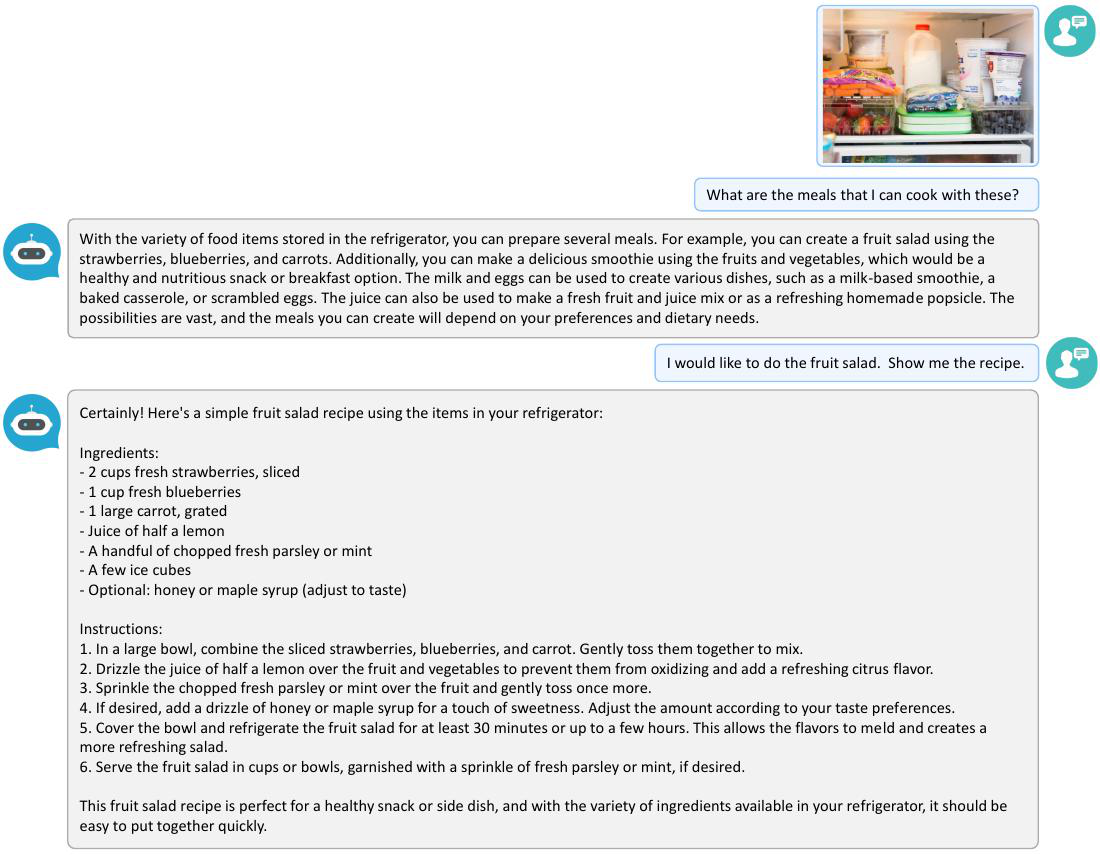

prompt: 'Describe the image in detail. Be specific about graphs, such as bar plots.'

 The image is a screenshot of a conversation between two people, likely discussing a recipe or a cooking process. The conversation is taking place on a messaging platform, possibly WhatsApp. The text is displayed in a blue color, which is consistent with the platform's design.

In the conversation, there are several mentions of food items and ingredients. For example, the word "fruit" is used multiple times, and there are references to "ice cream," "strawberries," and "cucumber." The context of the conversation suggests that the two people are discussing a recipe or a cooking process involving these ingredients.


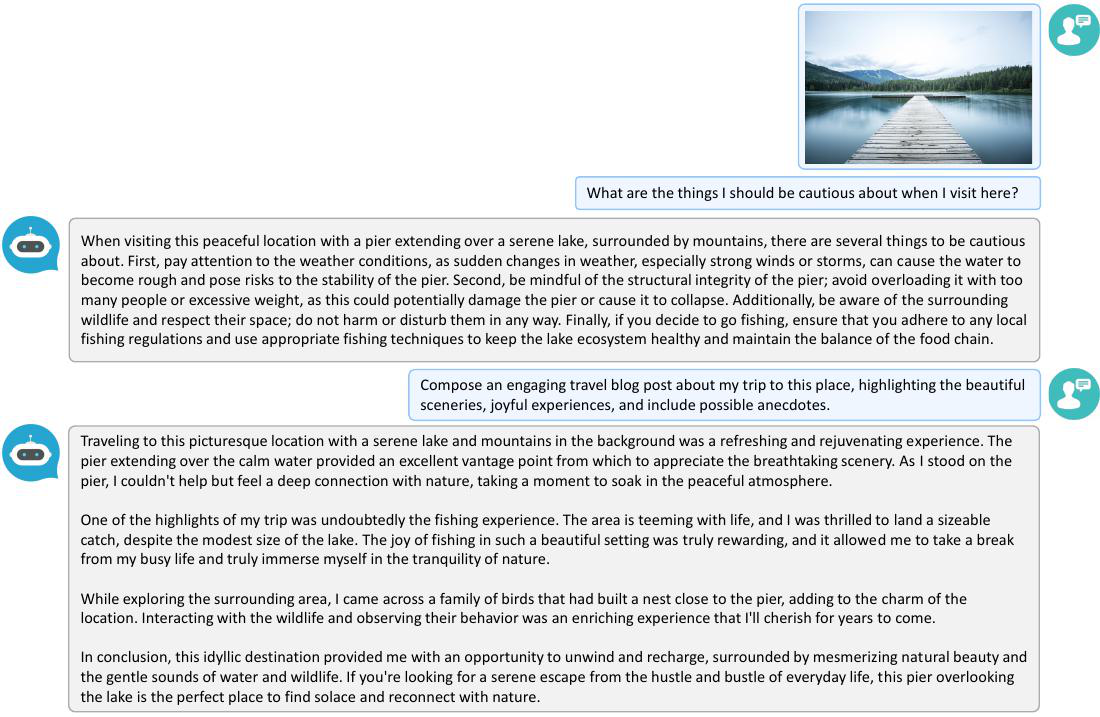

prompt: 'Describe the image in detail. Be specific about graphs, such as bar plots.'

 The image is a screenshot of a conversation between two people, possibly on a messaging app or social media platform. The conversation is taking place in a chat box, with the text displayed in a clear and organized manner. The two people are discussing a topic related to fishing, as evidenced by the presence of fishing-related words and phrases in the conversation.

In the background, there is a picture of a beautiful landscape, possibly a mountain or a lake, which adds to the overall ambiance of the conversation. The image captures the essence of a casual, friendly exchange between the two individuals.


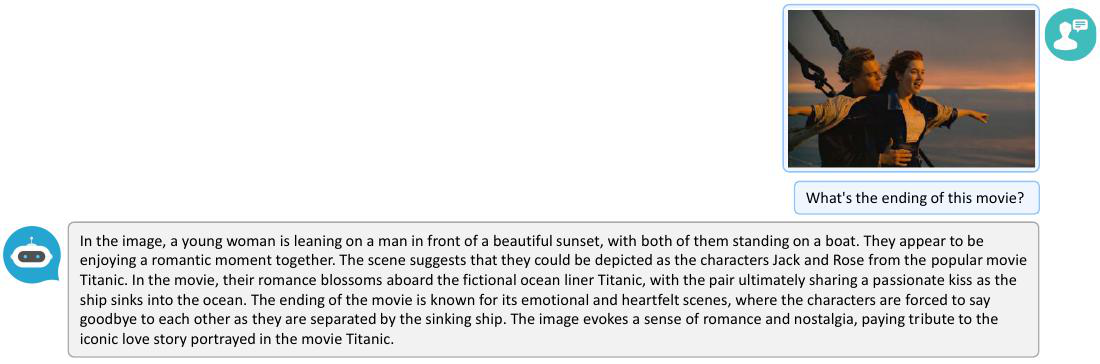

prompt: 'Describe the image in detail. Be specific about graphs, such as bar plots.'

 The image is a screenshot of a text conversation between two people, with one person asking the other, "What is the young girl doing in the picture?" The other person is likely responding to the question, as the image shows a young girl in the picture. The conversation is taking place on a device, possibly a smartphone or a computer. The image also features a picture of a young girl, which is likely the subject of the conversation.


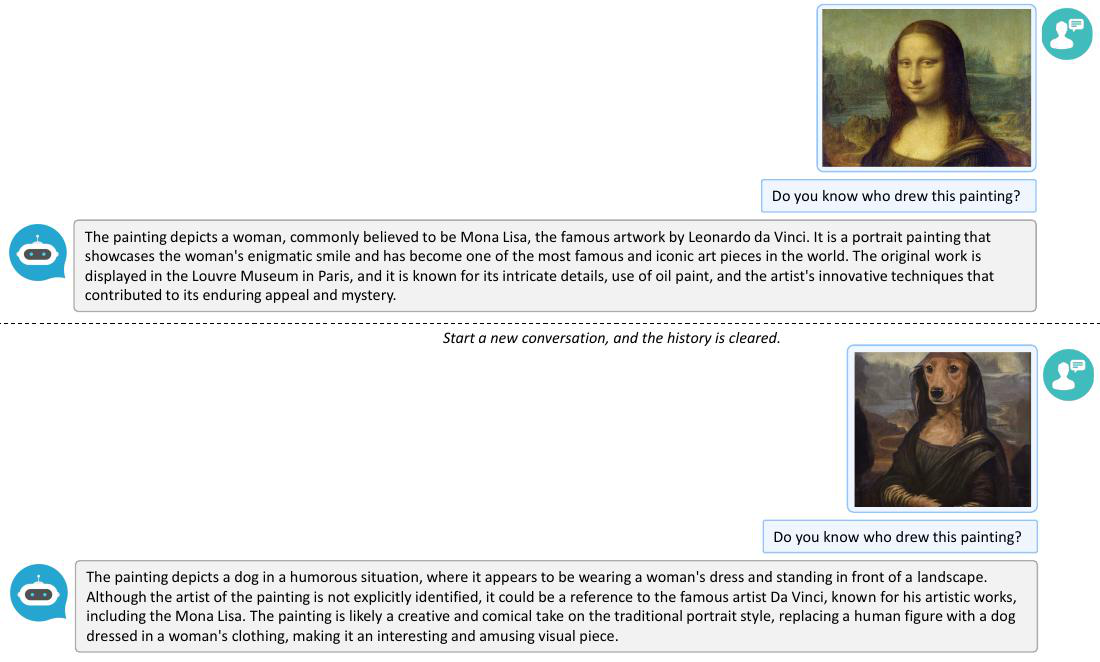

prompt: 'Describe the image in detail. Be specific about graphs, such as bar plots.'

 The image is a series of three text boxes, each containing a different message. The first text box is located on the left side of the image and reads, "Do you know how painting a dog can be funny?". The second text box is in the middle of the image and says, "The painting dog construction when it's not wearing a shirt". The third text box is on the right side of the image and reads, "Do you know how painting a dog can be funny?".

In addition to the text boxes, there is a painting of a woman in the background, which is located towards the top of the image.


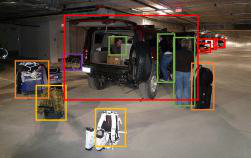

prompt: 'Describe the image in detail. Be specific about graphs, such as bar plots.'

 The image features a garage with a truck parked inside. The truck is surrounded by several suitcases, with some placed near the front and others scattered around the back. There are also a few backpacks and handbags in the scene, with one backpack located near the left side of the truck and two handbags placed closer to the right side.

In addition to the luggage, there are two people in the garage, one standing near the center and the other closer to the right side. A chair is also present in the scene, positioned near the center of the garage.


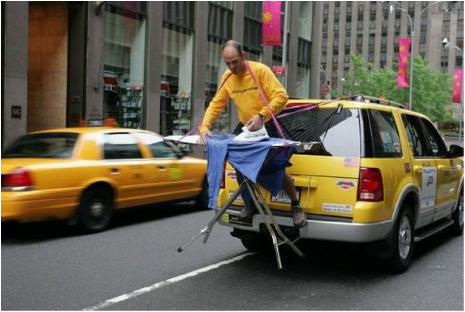

prompt: 'Describe the image in detail. Be specific about graphs, such as bar plots.'

 The image depicts a busy city street with a man standing on the back of a yellow taxi, holding a clothes iron. The taxi is driving down the street, and there are other vehicles around, including a bus and a truck. A traffic light can be seen in the scene, indicating the flow of traffic.

There are several people in the image, with one person standing near the taxi, another person closer to the bus, and a third person further away. The scene captures the hustle and bustle of city life, with people going about their daily activities.


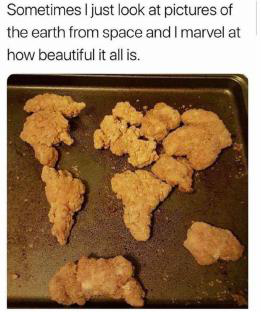

prompt: 'Describe the image in detail. Be specific about graphs, such as bar plots.'

 The image features a tray filled with various pieces of fried chicken, arranged to resemble a map of the world. The chicken pieces are spread across the tray, with some pieces located closer to the edges and others in the center. The arrangement of the chicken pieces creates a visually appealing representation of the world, showcasing the creativity and artistic flair of the person who prepared the dish.


In [60]:
from IPython.display import display

for img_dict in img_summaries:
    display(img_dict['image'])
    print(img_dict['summary'])

# Index data into database

In [61]:
def get_docs(text_list, ids):
    return [
        Document(
            page_content=s, 
            metadata={id_key: ids[i]}
        ) for i, s in enumerate(text_list)
    ]

doc_ids = [str(uuid.uuid4()) for _ in text_summaries]
text_docs = get_docs(
    [t['element'] for t in text_summaries], 
    doc_ids
)
summary_text_docs = get_docs(
    [t['text'] for t in text_summaries], 
    doc_ids
)

table_ids = [str(uuid.uuid4()) for _ in table_summaries]
table_docs = get_docs(
    [t['element'] for t in table_summaries], 
    table_ids
)
summary_table_docs = get_docs(
    [t['text'] for t in table_summaries], 
    table_ids
)

img_ids = [str(uuid.uuid4()) for _ in img_summaries]
img_summary_docs = get_docs(
    [i['summary'] for i in img_summaries], 
    img_ids
)


In [62]:
vectorstore = Chroma(
    collection_name="llava_pdf",
    embedding_function=OpenAIEmbeddings()
)

store = InMemoryStore()

retriever = MultiVectorRetriever(
    vectorstore=vectorstore, 
    docstore=store, 
    id_key=id_key,
)

retriever.vectorstore.add_documents(summary_text_docs)
retriever.docstore.mset(list(zip(doc_ids, text_docs)))

retriever.vectorstore.add_documents(summary_table_docs)
retriever.docstore.mset(list(zip(table_ids, table_docs)))

retriever.vectorstore.add_documents(img_summary_docs)
retriever.docstore.mset(list(zip(img_ids, img_summary_docs)))

In [63]:
retriever.vectorstore.similarity_search("What is specific about LLava?")

[Document(page_content='Figure 5 shows that LLaVA is able to recognize the famous artwork Mona Lisa by Leonardo da Vinci. Additionally, it can explain humorous artwork on the web that imitates the Mona Lisa.', metadata={'doc_id': '2634c384-596a-42d0-8501-f8b8730d80b0'}),
 Document(page_content="The table or text chunk describes the capabilities of LLaVA, which is able to recognize visual content based on the user's intent without needing direct prompts. It can also provide detailed responses when given follow-up requests, and these responses are closely related to the visual content provided.", metadata={'doc_id': 'ad200871-86d6-4d62-b850-93caf9d29b3f'}),
 Document(page_content='The table or text chunk is discussing the performance and design choices of a model called LLaVA in the context of meme understanding. The model is compared to GPT-4 and different approaches are evaluated. The results show that using LLaVA alone or combining it with GPT-4 both yield high accuracy in understandi

In [64]:
retriever.get_relevant_documents("What is specific about LLava?")

[Document(page_content='Figure 5: LLaVA recognizes the famous art work, Mona Lisa, by Leonardo da Vinci. When we start a new conversation, it also explains the humourous artwork created on the web, mimicking the Mona Lisa.\n\n19', metadata={'doc_id': '2634c384-596a-42d0-8501-f8b8730d80b0'}),
 Document(page_content='Figure 3: LLaVA is capable of recognizing the visual content following the user’s intent, without directly prompting for visual recognition. It also provides a detailed response when prompted with a follow-up request, and the generated response is closely related to the provided visual content.\n\n18', metadata={'doc_id': 'ad200871-86d6-4d62-b850-93caf9d29b3f'}),
 Document(page_content='User LLaVA\n\nCan you explain this meme in detail? The meme in the image is a creative and humorous take on food, with a focus on chicken nuggets, as the center of the universe. The meme begins with the phrase "Sometimes I just look at pictures of the Earth from space and I marvel at how beau

# Multimodal RAG

In [68]:
llm = ChatOpenAI(temperature=0, model_name='gpt-4')

chain = RetrievalQA.from_chain_type(
    llm=llm, 
    retriever=retriever,
    verbose=True
)

In [66]:
chain.run('What makes LLava different GPT-4')



> Entering new RetrievalQA chain...

> Finished chain.


"LLaVA is a multimodal language model that combines both text and visual inputs to generate responses. It has been trained on a dataset that includes both textual instructions and corresponding images, allowing it to understand and respond to questions that involve visual information. This is in contrast to GPT-4, which is a text-only language model that does not have the ability to process visual inputs. LLaVA's integration of visual understanding enables it to provide more accurate and contextually relevant responses to questions that involve images or require visual reasoning."

In [69]:
chain.run('What is the architecture of the LLava model?')



> Entering new RetrievalQA chain...

> Finished chain.


'The text does not provide specific information on the architecture of the LLaVA model.'